# Description
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

A tumor can be cancerous or benign. A cancerous tumor is malignant, meaning it can grow and spread to other parts of the body. A benign tumor means the tumor can grow but will not spread.

Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

   - 1= Malignant (Cancerous) - Present
   - 0= Benign (Not Cancerous) - Absent

Since labels are discrete, the predictions falls into categorical type (i.e. Malignant or benign).

# Data Set Information
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
- FNA
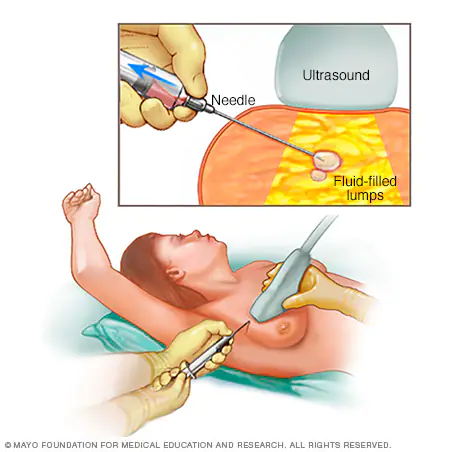

## Attribute Information:

1. ID number

2. Diagnosis (M = malignant, B = benign)

3. 32: Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

- **The mean, standard error, and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.**

**Webiste link for downloading dataset:**
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

# Import libraries, dataset, and set options

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats

# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

# Constant feature checking
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

In [26]:
df = pd.read_csv("data.csv")

In [27]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  ...  \
0         0.2419                 0.07871     1.0950      0.9053  ...   
1         0.1812                 0.05667     0.5435      0.7339  ...   
2         0.2069                 0.05999     0.7456      0.7869  ...   
3         0.2597                 0.09744     0.4956      1.1560  ...   
4         0.1809                 0.05883     0.7572      0.7813  ...   

   concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
0       0.05373            0.01587      0.03003              0.006193   
1       0.01860            0.01340      0.01389              0.003532   
2       0.03832            0.02058      0.02250              0.004571   
3       0.05661            0.01867      0.05963              0.009208   
4       0.05688            0.01885      0.01756              0.005115   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 32 columns]

In [28]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  ...  \
564         0.1726                 0.05623     1.1760       1.256  ...   
565         0.1752                 0.05533     0.7655       2.463  ...   
566         0.1590                 0.05648     0.4564       1.075  ...   
567         0.2397                 0.07016     0.7260       1.595  ...   
568         0.1587                 0.05884     0.3857       1.428  ...   

     concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
564       0.05198            0.02454      0.01114              0.004239   
565       0.03950            0.01678      0.01898              0.002498   
566       0.04730            0.01557      0.01318              0.003892   
567       0.07117            0.01664      0.02324              0.006185   
568       0.00000            0.00000      0.02676              0.002783   

     radius_worst  texture_worst  perimeter_worst  area_worst  \
564        25.450          26.40           166.10      2027.0   
565        23.690          38.25           155.00      1731.0   
566        18.980          34.12           126.70      1124.0   
567        25.740          39.42           184.60      1821.0   
568         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

**Observations:**
Id column is redundant and not useful, we will drop it in feature selection process

# Exploratory Data Analysis

In [29]:
df.shape

(569, 32)

In the result displayed, you can see the data has 569 records(rows), each with 32 columns.

In [30]:
# Review data types with "info()".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The “info()” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

In [31]:
#check for missing variables
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Observations:**
No null values are their in data.

In [32]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Observations:**
- From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.
- We will convert string to numeric using Label Encoder later in feature Engineering part

***Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values.***

In [33]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se  ...  concavity_se  concave points_se  symmetry_se  \
count    569.000000  ...    569.000000         569.000000   569.000000   
mean       2.866059  ...      0.031894           0.011796     0.020542   
std        2.021855  ...      0.030186           0.006170     0.008266   
min        0.757000  ...      0.000000           0.000000     0.007882   
25%        1.606000  ...      0.015090           0.007638     0.015160   
50%        2.287000  ...      0.025890           0.010930     0.018730   
75%        3.357000  ...      0.042050           0.014710     0.023480   
max       21.980000  ...      0.396000           0.052790     0.078950   

       fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
count            569.000000    569.000000     569.000000       569.000000   
mean               0.003795     16.269190      25.677223       107.261213   
std                0.002646      4.833242       6.146258        33.602542   
min                0.000895      7.930000      12.020000        50.410000   
25%                0.002248     13.010000      21.080000        84.110000   
50%                0.003187     14.970000      25.410000        97.660000   
75%                0.004558     18.790000      29.720000       125.400000   
max                0.029840     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146

In [34]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [35]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Observations:**
357 observations indicating the absence of cancer cells and 212 show absence of cancer cell

# Data Visualization

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

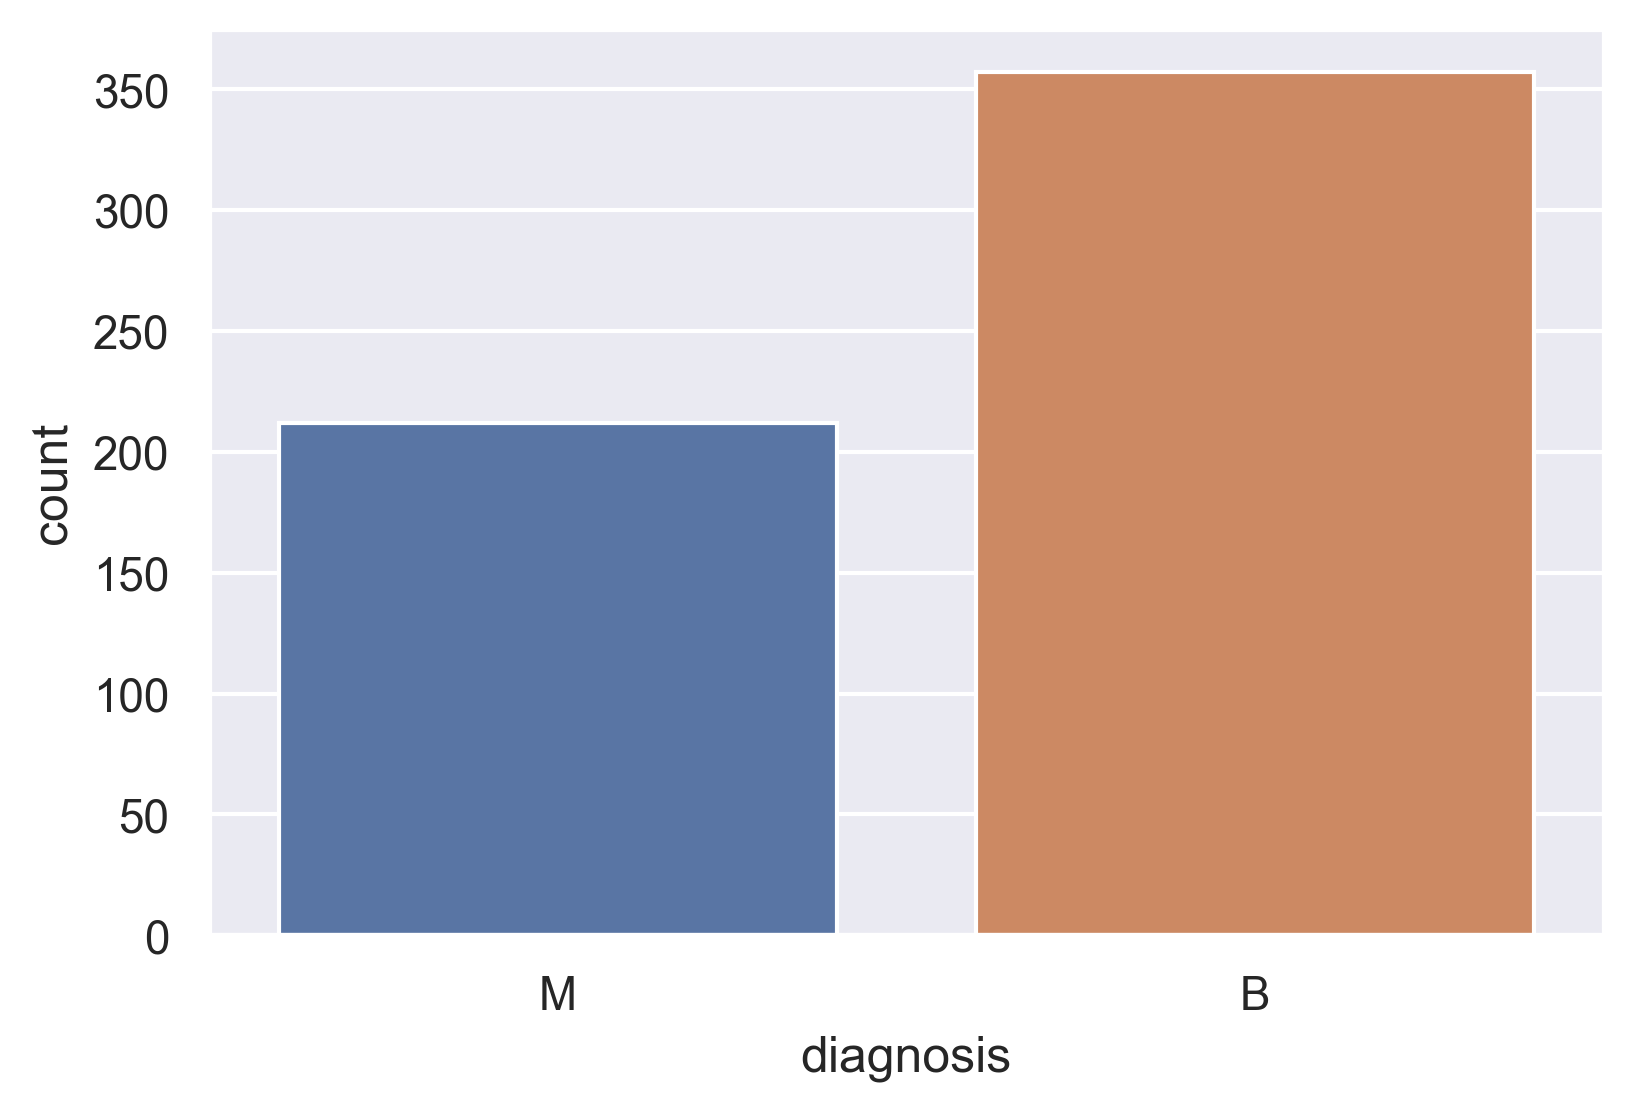

In [36]:
sns.countplot(x = "diagnosis", data = df)

In [37]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [38]:
df_mean=df.iloc[:,2:12]

In [39]:
df_se = df.iloc[:,12:22]

In [40]:
df_worst = df.iloc[:,22:]

## Histogram

### Histogram the "_mean" suffix designition

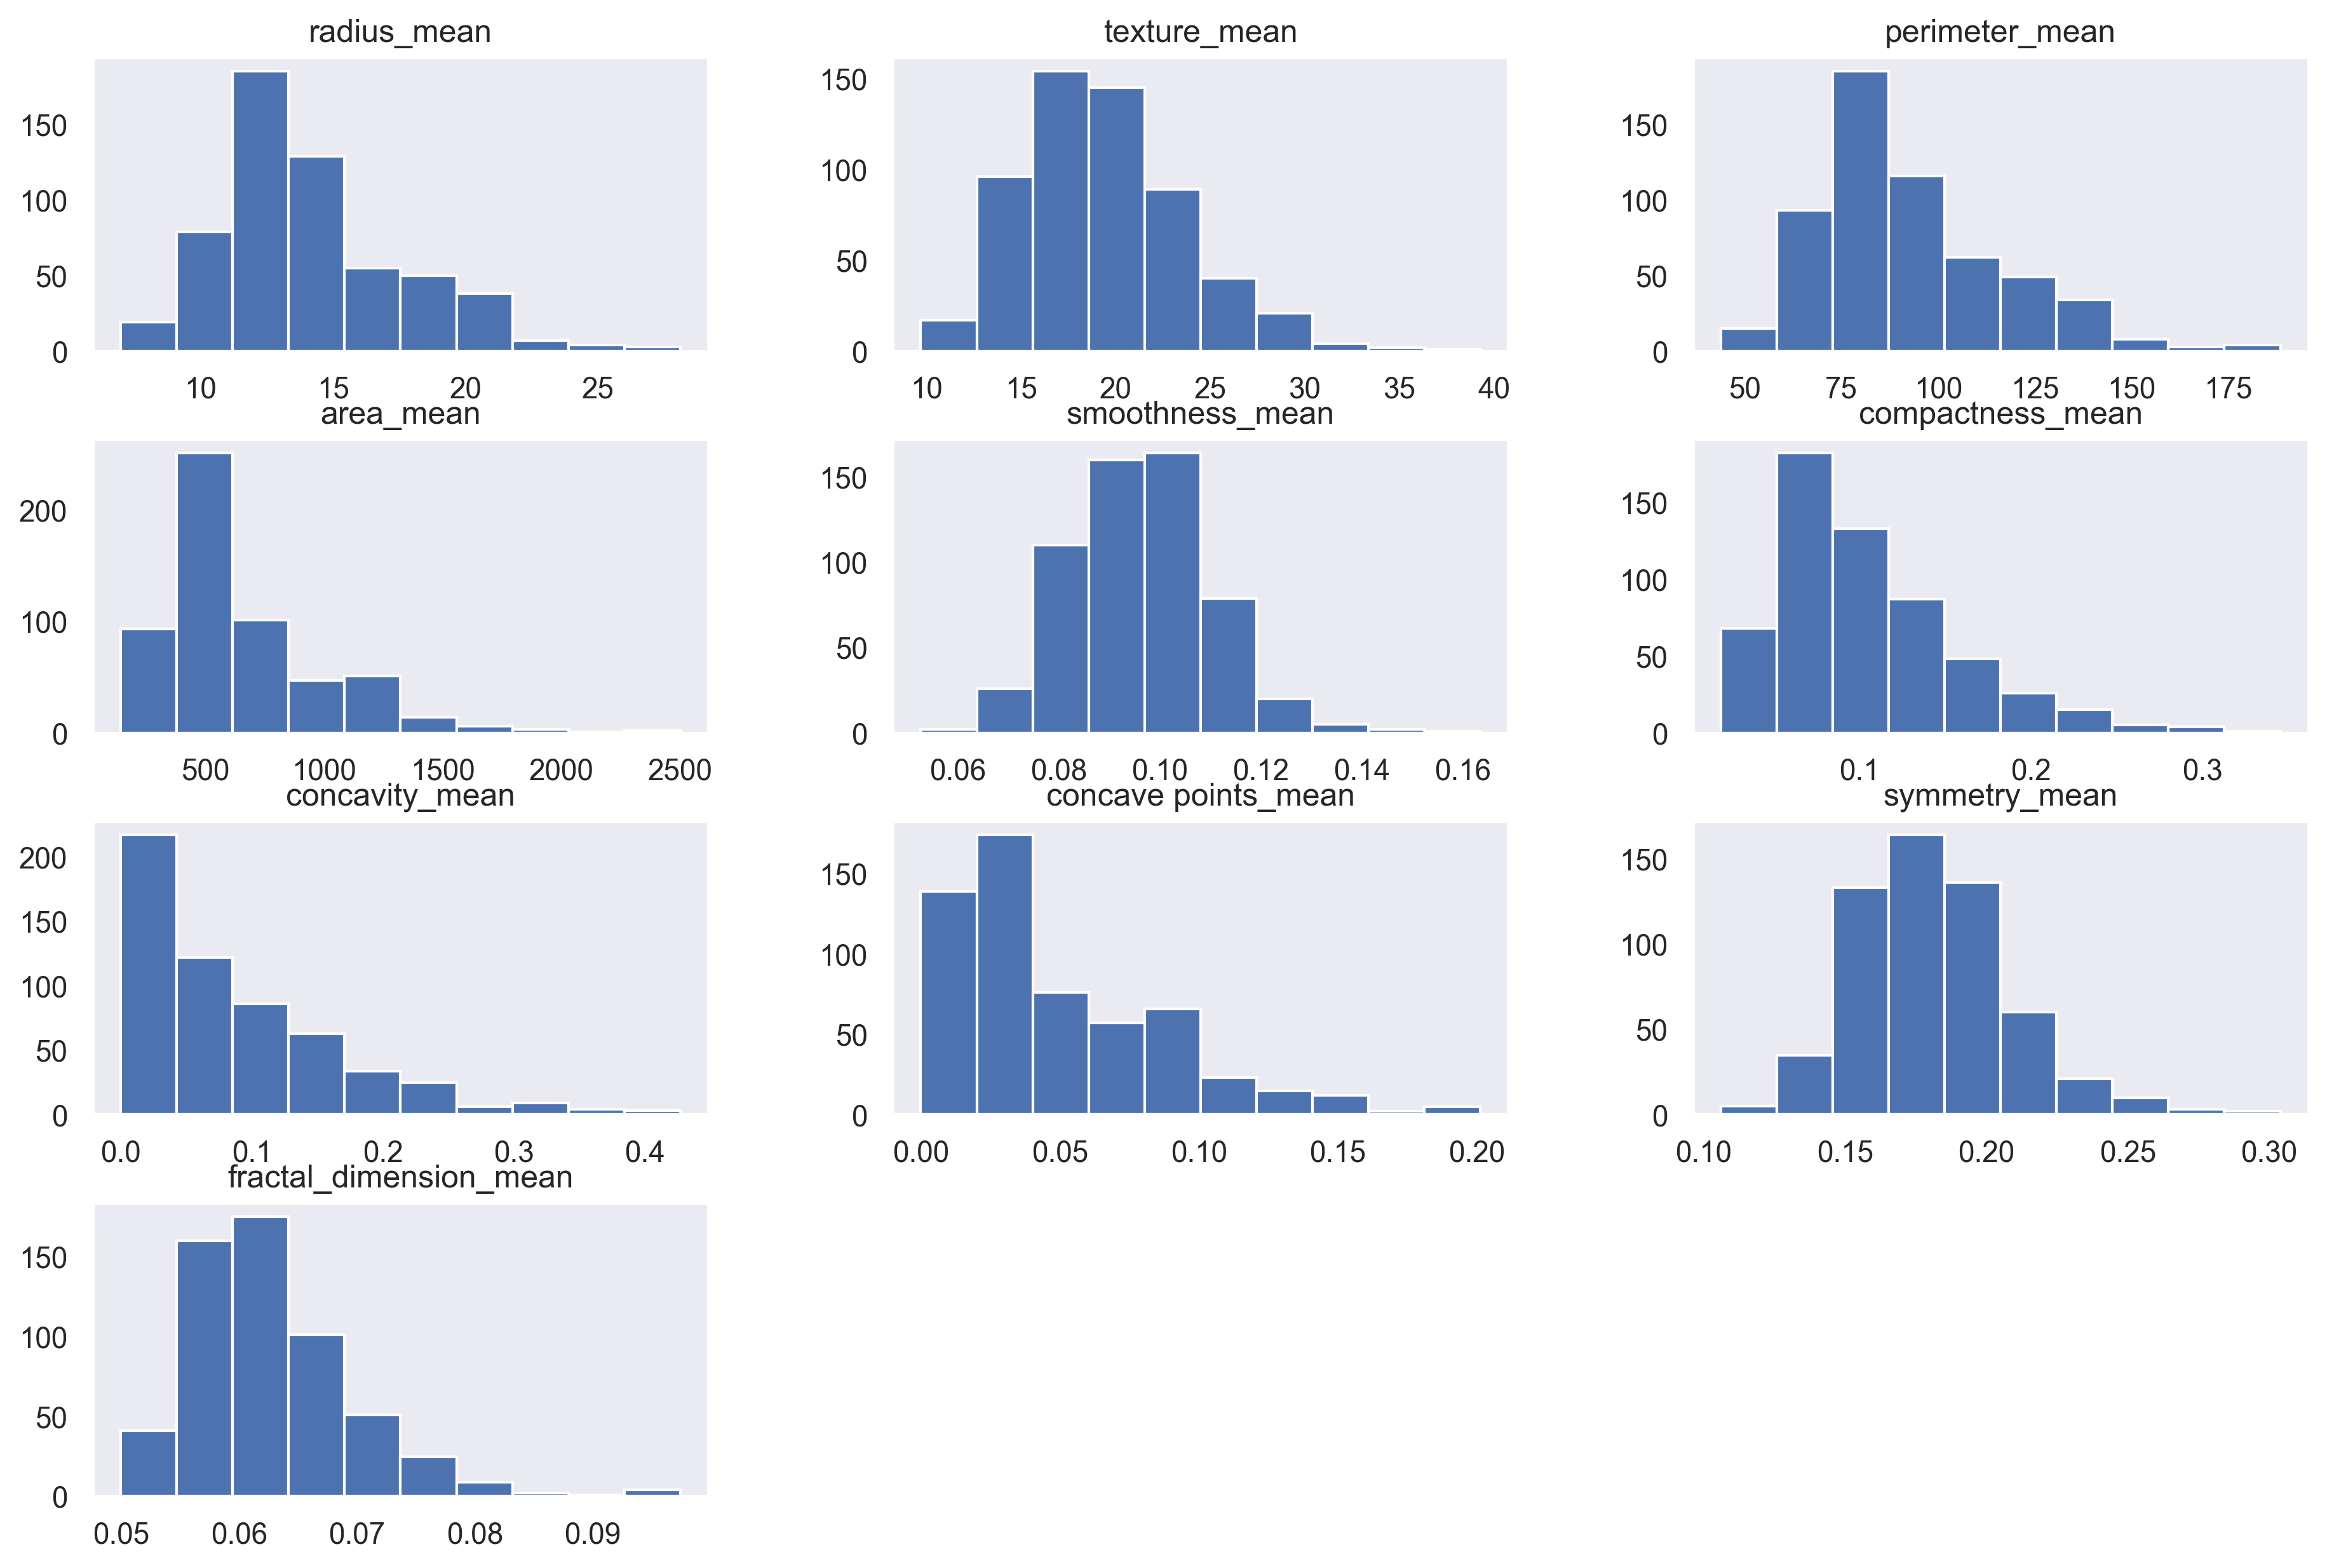

In [41]:
hist_mean = df_mean.hist(bins=10, figsize=(15, 10),grid=False)

### Histogram the "_se" suffix designition

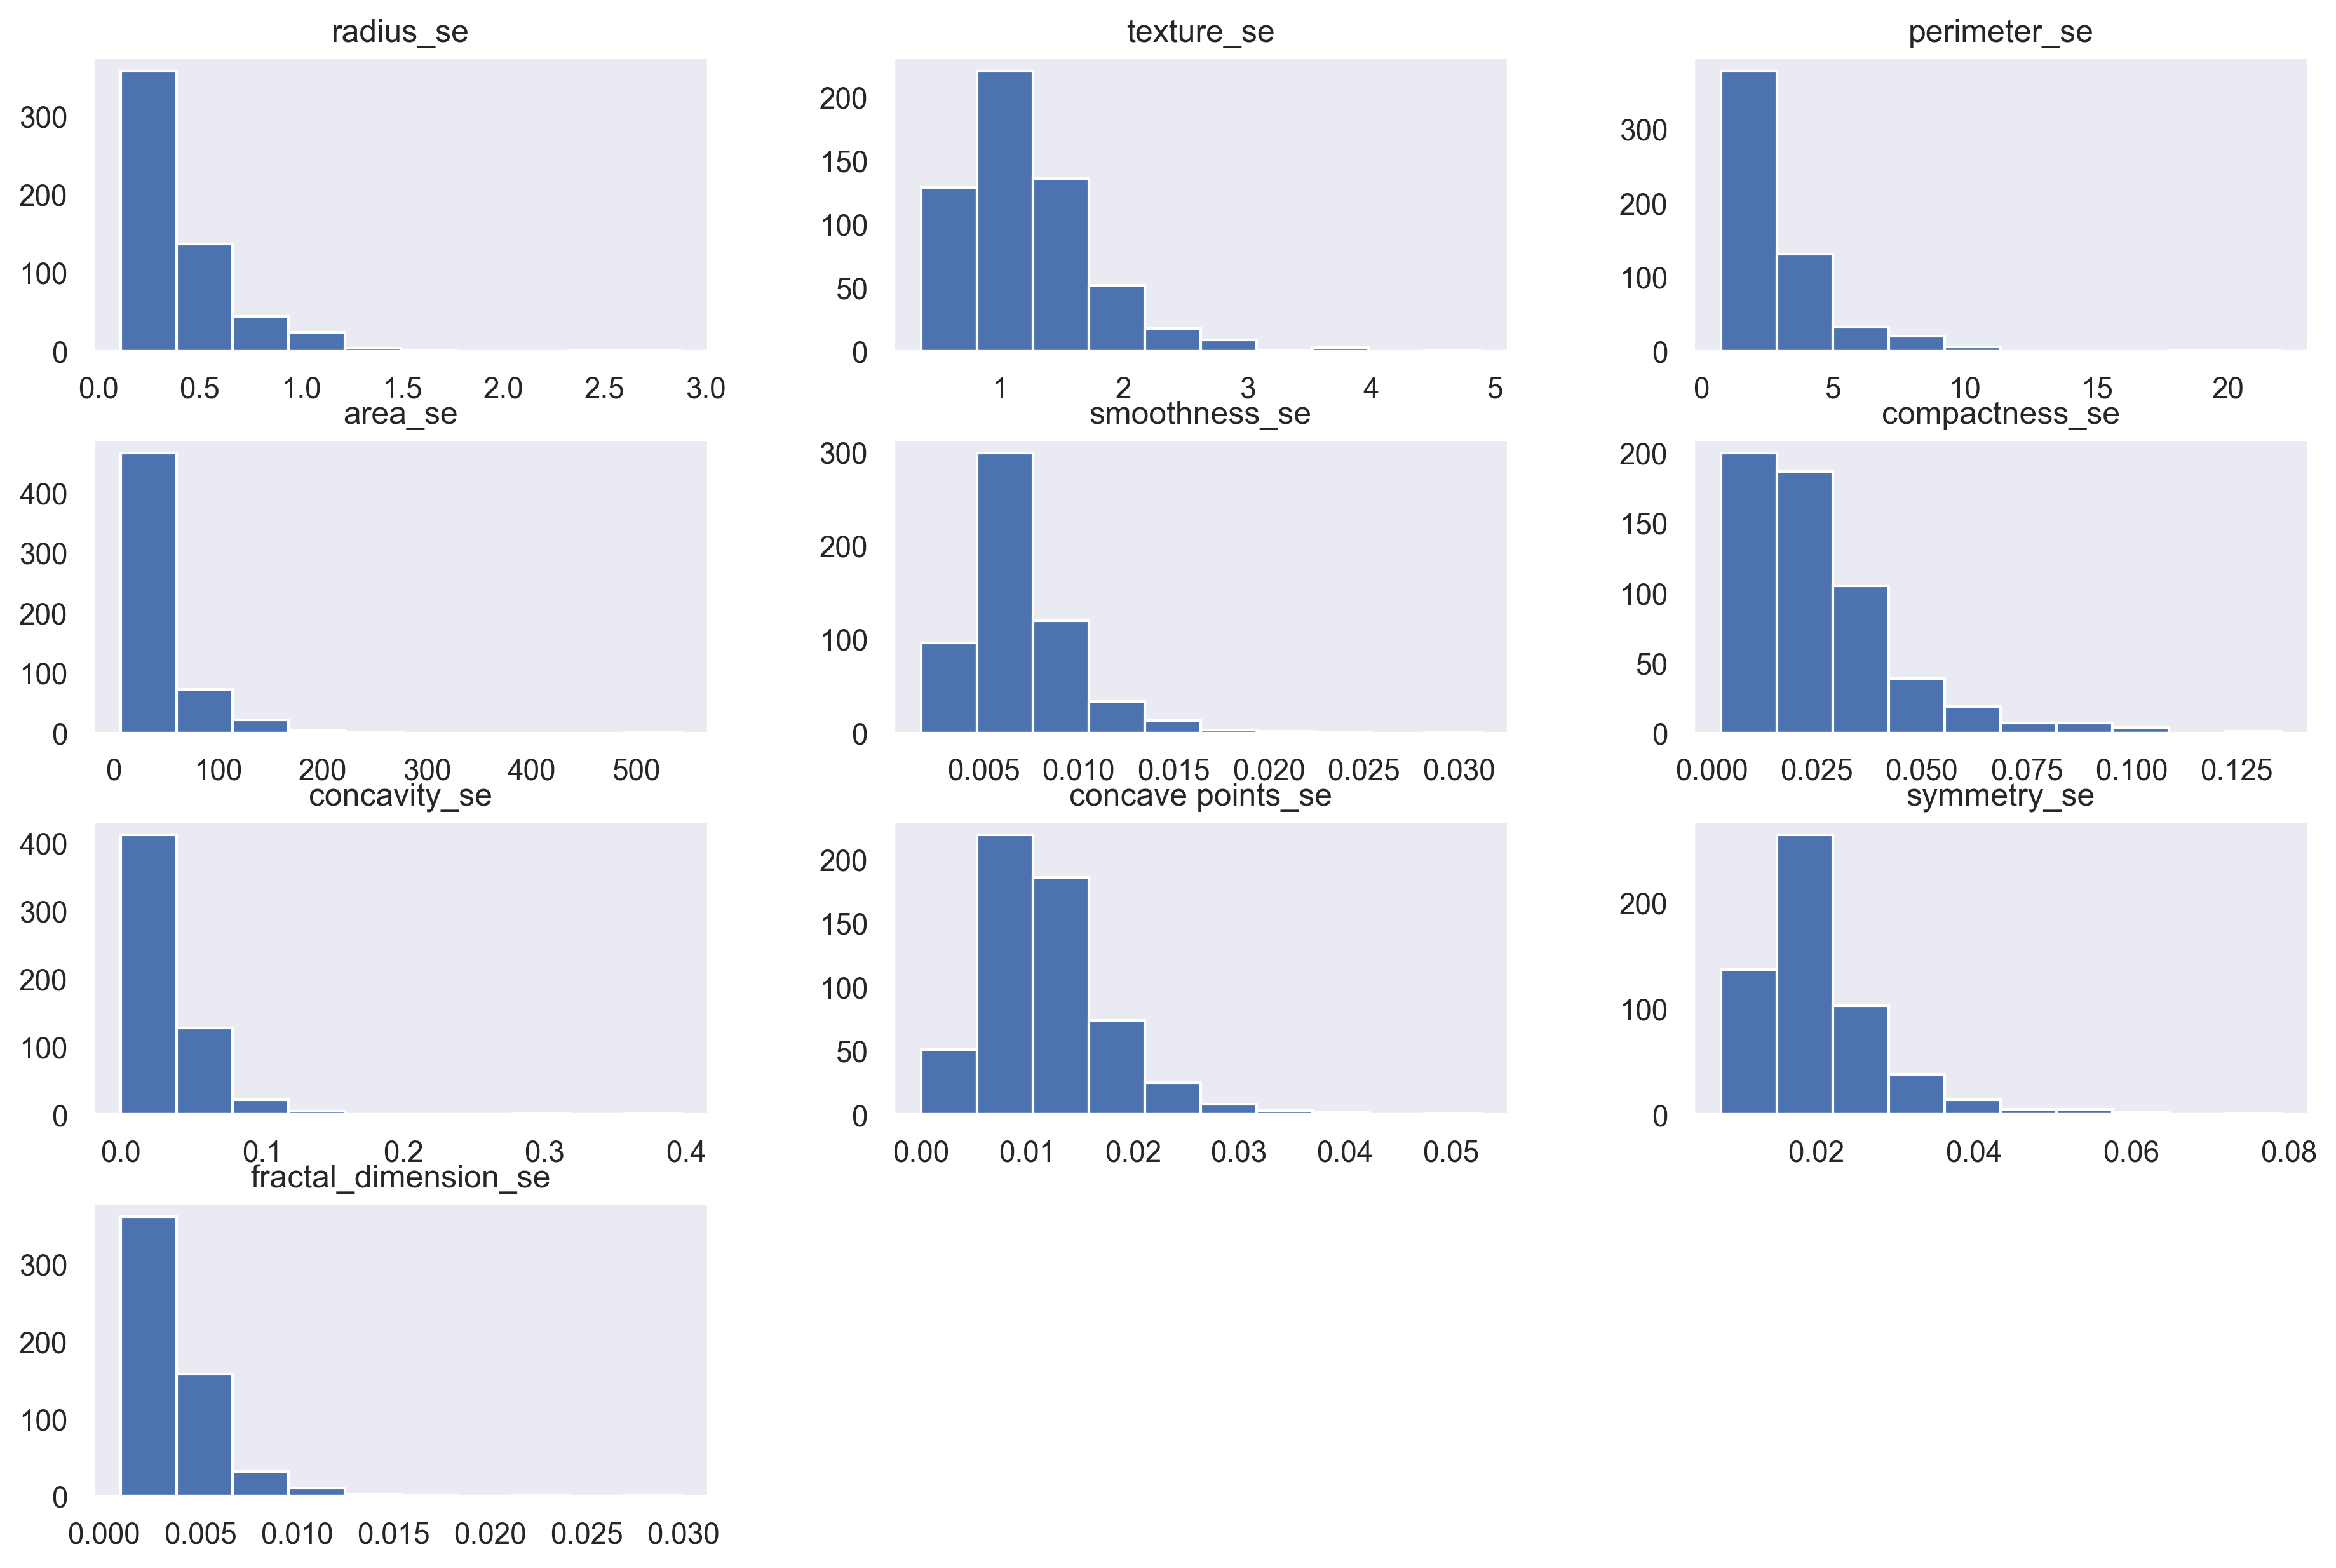

In [42]:
hist_se = df_se.hist(bins=10, figsize=(15, 10),grid=False)

### Histogram the "_worst" suffix designition

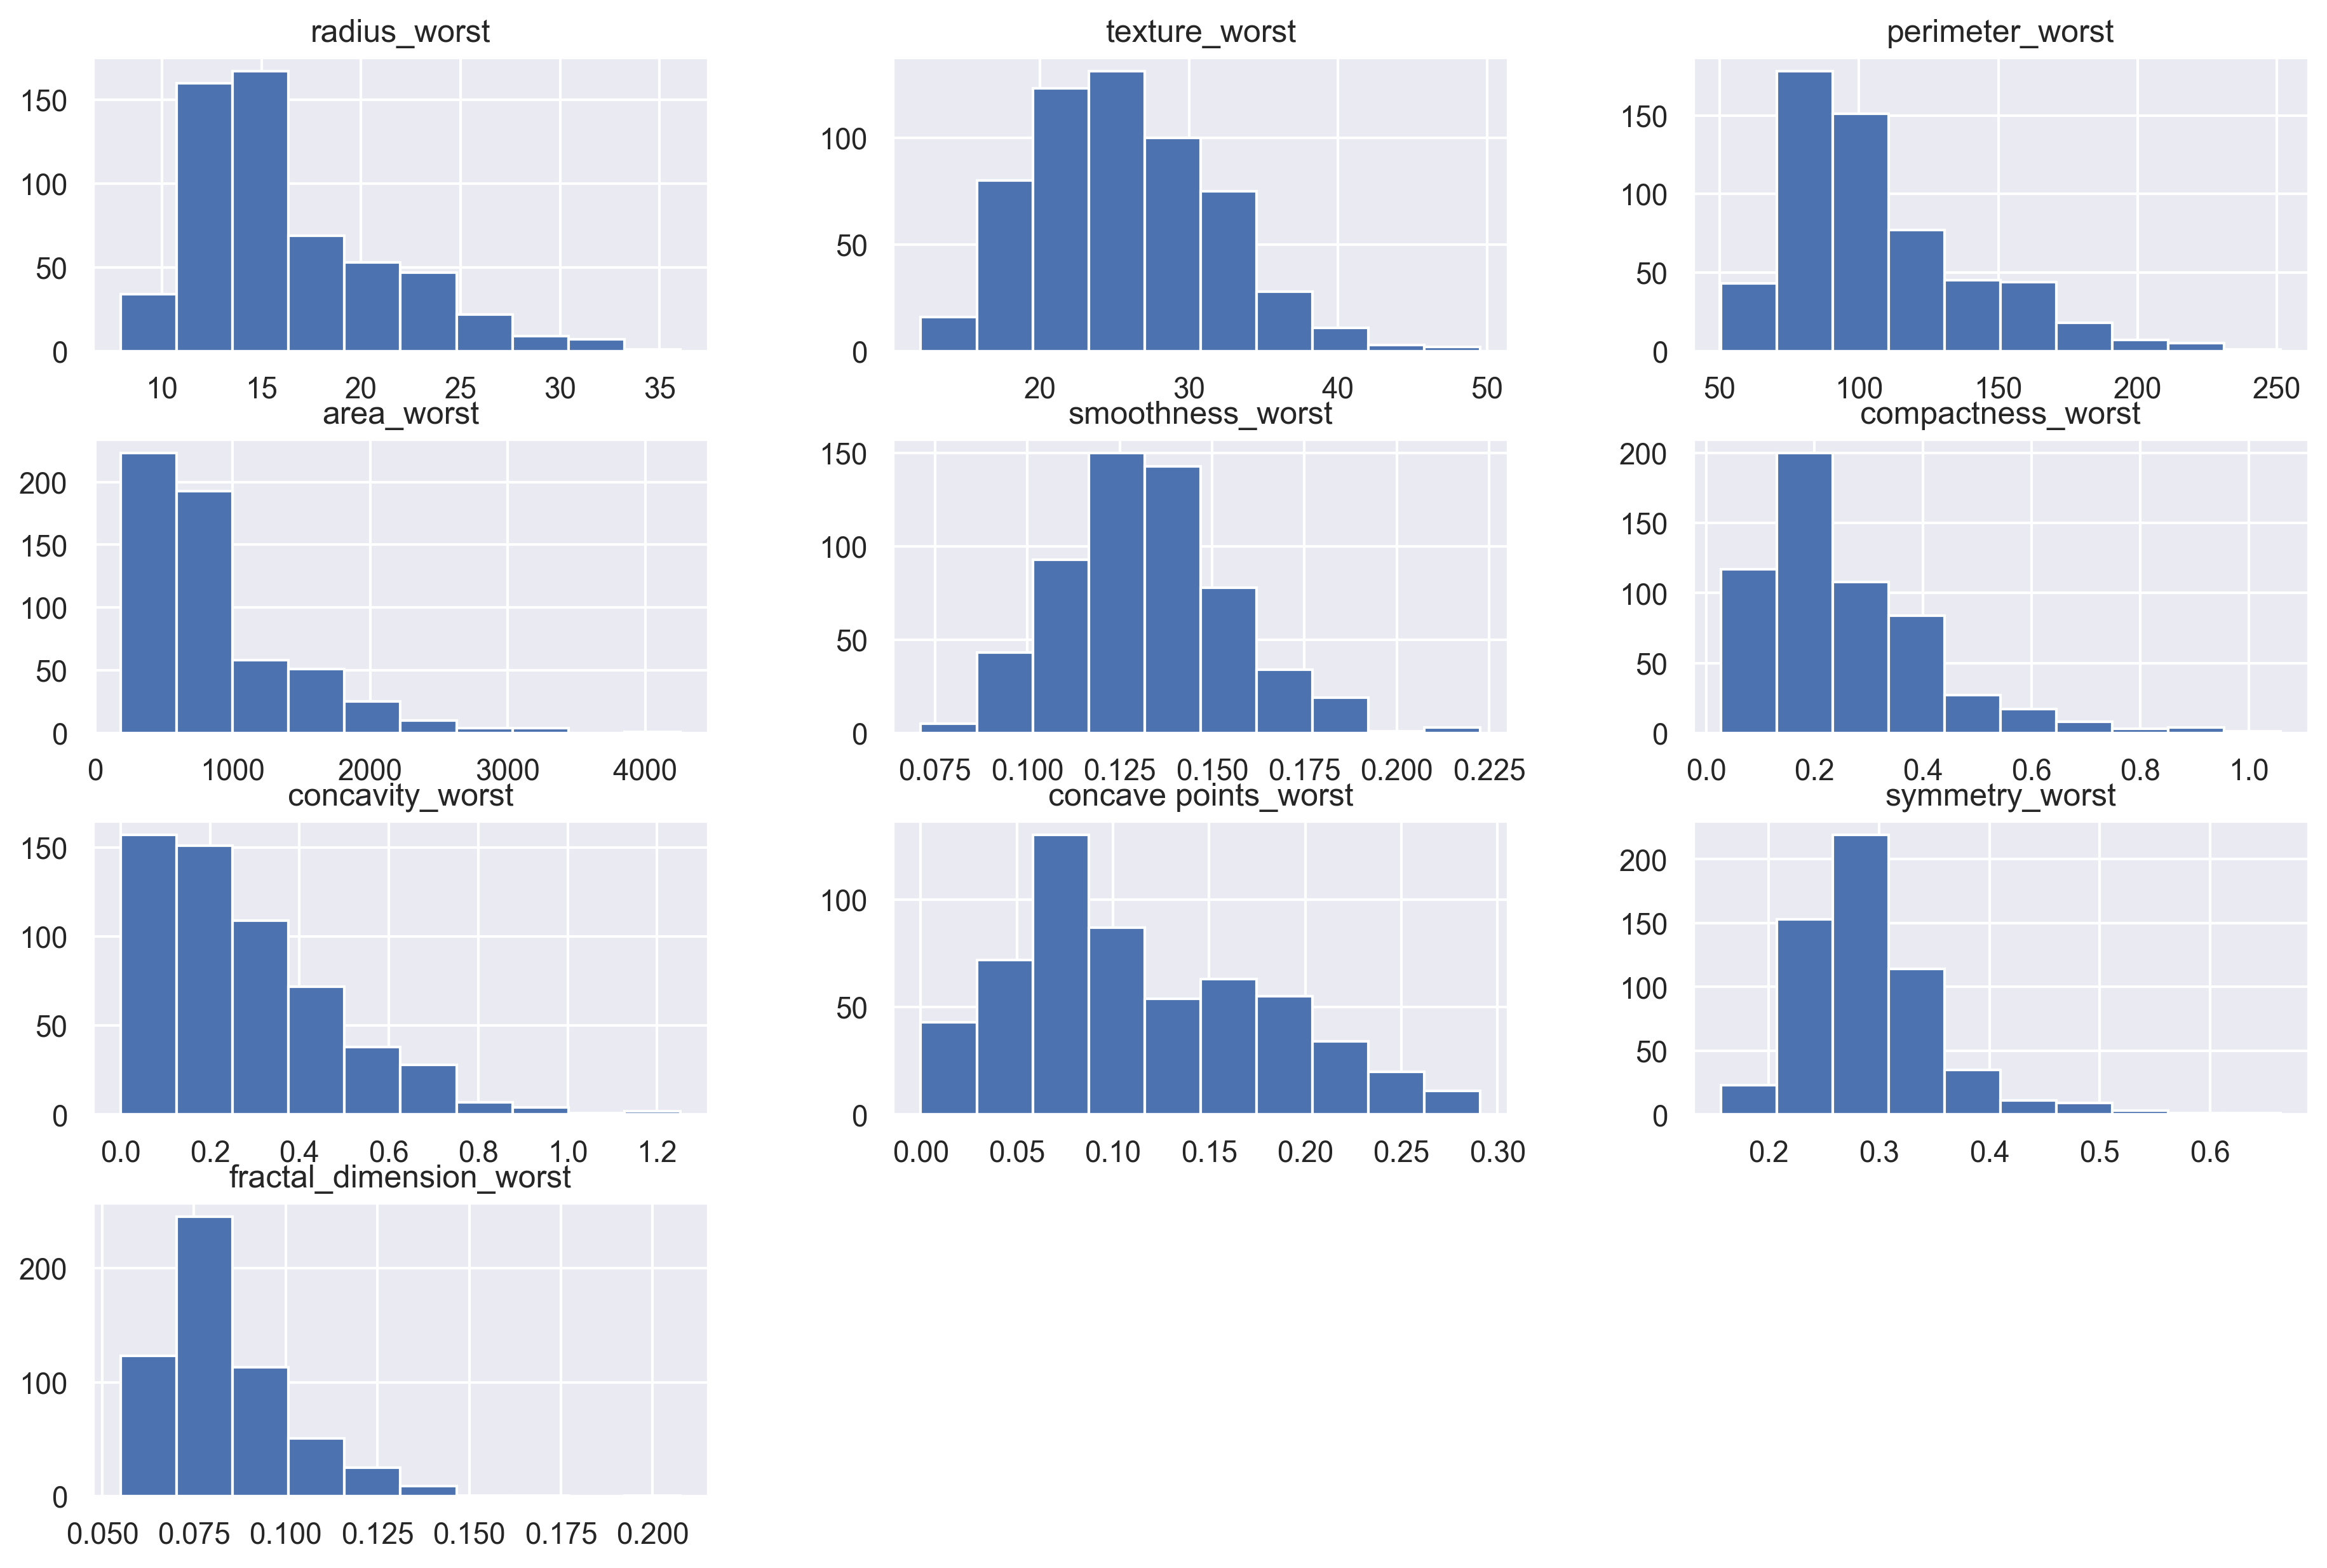

In [43]:
hist_worst = df_worst.hist(bins=10, figsize=(15, 10),grid=True)

**Observations:**
- We can see that perhaps the attributes concavity, and concavity_point may have an exponential distribution. 
- We can also see that perhaps the texture, smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. 
- This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.
- In Machine Learning, data satisfying Normal Distribution is beneficial for model building. It makes math easier. Models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal.

## Density Plot

### Density plots "_mean" suffix designition

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

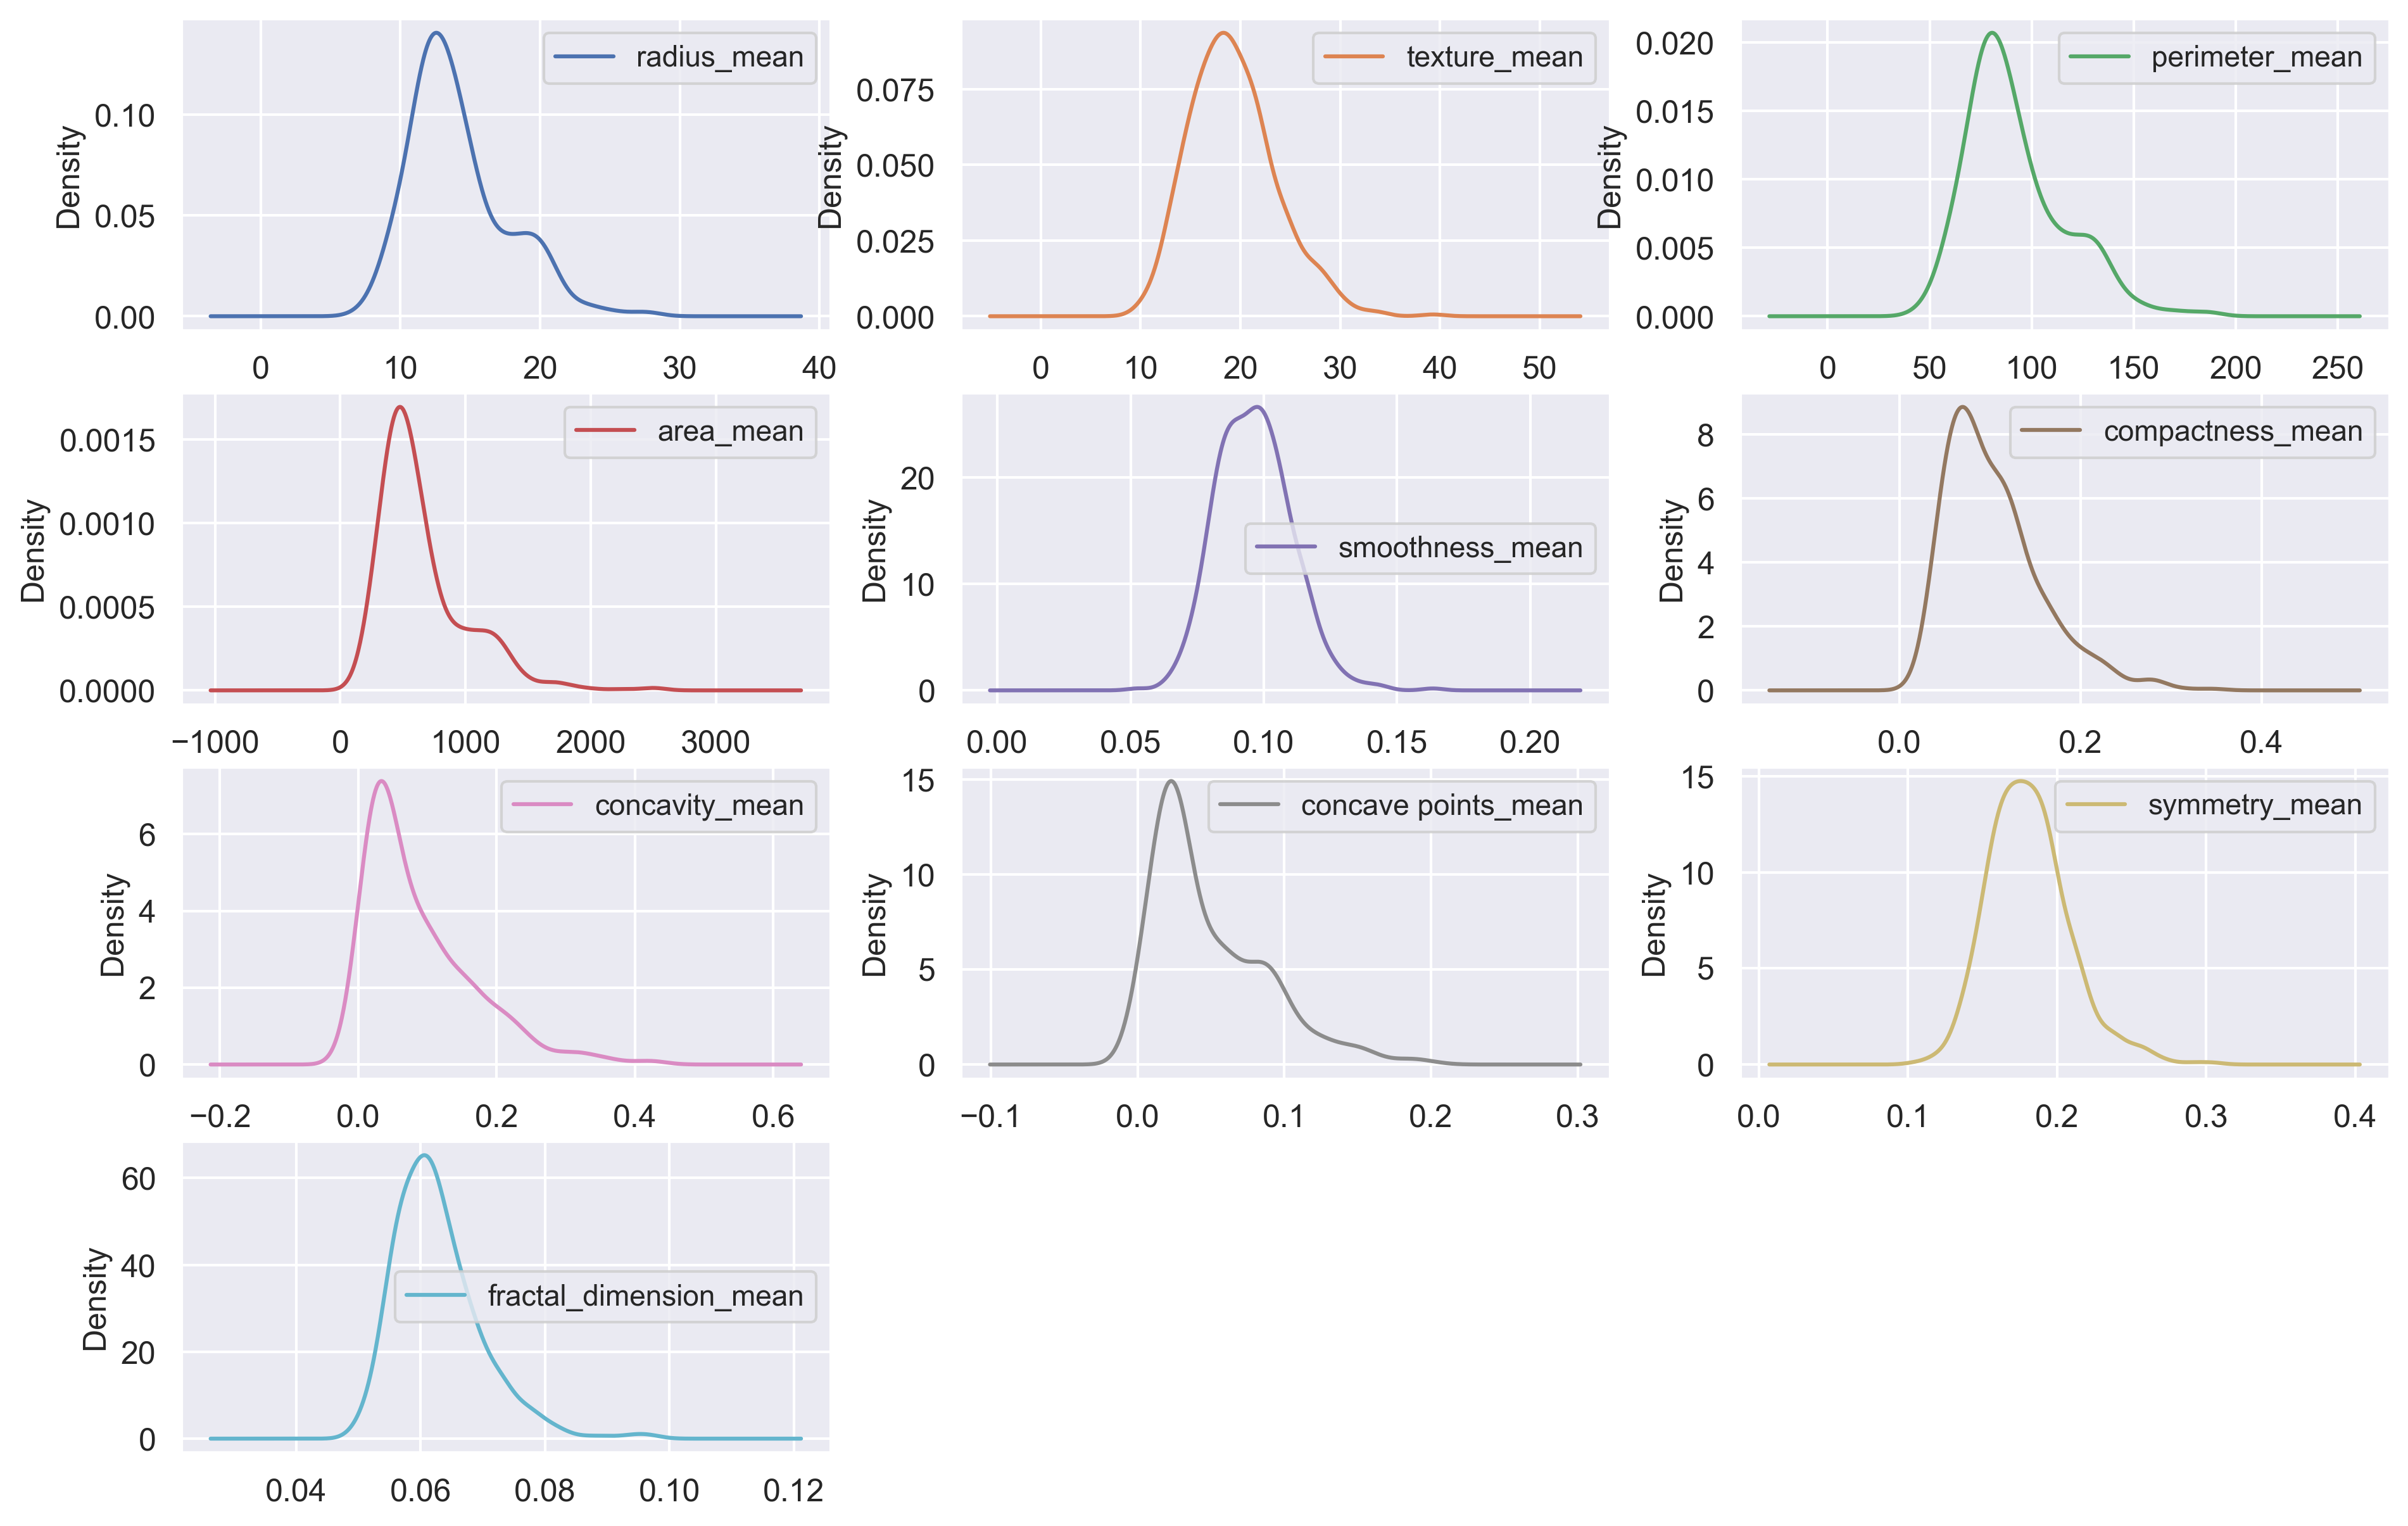

In [44]:
df_mean.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10))

### Density plots "_se" suffix designition

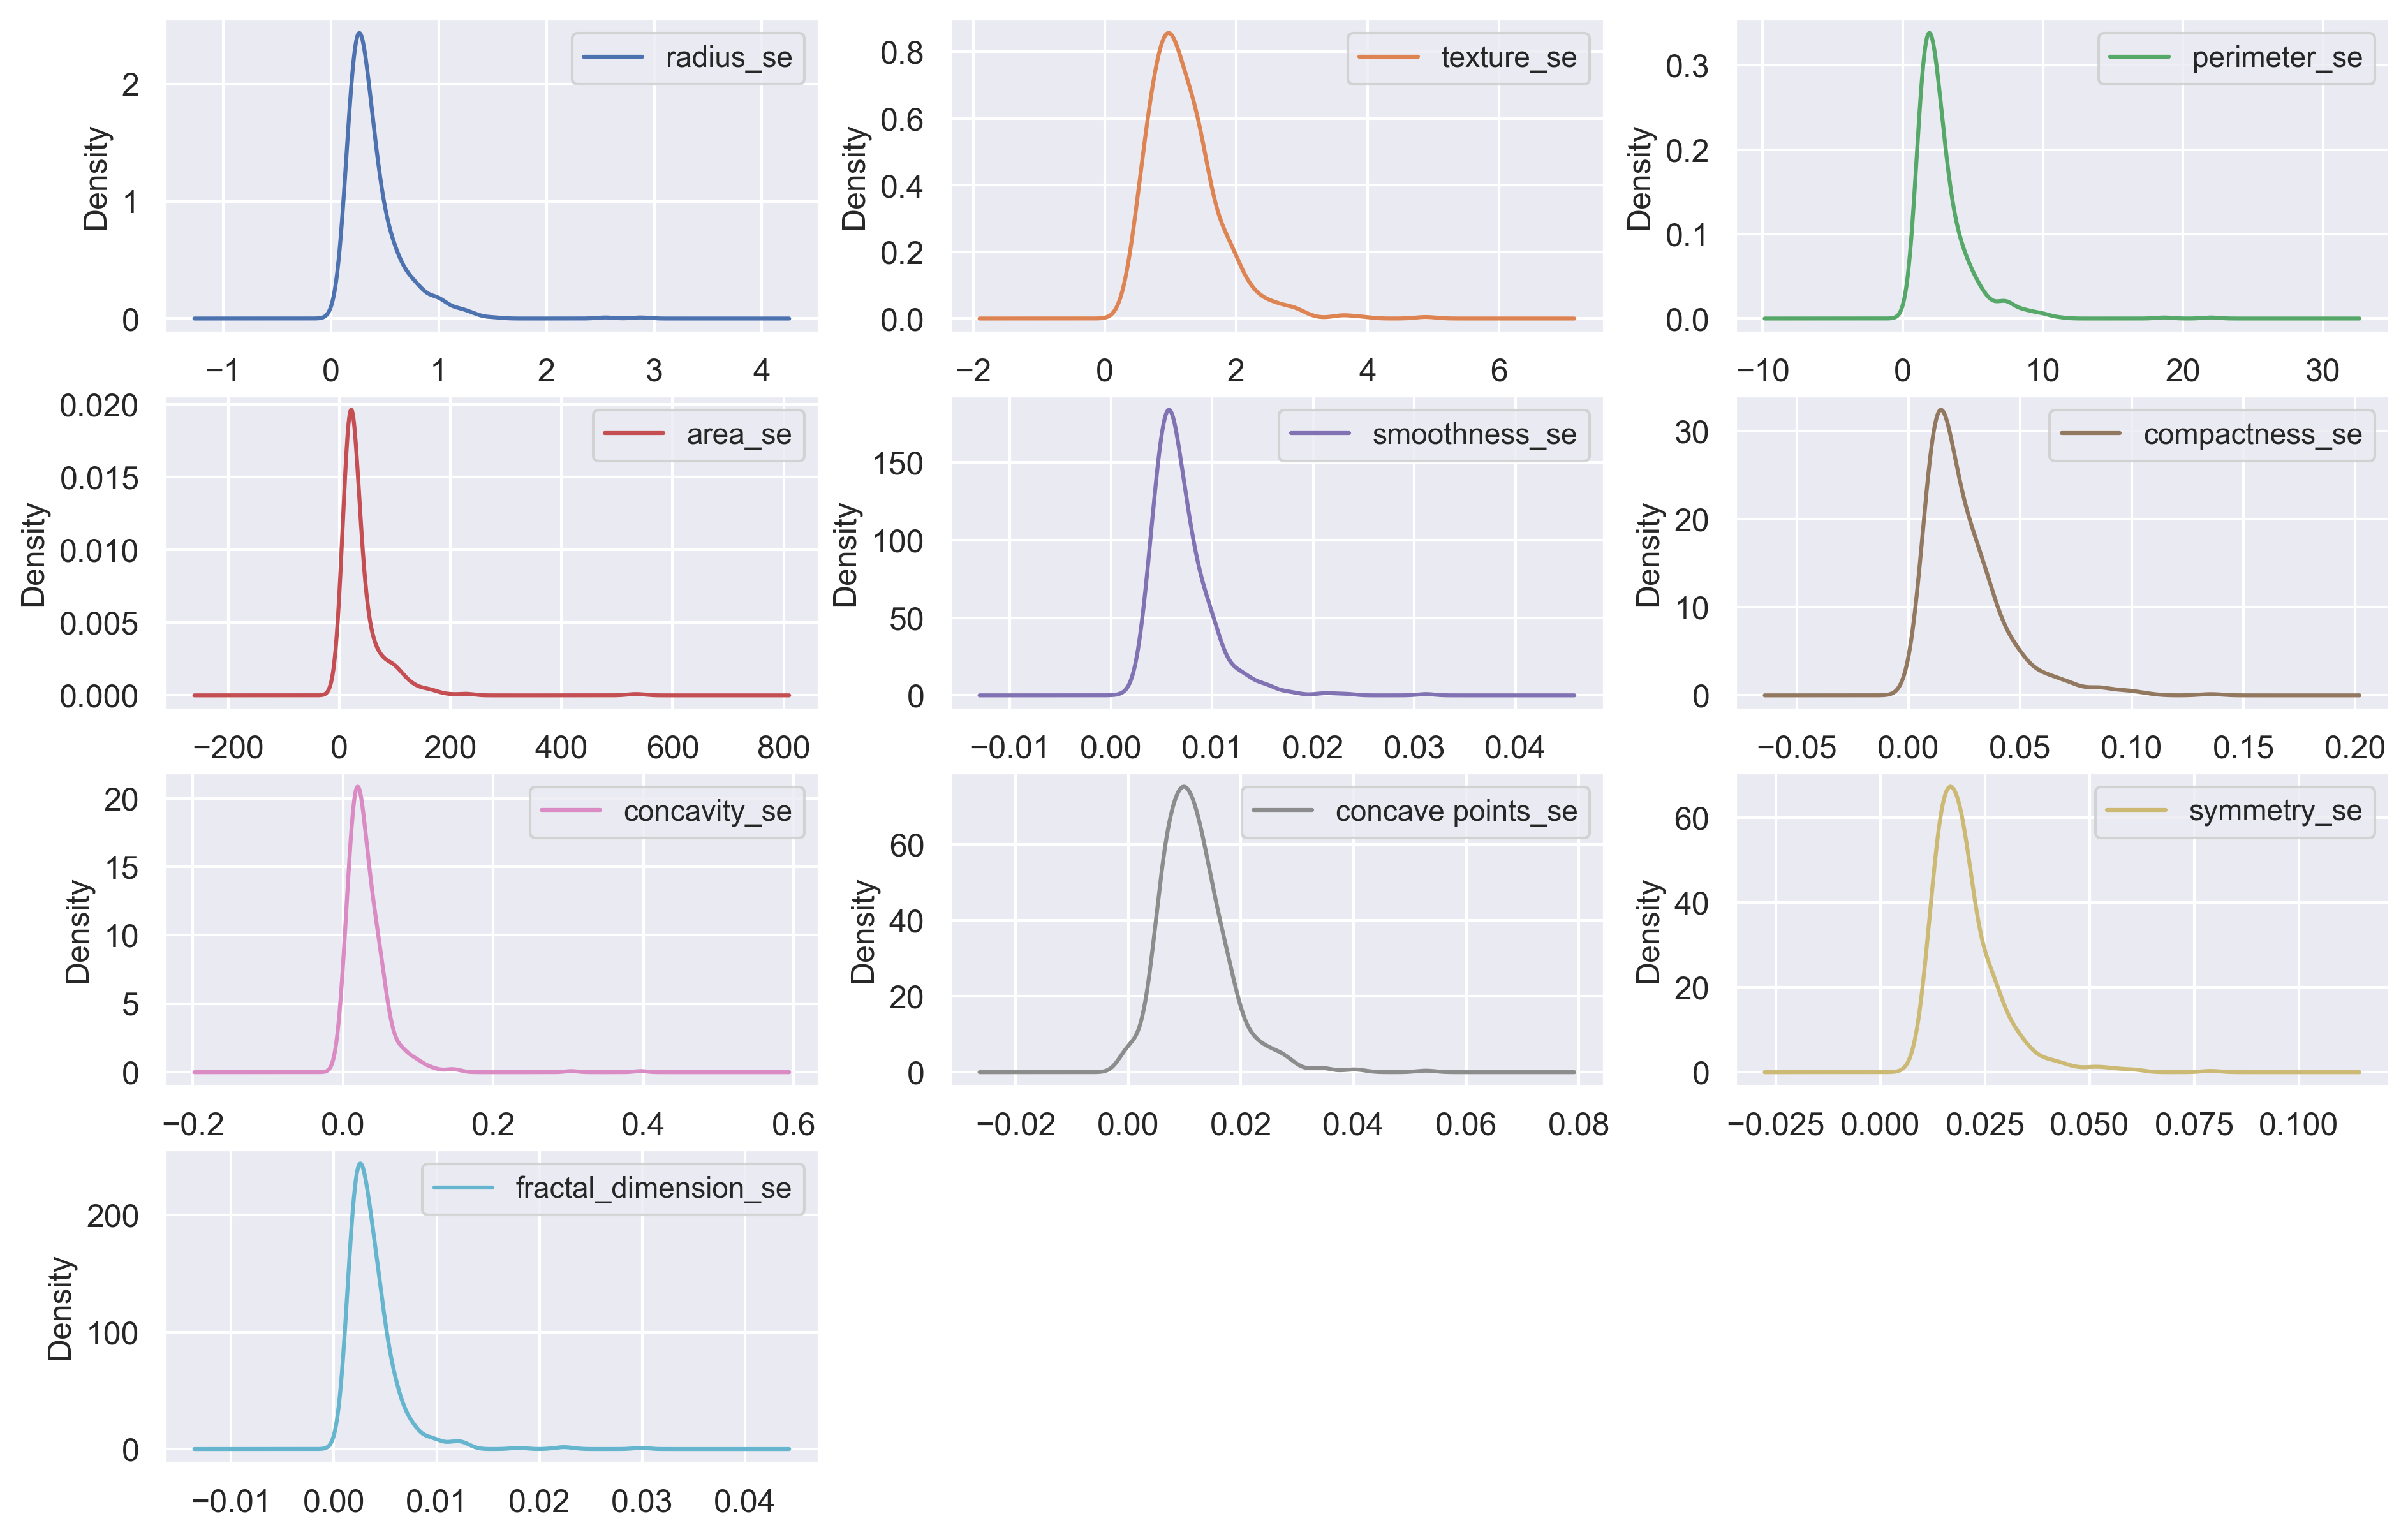

In [45]:
plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10))

### Density plot "_worst" suffix designition

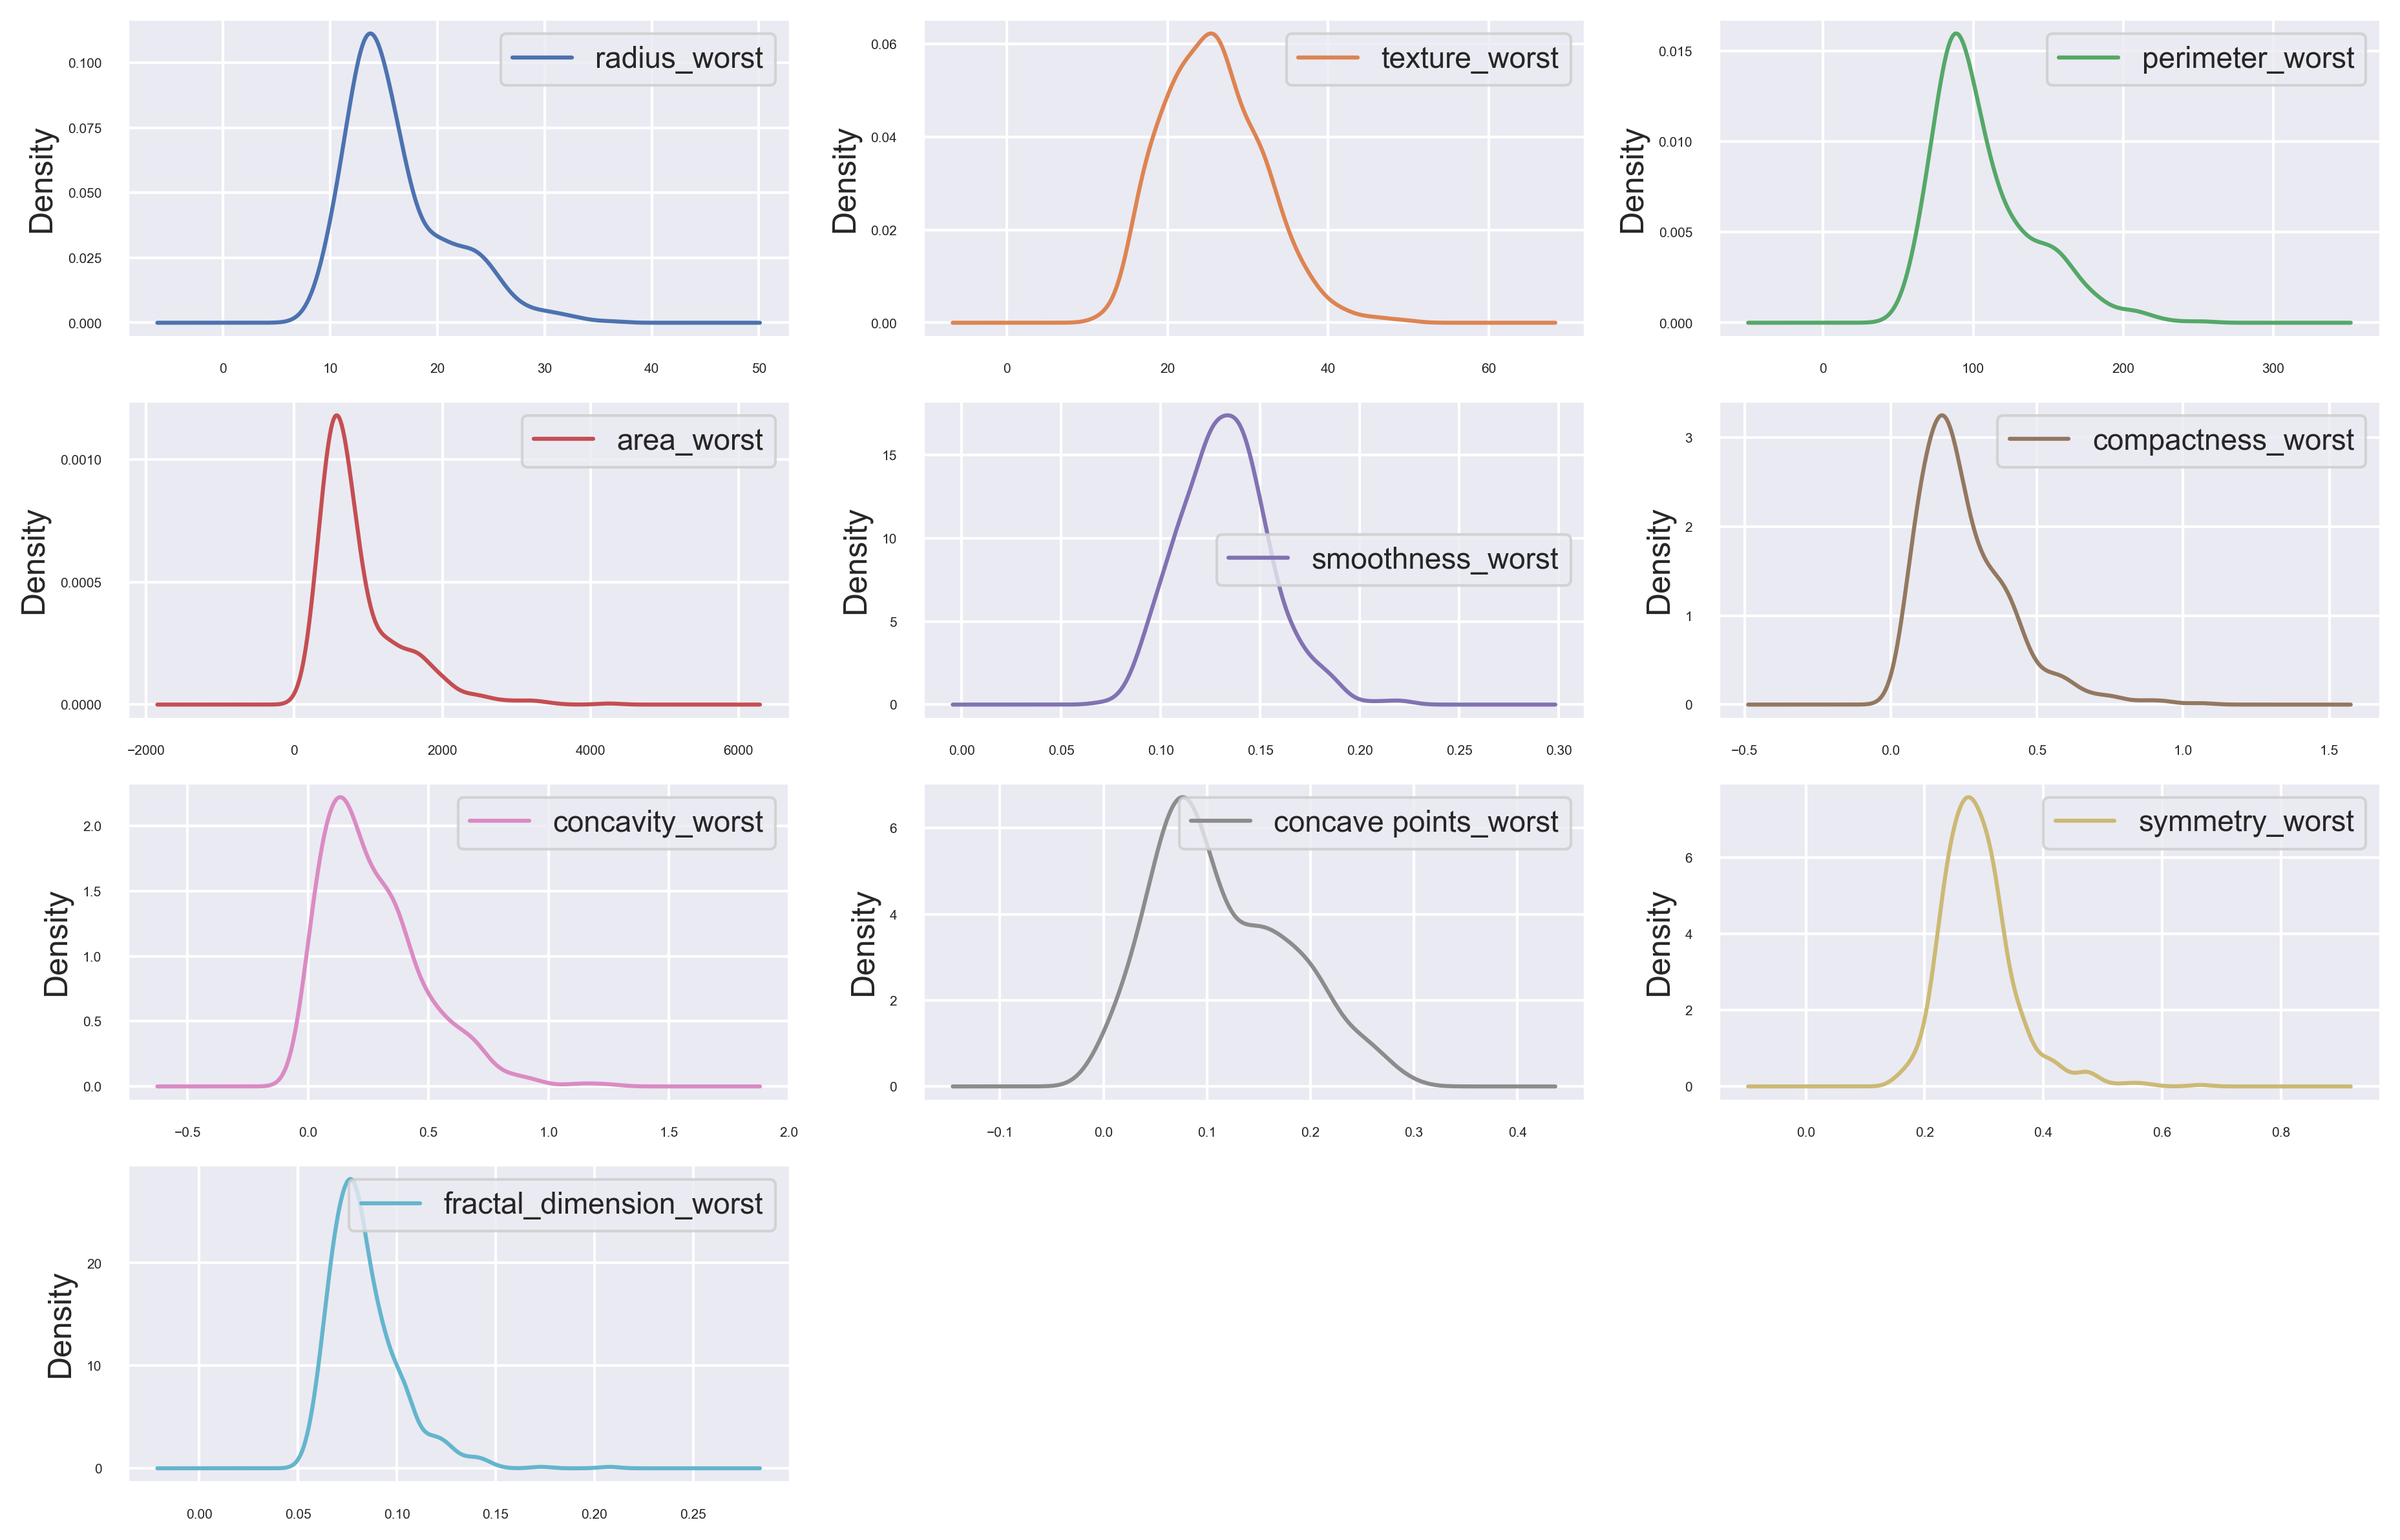

In [46]:
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=5, figsize=(15,10))

**Observations:**
- We can see that perhaps the attributes perimeter, radius, area, concavity, compactness may have an exponential distribution.
- We can also see that perhaps the texture, smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. 
- This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.
- In Machine Learning, data satisfying Normal Distribution is beneficial for model building. It makes math easier. Models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal.

## Pairplot

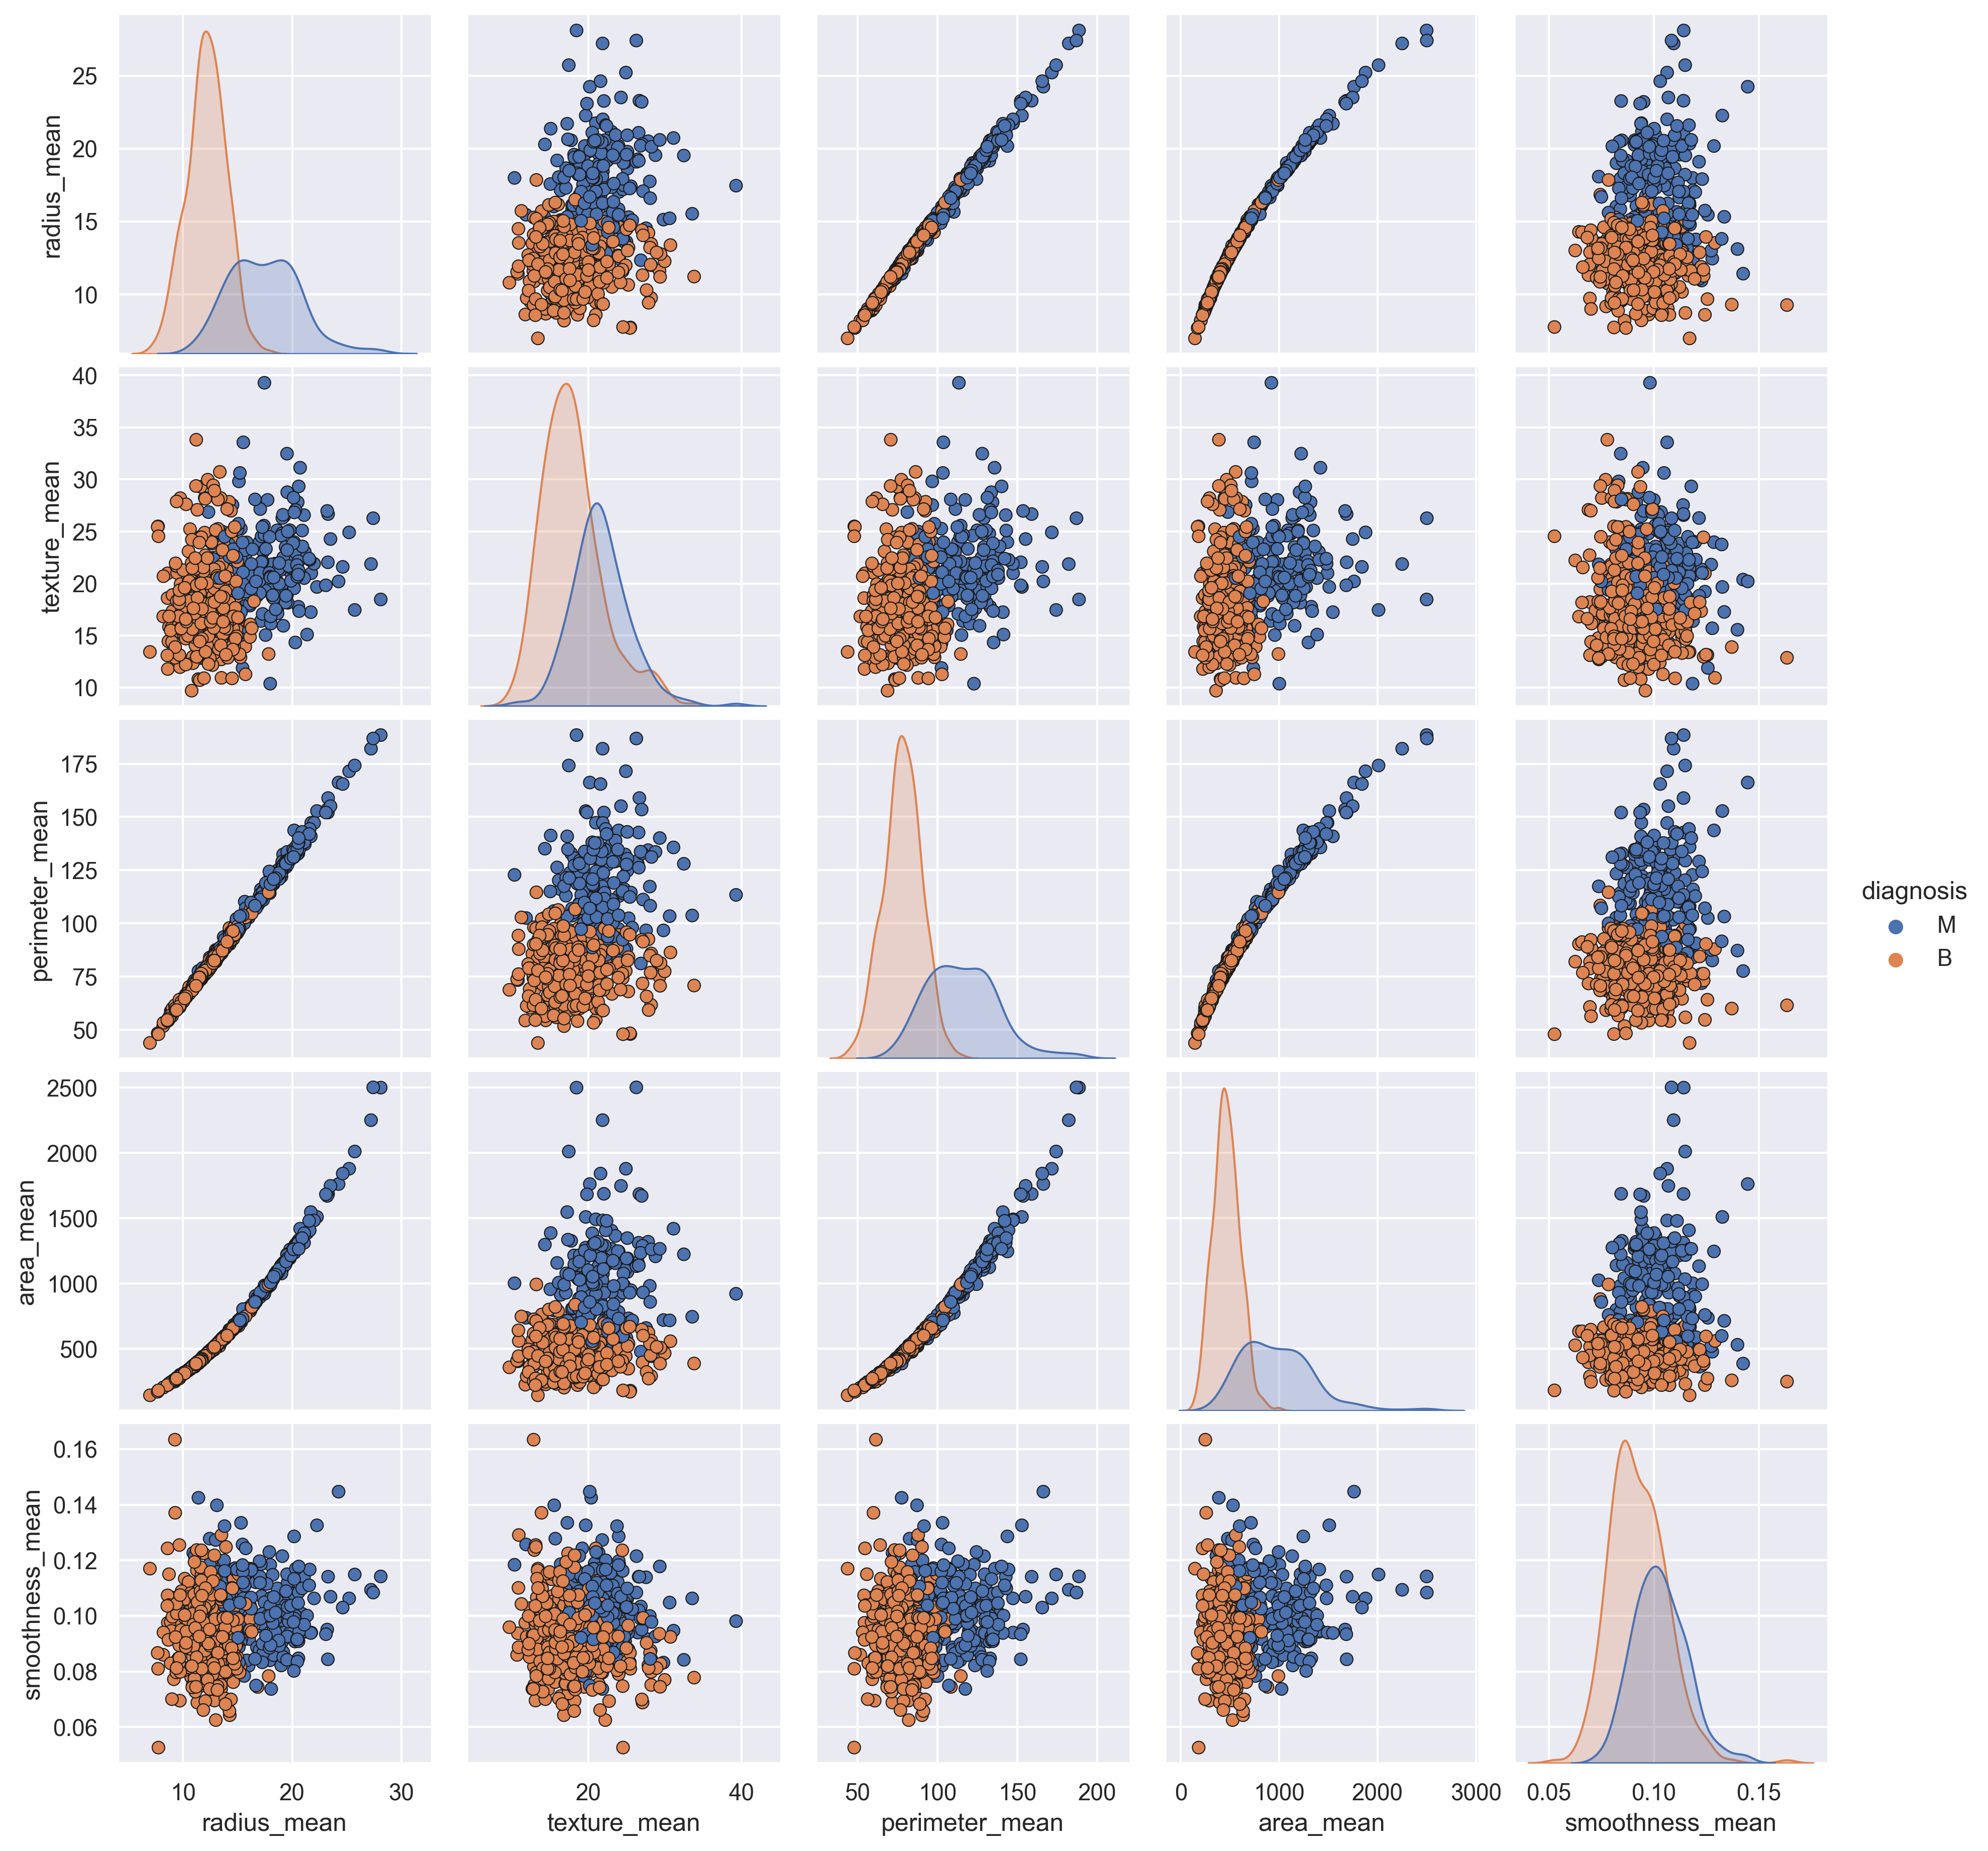

In [47]:
pp_mean = sns.pairplot(df[df.columns[1:7]], hue = "diagnosis", plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))

- Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
- Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.
- In any of the histograms there are no noticeable large outliers that warrants further cleanup.

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

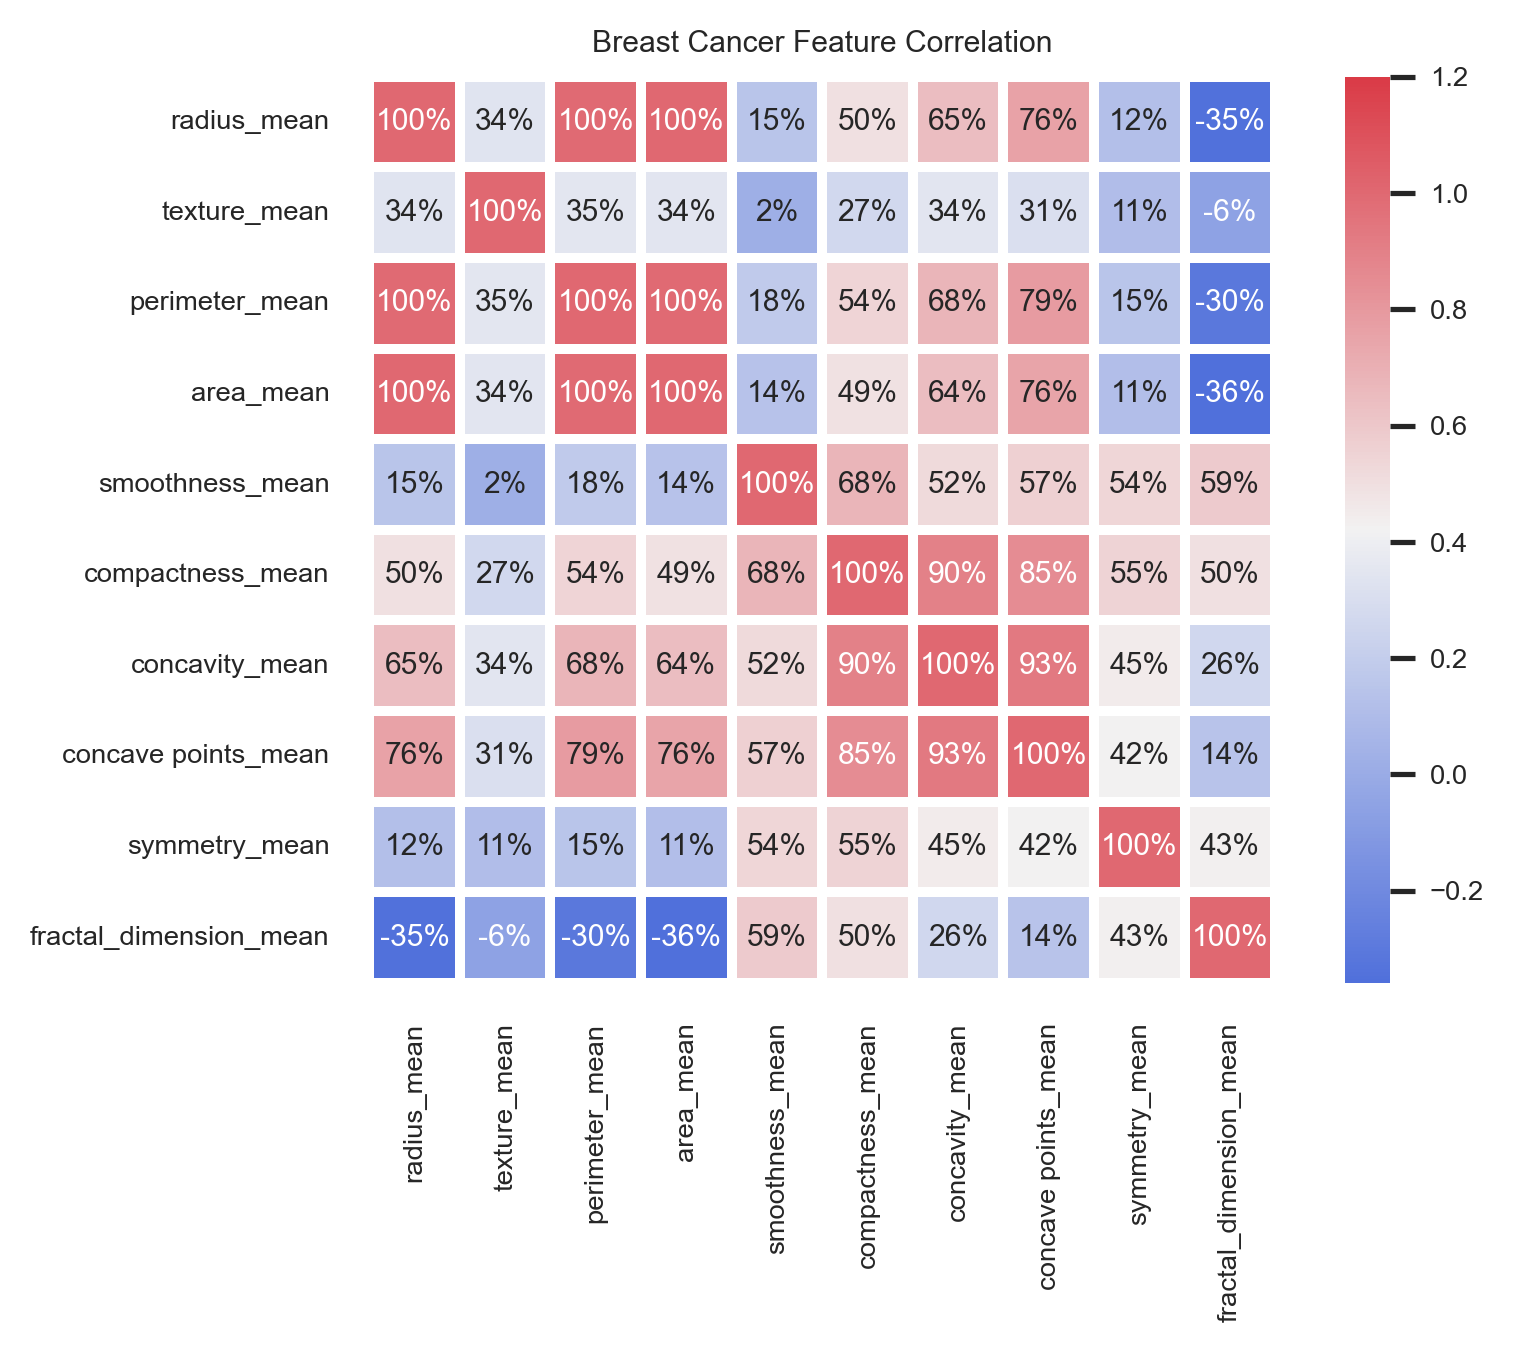

In [50]:
sns.set(font_scale=0.6)
plt.title('Breast Cancer Feature Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df_mean.corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, fmt = '.0%', linewidths=2)

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

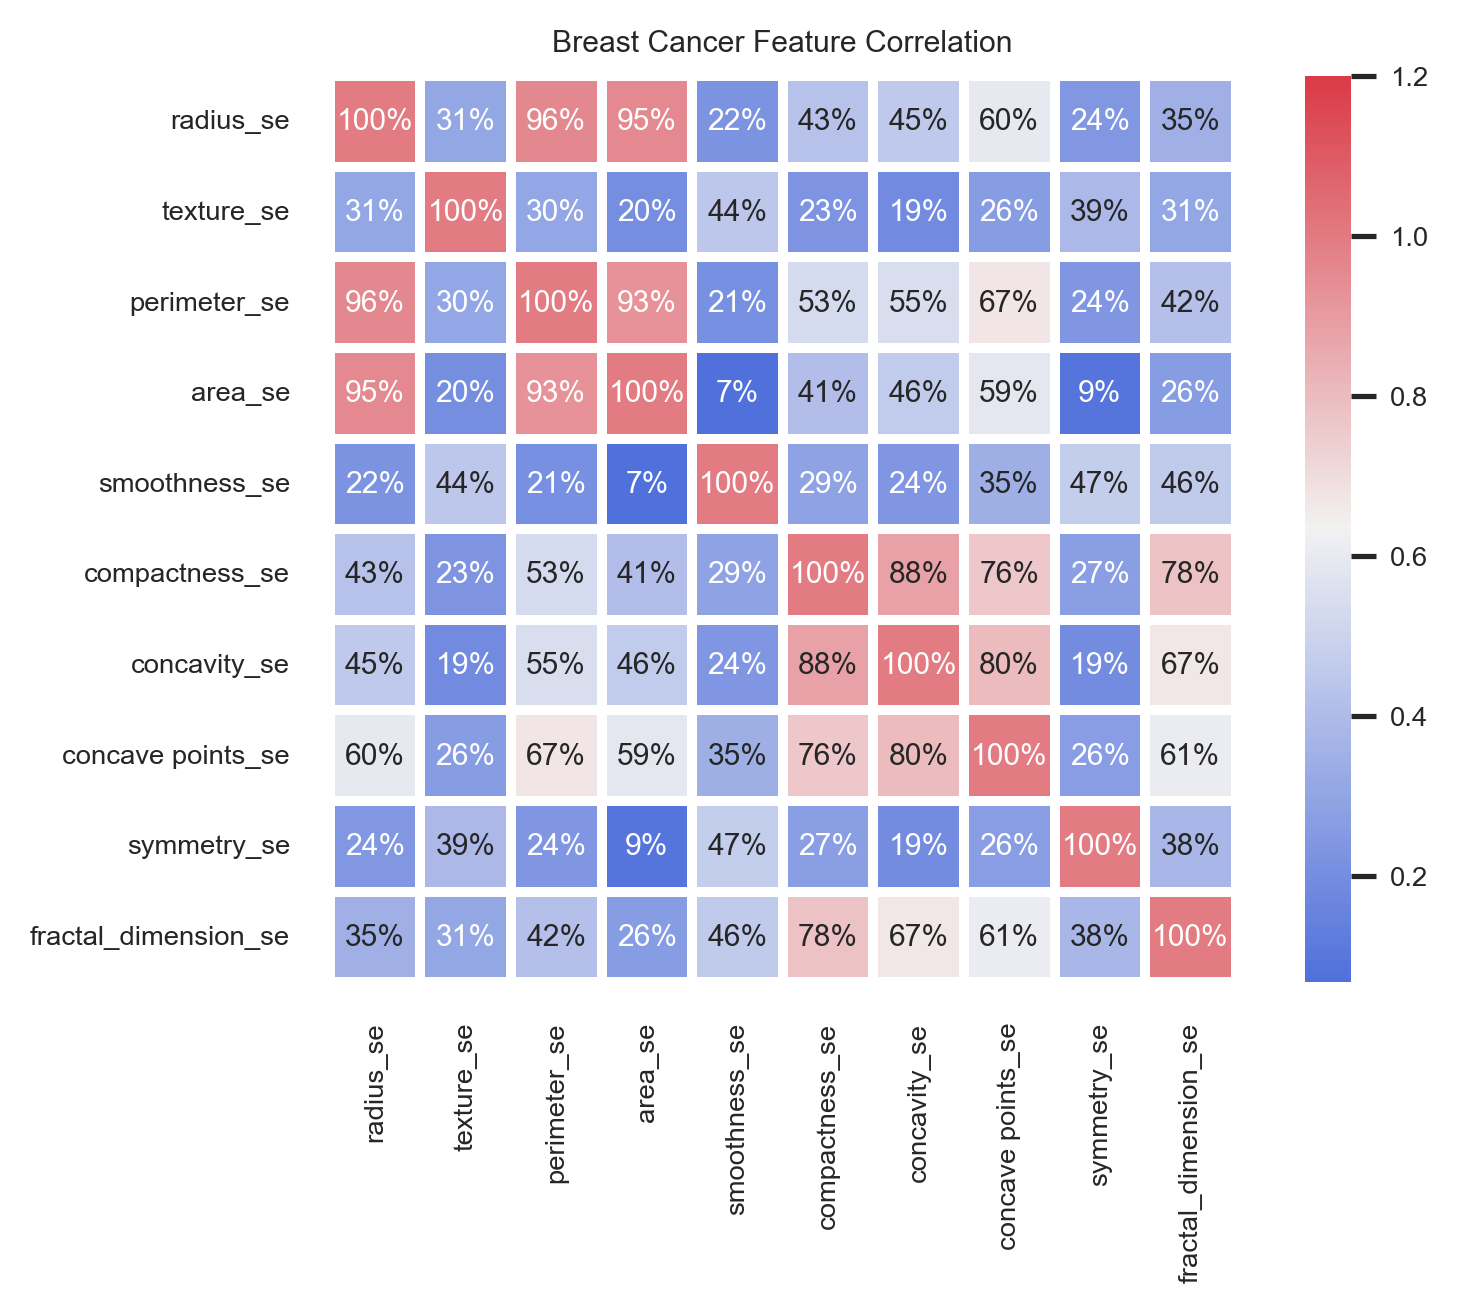

In [51]:
sns.set(font_scale=0.6)
plt.title('Breast Cancer Feature Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df_se.corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, fmt = '.0%', linewidths=2)

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

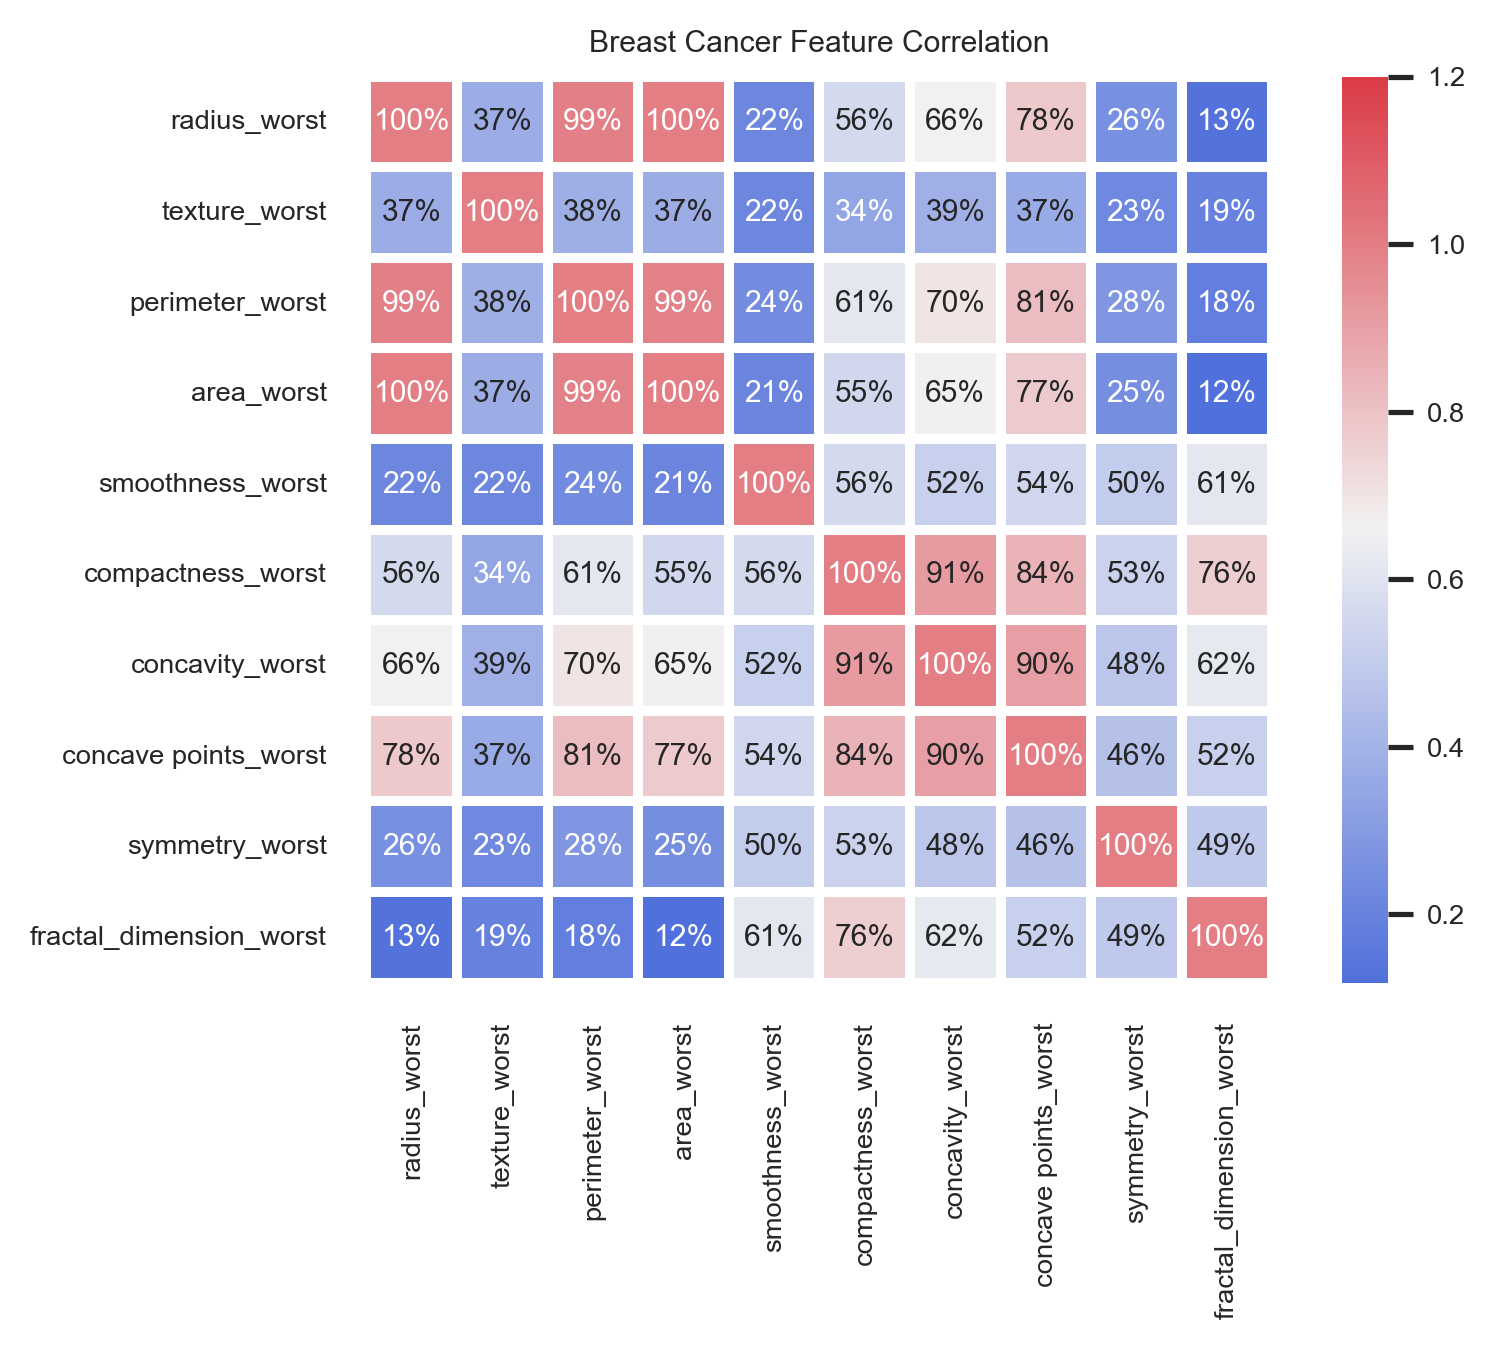

In [52]:
sns.set(font_scale=0.6)
plt.title('Breast Cancer Feature Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df_worst.corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, fmt = '.0%', linewidths=2)

In [53]:
# With the following function we can select highly correlated features
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr("spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [54]:
corr_features_mean = correlation(df_mean, 0.85)
corr_features_se = correlation(df_se, 0.85)
corr_features_worst = correlation(df_worst, 0.85)

display(corr_features_mean, corr_features_se, corr_features_worst)

{'area_mean', 'concave points_mean', 'concavity_mean', 'perimeter_mean'}

{'area_se', 'concavity_se', 'perimeter_se'}

{'area_worst', 'concave points_worst', 'concavity_worst', 'perimeter_worst'}

**Observations:**
We can see strong positive relationship exists with mean values paramaters between 100%-75%;.

1) The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;

2) Some paramters are moderately positive corrlated (r between 50%-75%) are concavity and area, concavity and perimeter etc

3) Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

# Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["diagnosis"] = encoder.fit_transform(df['diagnosis'])

After encoding the class labels(diagnosis), the **malignant tumors are now represented as class 1**(i.e prescence of cancer cells) and the **benign tumors are represented as class 0** (i.e no cancer cells detection), respectively.

# Feature Selection

## Relation among numerical and classification column

In [56]:
df_anova = df.iloc[:,1:]
grps = pd.unique(df_anova.diagnosis.values)

coldrop = []

for i in range(1, len(df_anova.columns)):
    
    d_data = {grp:df_anova[df_anova.columns[i]][df_anova.diagnosis == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[0], d_data[1])
    print("P_Value of {} and diagnosis".format(df_anova.columns[i]), p)

    if p < 0.05:
        print("There is relation between {} and diagnosis \n".format(df_anova.columns[i]))
    else:
        print("There is no relation between {} and diagnosis \n".format(df_anova.columns[i]))
        coldrop.append(df_anova.columns[i])

print(coldrop)

P_Value of radius_mean and diagnosis 8.465940572263339e-96
There is relation between radius_mean and diagnosis 

P_Value of texture_mean and diagnosis 4.0586360478986136e-25
There is relation between texture_mean and diagnosis 

P_Value of perimeter_mean and diagnosis 8.43625103617395e-101
There is relation between perimeter_mean and diagnosis 

P_Value of area_mean and diagnosis 4.734564310307994e-88
There is relation between area_mean and diagnosis 

P_Value of smoothness_mean and diagnosis 1.051850359203376e-18
There is relation between smoothness_mean and diagnosis 

P_Value of compactness_mean and diagnosis 3.938263105887557e-56
There is relation between compactness_mean and diagnosis 

P_Value of concavity_mean and diagnosis 9.966555755074321e-84
There is relation between concavity_mean and diagnosis 

P_Value of concave points_mean and diagnosis 7.101150161059557e-116
There is relation between concave points_mean and diagnosis 

P_Value of symmetry_mean and diagnosis 5.733384028

## Checking constant feature

In [57]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)

var_thres.get_support()

print(df.columns[var_thres.get_support()])


constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]
print(constant_columns)
print(len(constant_columns))

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
[]
0


In [58]:
display(corr_features_mean, corr_features_se, corr_features_worst)
display(coldrop)

corr_features_mean = list(corr_features_mean)
corr_features_se = list(corr_features_se)
corr_features_worst = list(corr_features_worst)

list_drop = corr_features_mean + corr_features_se + corr_features_worst + coldrop
list_drop = list(set(list_drop))
list_drop.append("id")
list_drop

{'area_mean', 'concave points_mean', 'concavity_mean', 'perimeter_mean'}

{'area_se', 'concavity_se', 'perimeter_se'}

{'area_worst', 'concave points_worst', 'concavity_worst', 'perimeter_worst'}

['fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'symmetry_se',
 'fractal_dimension_se']

['smoothness_se',
 'symmetry_se',
 'area_se',
 'concavity_worst',
 'fractal_dimension_se',
 'perimeter_worst',
 'area_mean',
 'fractal_dimension_mean',
 'concave points_mean',
 'concavity_se',
 'area_worst',
 'perimeter_se',
 'perimeter_mean',
 'concavity_mean',
 'texture_se',
 'concave points_worst',
 'id']

- We have to drop this features as they are highly correlated with independent features and hence they are acting as duplicate feature
- Some features don't have any relation with target feature, hence we will drop them

## Dropping features

In [59]:
df.drop(list_drop, axis=1, inplace=True)
display(df.columns)
display(df.shape)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'radius_se', 'compactness_se',
       'concave points_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

(569, 15)

In [60]:
df.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          1        17.99         10.38          0.11840           0.27760   
1          1        20.57         17.77          0.08474           0.07864   
2          1        19.69         21.25          0.10960           0.15990   
3          1        11.42         20.38          0.14250           0.28390   
4          1        20.29         14.34          0.10030           0.13280   

   symmetry_mean  radius_se  compactness_se  concave points_se  radius_worst  \
0         0.2419     1.0950         0.04904            0.01587         25.38   
1         0.1812     0.5435         0.01308            0.01340         24.99   
2         0.2069     0.7456         0.04006            0.02058         23.57   
3         0.2597     0.4956         0.07458            0.01867         14.91   
4         0.1809     0.7572         0.02461            0.01885         22.54   

   texture_worst  smoothness_worst  compactness_worst  symmetry_worst  \
0          17.33            0.1622             0.6656          0.4601   
1          23.41            0.1238             0.1866          0.2750   
2          25.53            0.1444             0.4245          0.3613   
3          26.50            0.2098             0.8663          0.6638   
4          16.67            0.1374             0.2050          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

# Splitting of the data and Standardization

## Target Feature seperation

In [61]:
x = df.drop( "diagnosis", axis=1)
y = df.diagnosis

## Standardization

Most machine learning and optimization algorithms behave/work much better if features are on the same scale.

In [62]:
scaler = StandardScaler()
features = scaler.fit_transform(x)
features

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  2.61666502,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241, -0.82696245, ..., -0.43044422,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  1.08293217,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.35073535,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  3.90484795,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.2075525 ,
        -0.04813821, -0.75120669]])

## Splitting data into train and test

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will

-> Split the available data into a training set and a testing set. (70% training, 30% test)

-> Train the algorithm on the first part,

-> make predictions on the second part and

-> evaluate the predictions against the expected results.

In [63]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=1)

In [64]:
y_train.shape, y_train[y_train==1].shape, y_train[y_train==0].shape

((398,), (149,), (249,))

# Balancing Training Data - Over Sampling

In [65]:
os =  RandomOverSampler(sampling_strategy=1)

x_train, y_train = os.fit_resample(x_train, y_train)

print(len(y_train[y_train==0]), len(y_train[y_train==1]))
print(len(x_train))

249 249
498


# Model Building

## Logistic Regression

In [ ]:
def lr_grid_search(X, y):
    model = LogisticRegression()
    
    # Create a dictionary of all values we want to test
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    
    # define grid search
    param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X, y)
    
    return grid_result.best_params_

In [ ]:
lr_grid_search(x_train, y_train)

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [61]:
lr =LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy: 0.9590643274853801
Precision: 0.9375
Recall: 0.9523809523809523
0.9738955823293173
0.9590643274853801


In [62]:
lr_tacc = lr.score(x_test,y_test)
lr_train_acc = lr.score(x_train, y_train)

### Confusion Matrix of Logistic Regression Model

<AxesSubplot:>

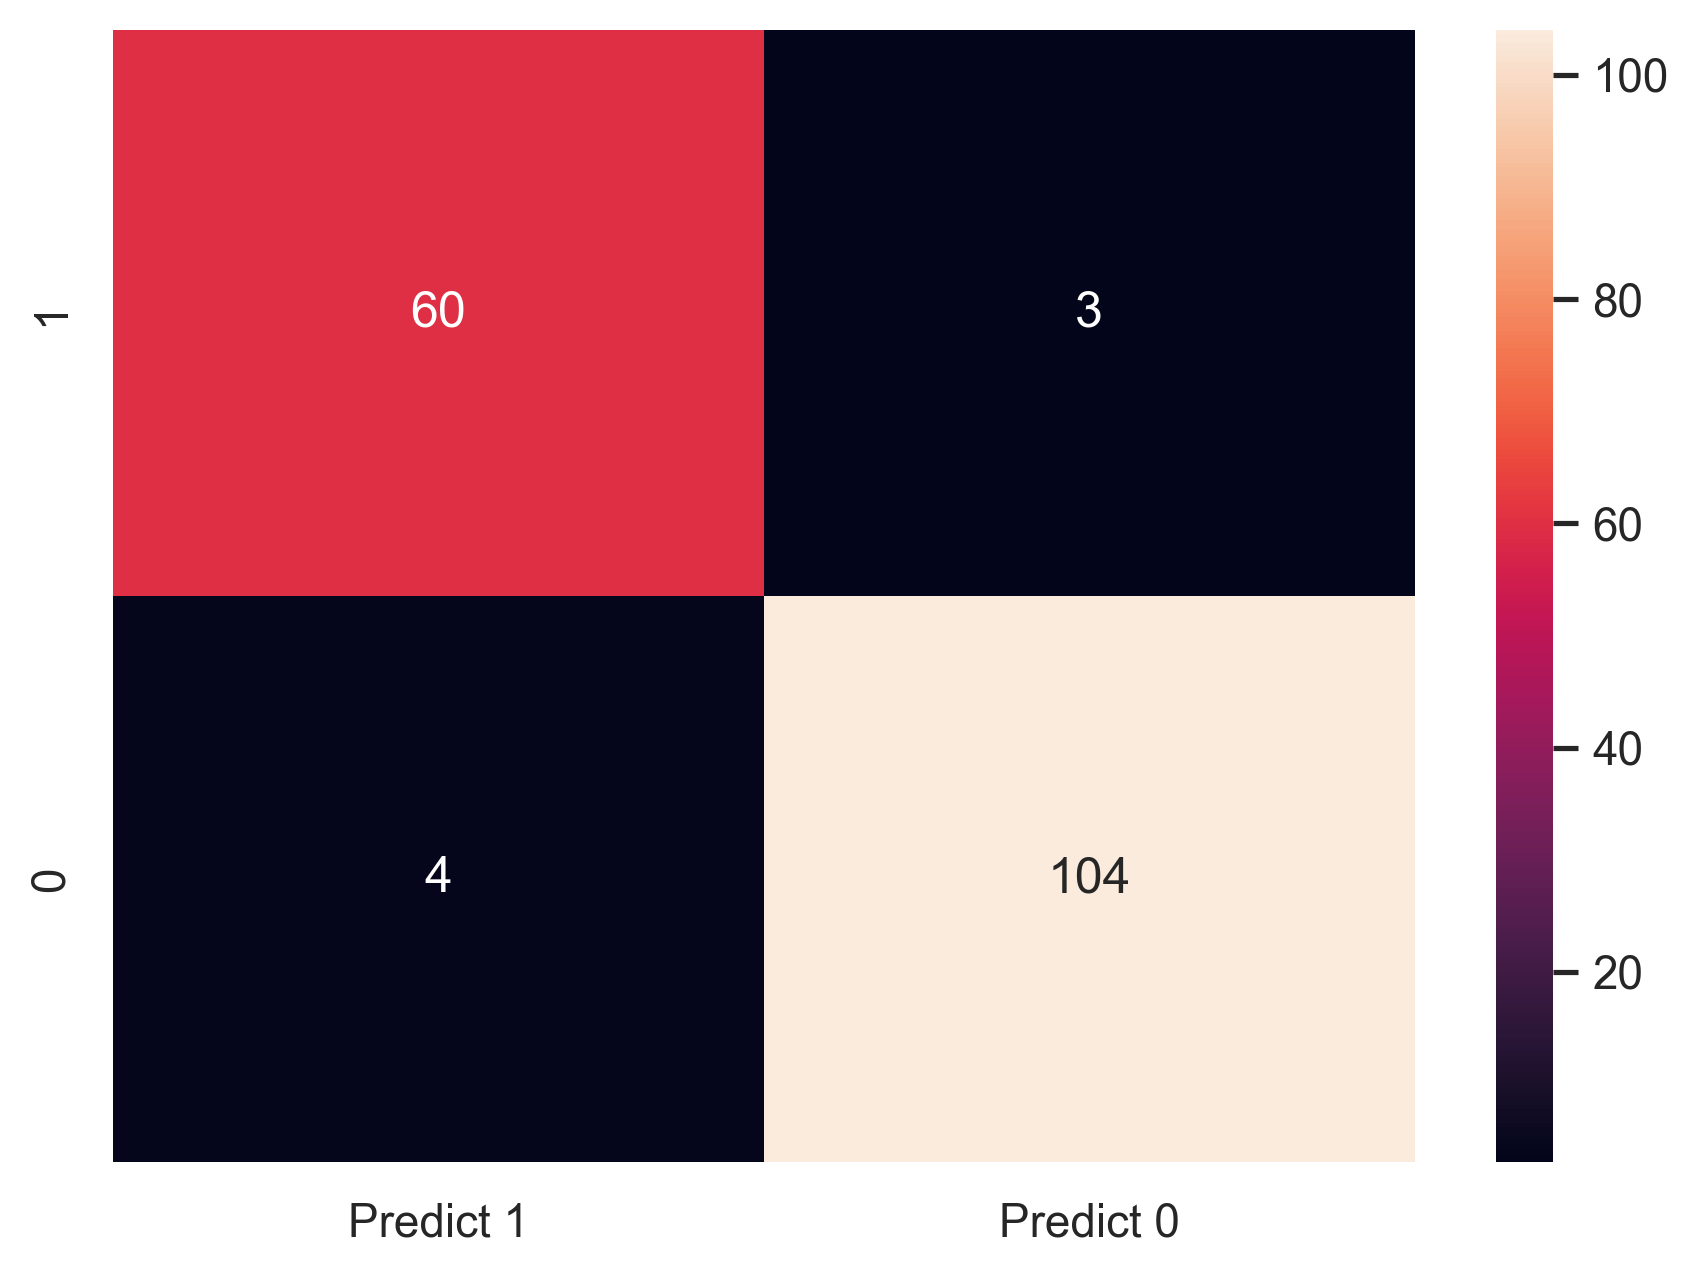

In [74]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Logistic Regression Model

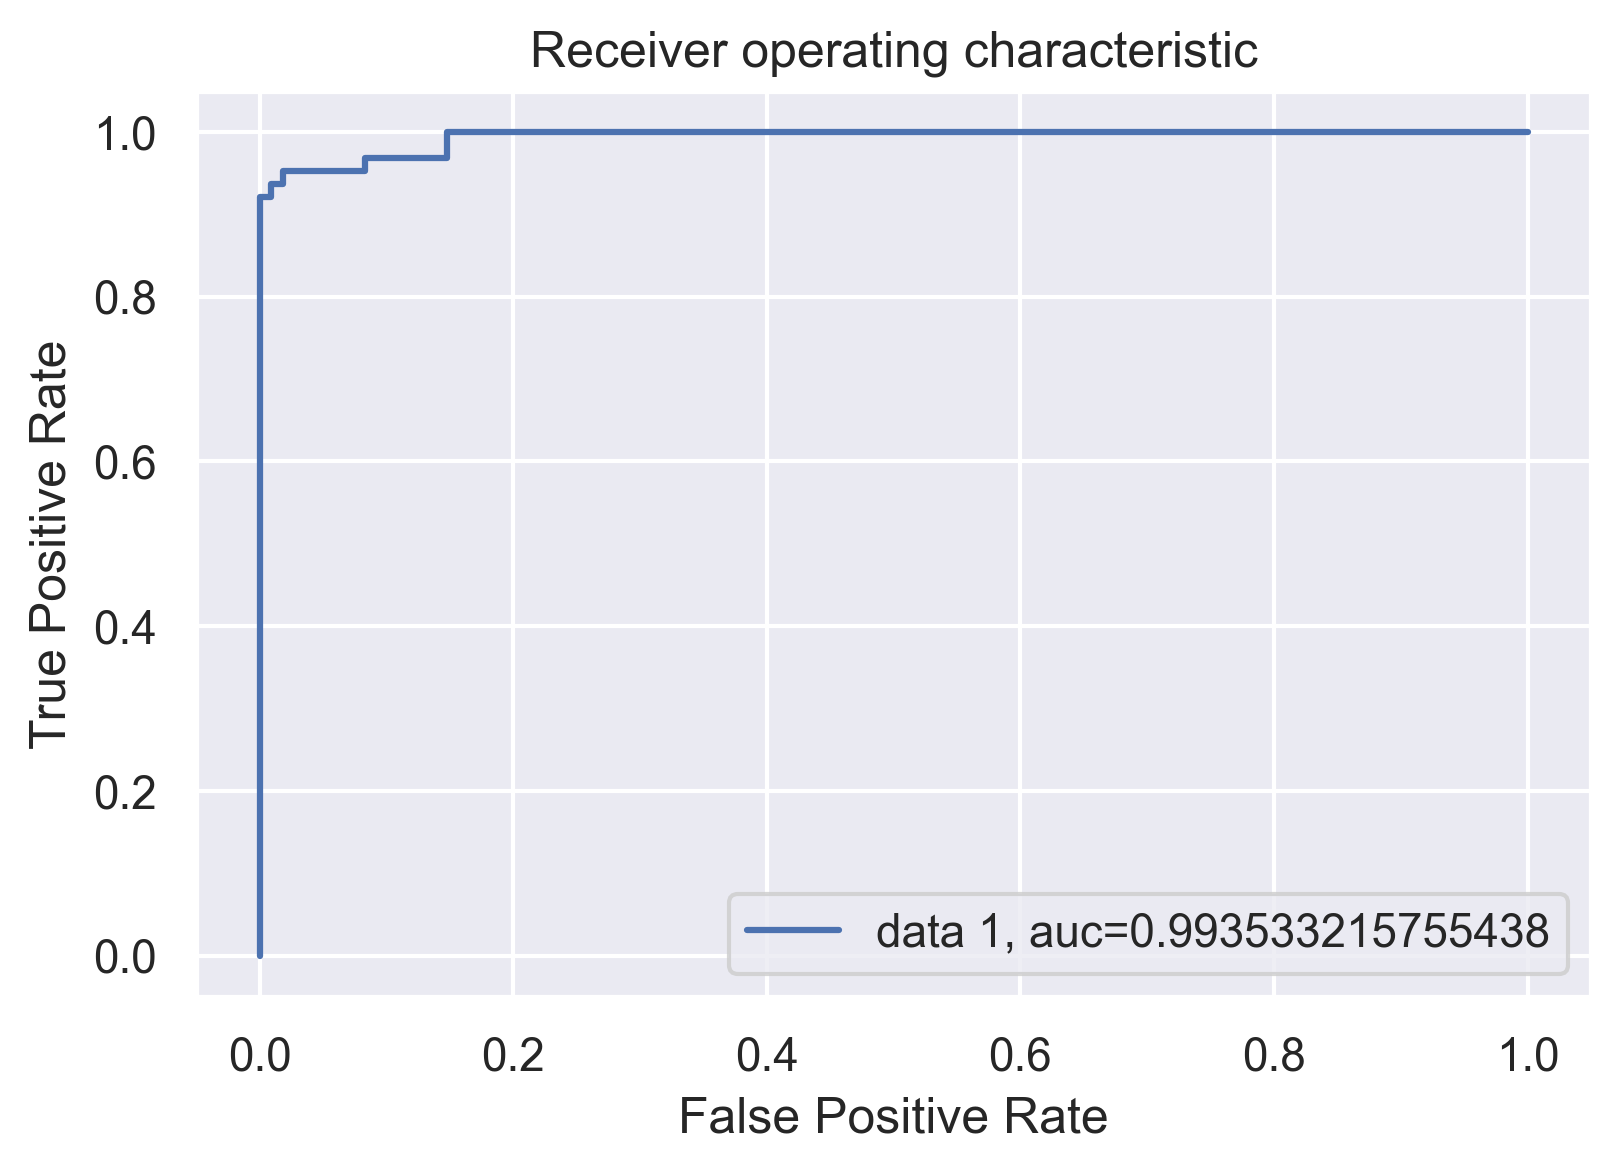

In [75]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [65]:
lr_auc = auc
lr_auc

0.993533215755438

## Decision Tree Classifier

In [52]:
def dtree_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15)}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # decision tree model
    dtree = DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_

In [57]:
dtree_grid_search(x_train, y_train)

{'criterion': 'entropy', 'max_depth': 6}

In [66]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)

print(classification_report(y_test, y_pred1))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       108
           1       0.93      0.86      0.89        63

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

Accuracy: 0.9239766081871345
Precision: 0.9310344827586207
Recall: 0.8571428571428571


In [67]:
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

0.9718875502008032
0.9239766081871345


In [68]:
dt_tacc = dt.score(x_test,y_test)

In [69]:
dt_train_acc = dt.score(x_train, y_train)
dt_train_acc

0.9718875502008032

### Confusion Matrix of Decision Tree Model

<AxesSubplot:>

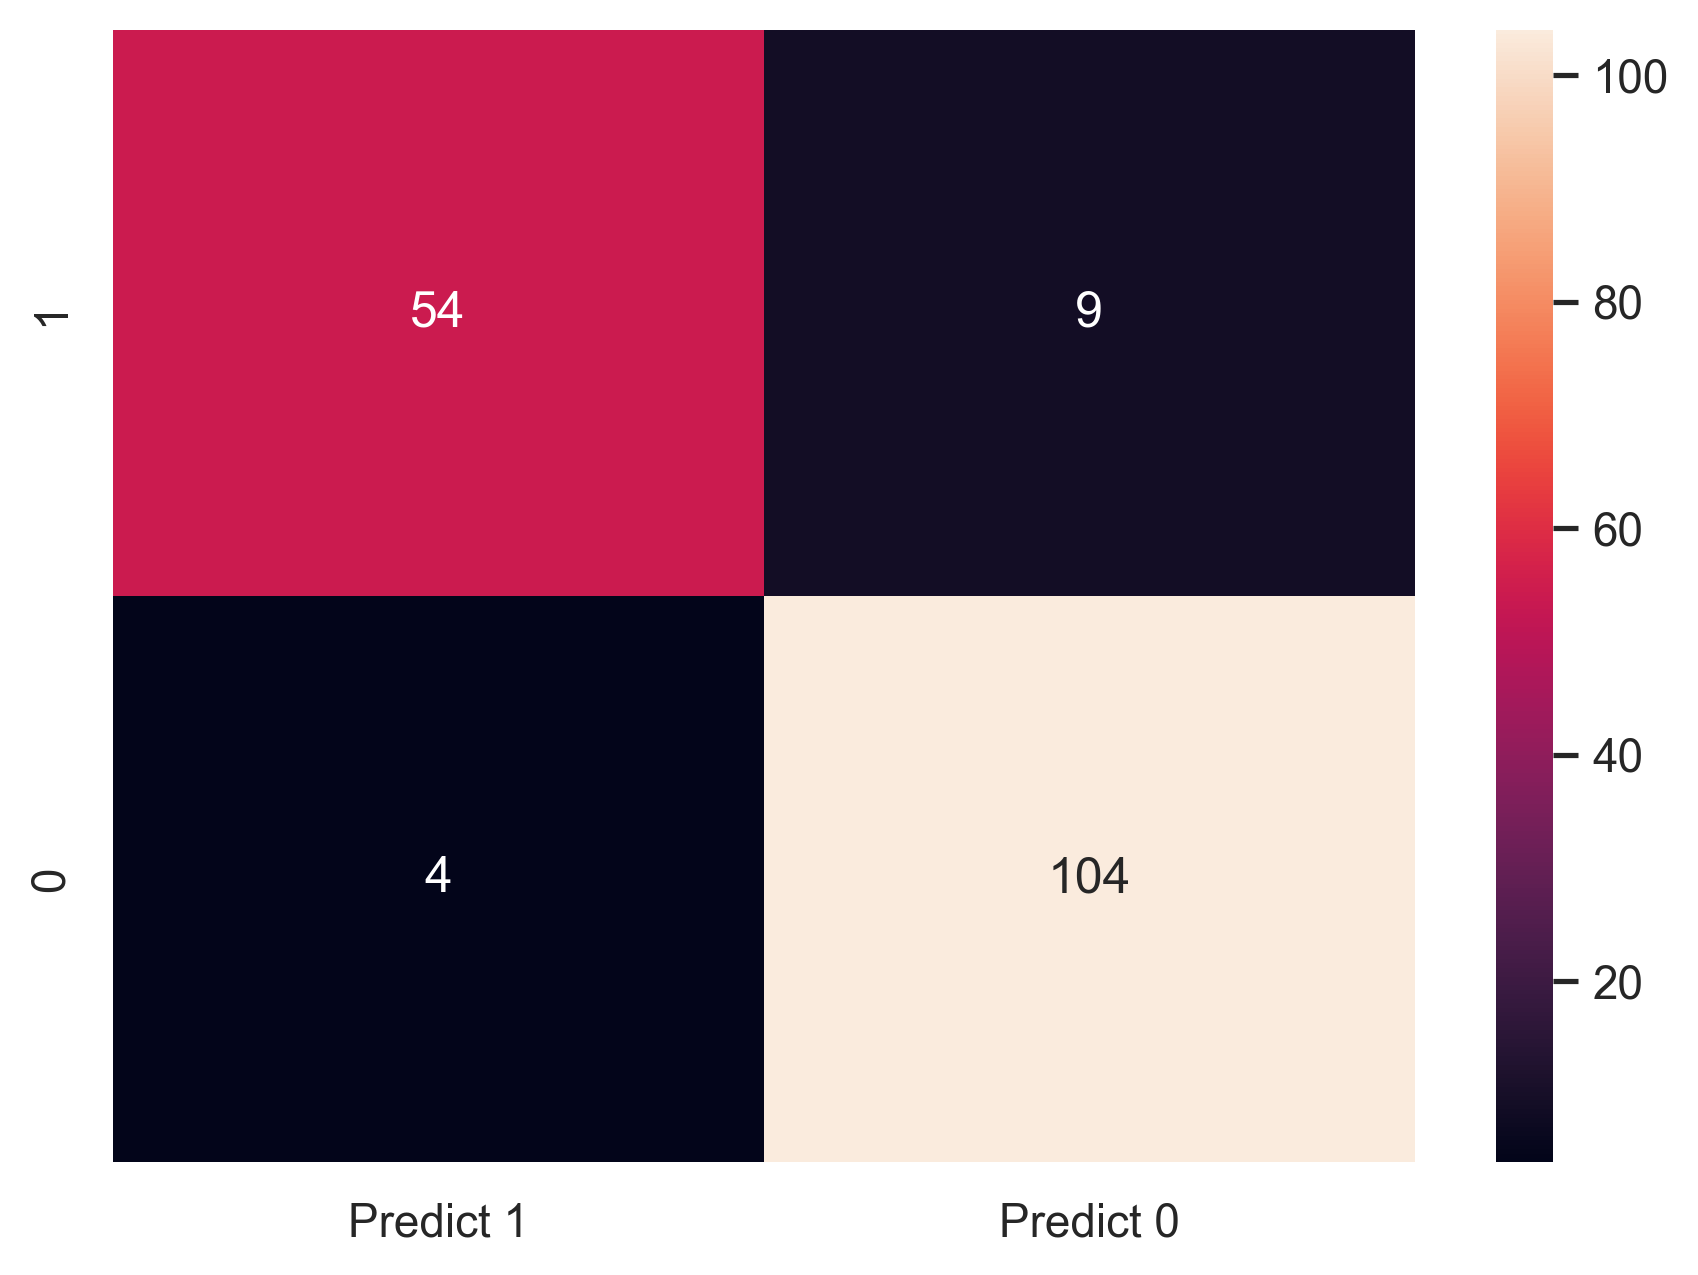

In [76]:
cm = metrics.confusion_matrix(y_test, y_pred1, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Decision Tree Classifier Model

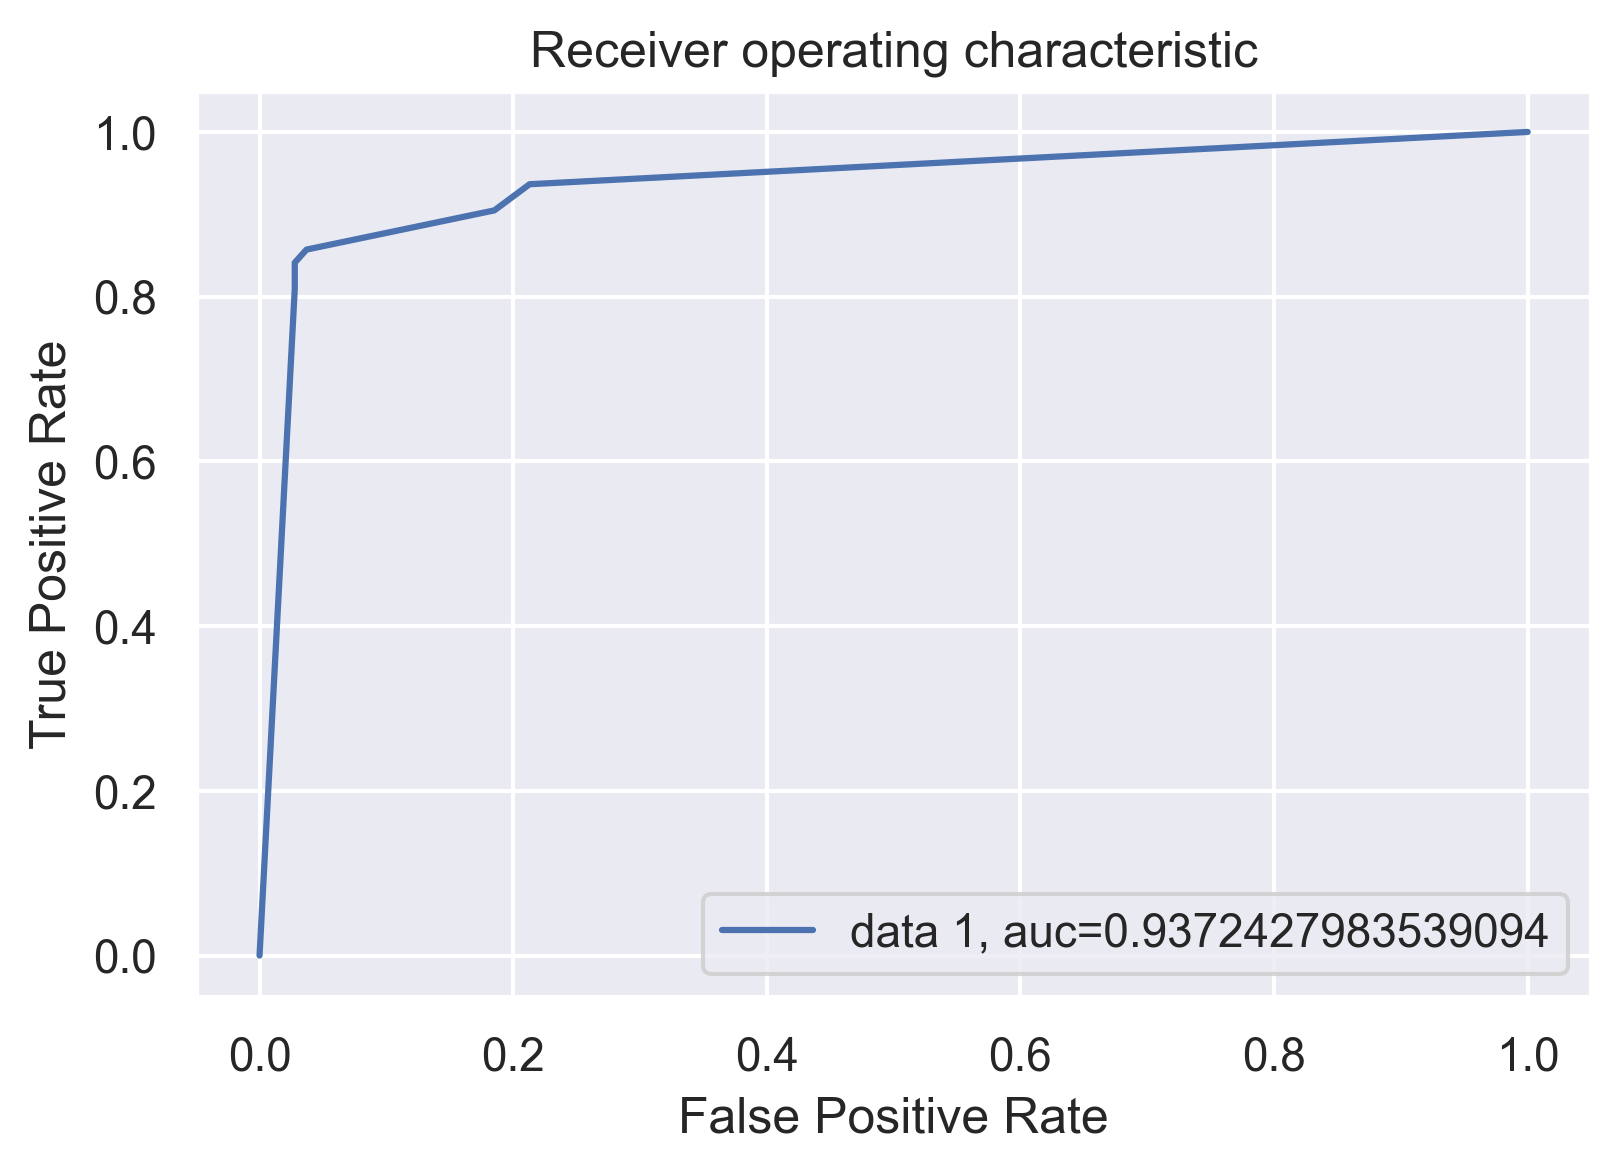

In [77]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [78]:
dt_auc = auc

## Ensemble learning - AdaBoosting

In [70]:
def ada_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'n_estimators':[10, 50, 100, 500], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # AdaBoost model
    ada = AdaBoostClassifier()
    
    # Use gridsearch to test all values
    ada_gscv = GridSearchCV(ada, param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    #fit model to data
    grid_result = ada_gscv.fit(X, y)
    
    return grid_result.best_score_, ada_gscv.best_params_

In [71]:
ada_grid_search(x_train, y_train)

(0.978625850340136, {'learning_rate': 1.0, 'n_estimators': 500})

In [79]:
abcl = AdaBoostClassifier(n_estimators=500, learning_rate=1.0)
abcl = abcl.fit(x_train, y_train)
y_pred4 = abcl.predict(x_test)

print(classification_report(y_test, y_pred4))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy: 0.9590643274853801
Precision: 0.9666666666666667
Recall: 0.9206349206349206


In [80]:
print(abcl.score(x_train,y_train))
print(abcl.score(x_test,y_test))

1.0
0.9590643274853801


In [81]:
ada_tacc = abcl.score(x_test,y_test)

In [82]:
ada_train_acc = abcl.score(x_train, y_train)

### Confusion Matrix of AdaBoost Model

<AxesSubplot:>

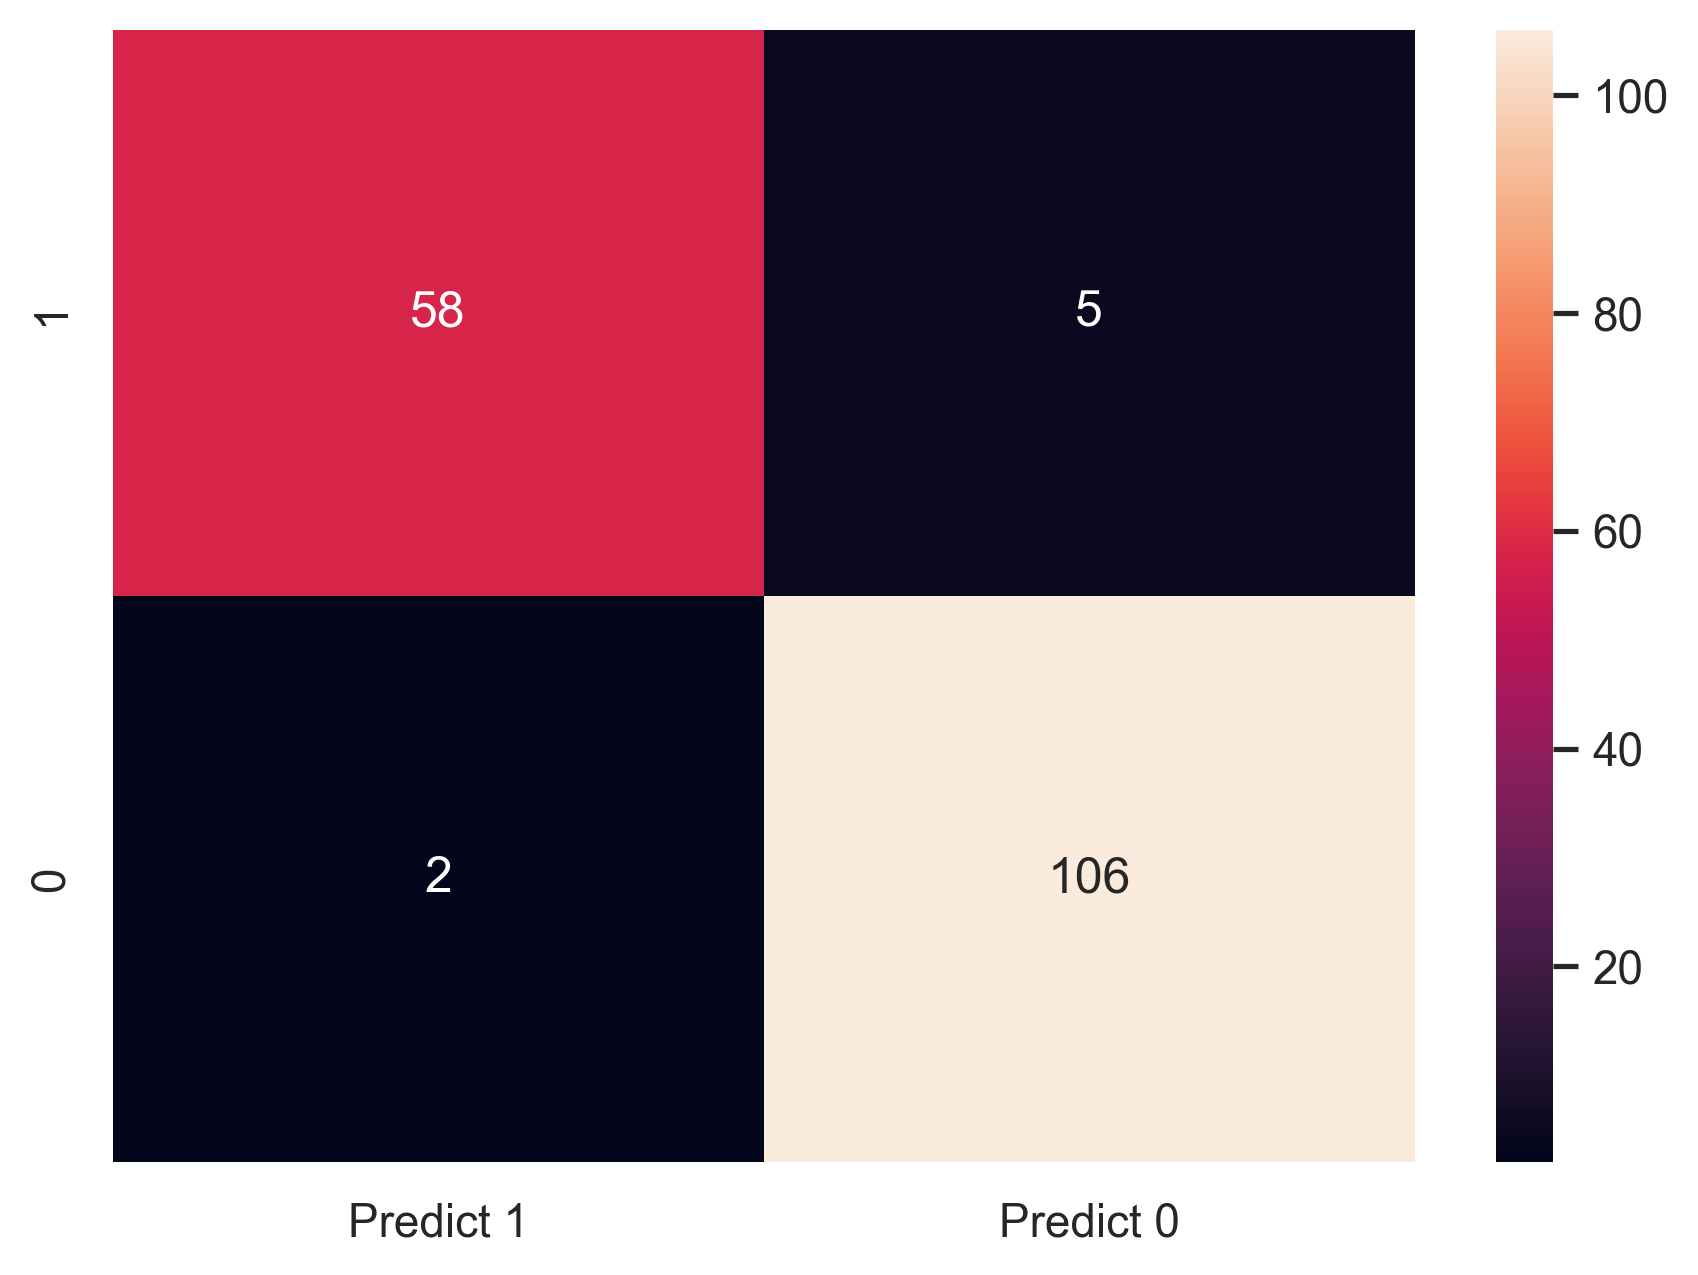

In [83]:
cm = metrics.confusion_matrix(y_test, y_pred4, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of AdaBoost model

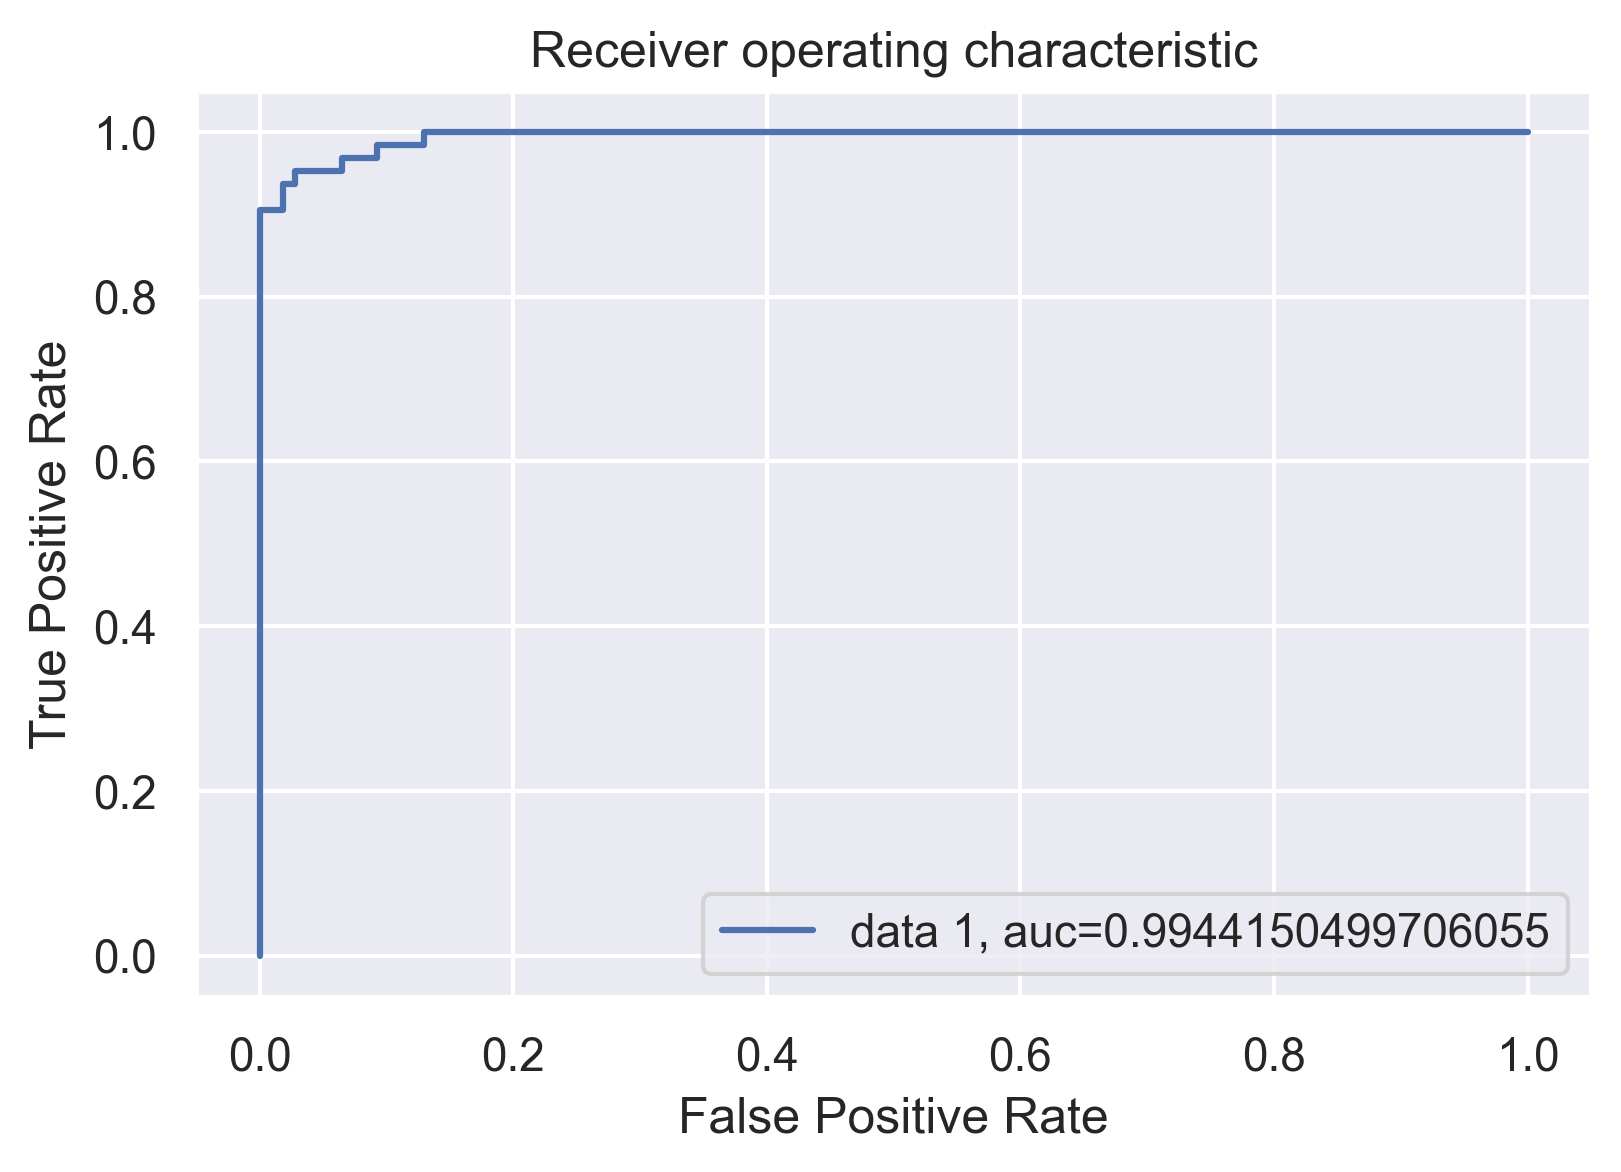

In [84]:
y_pred_proba = abcl.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [85]:
ada_auc = auc

## Ensemble RandomForest Classifier

In [78]:
def rf_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 
    'n_estimators': [5,10,20,40,50,60,70,80,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Random Forest model
    rf = RandomForestClassifier()
    
    #use gridsearch to test all values
    rf_gscv = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    rf_gscv.fit(X, y)
    
    return rf_gscv.best_params_

In [79]:
rf_grid_search(x_train, y_train)

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [86]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=8, max_features='sqrt')
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

print(classification_report(y_test, y_pred2))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy: 0.9473684210526315
Precision: 0.921875
Recall: 0.9365079365079365


In [87]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

1.0
0.9473684210526315


In [88]:
rf_tacc = rf.score(x_test,y_test)

In [89]:
rf_train_acc = rf.score(x_train, y_train)

### Confusion Matrix of Random Forest Classifier Model

<AxesSubplot:>

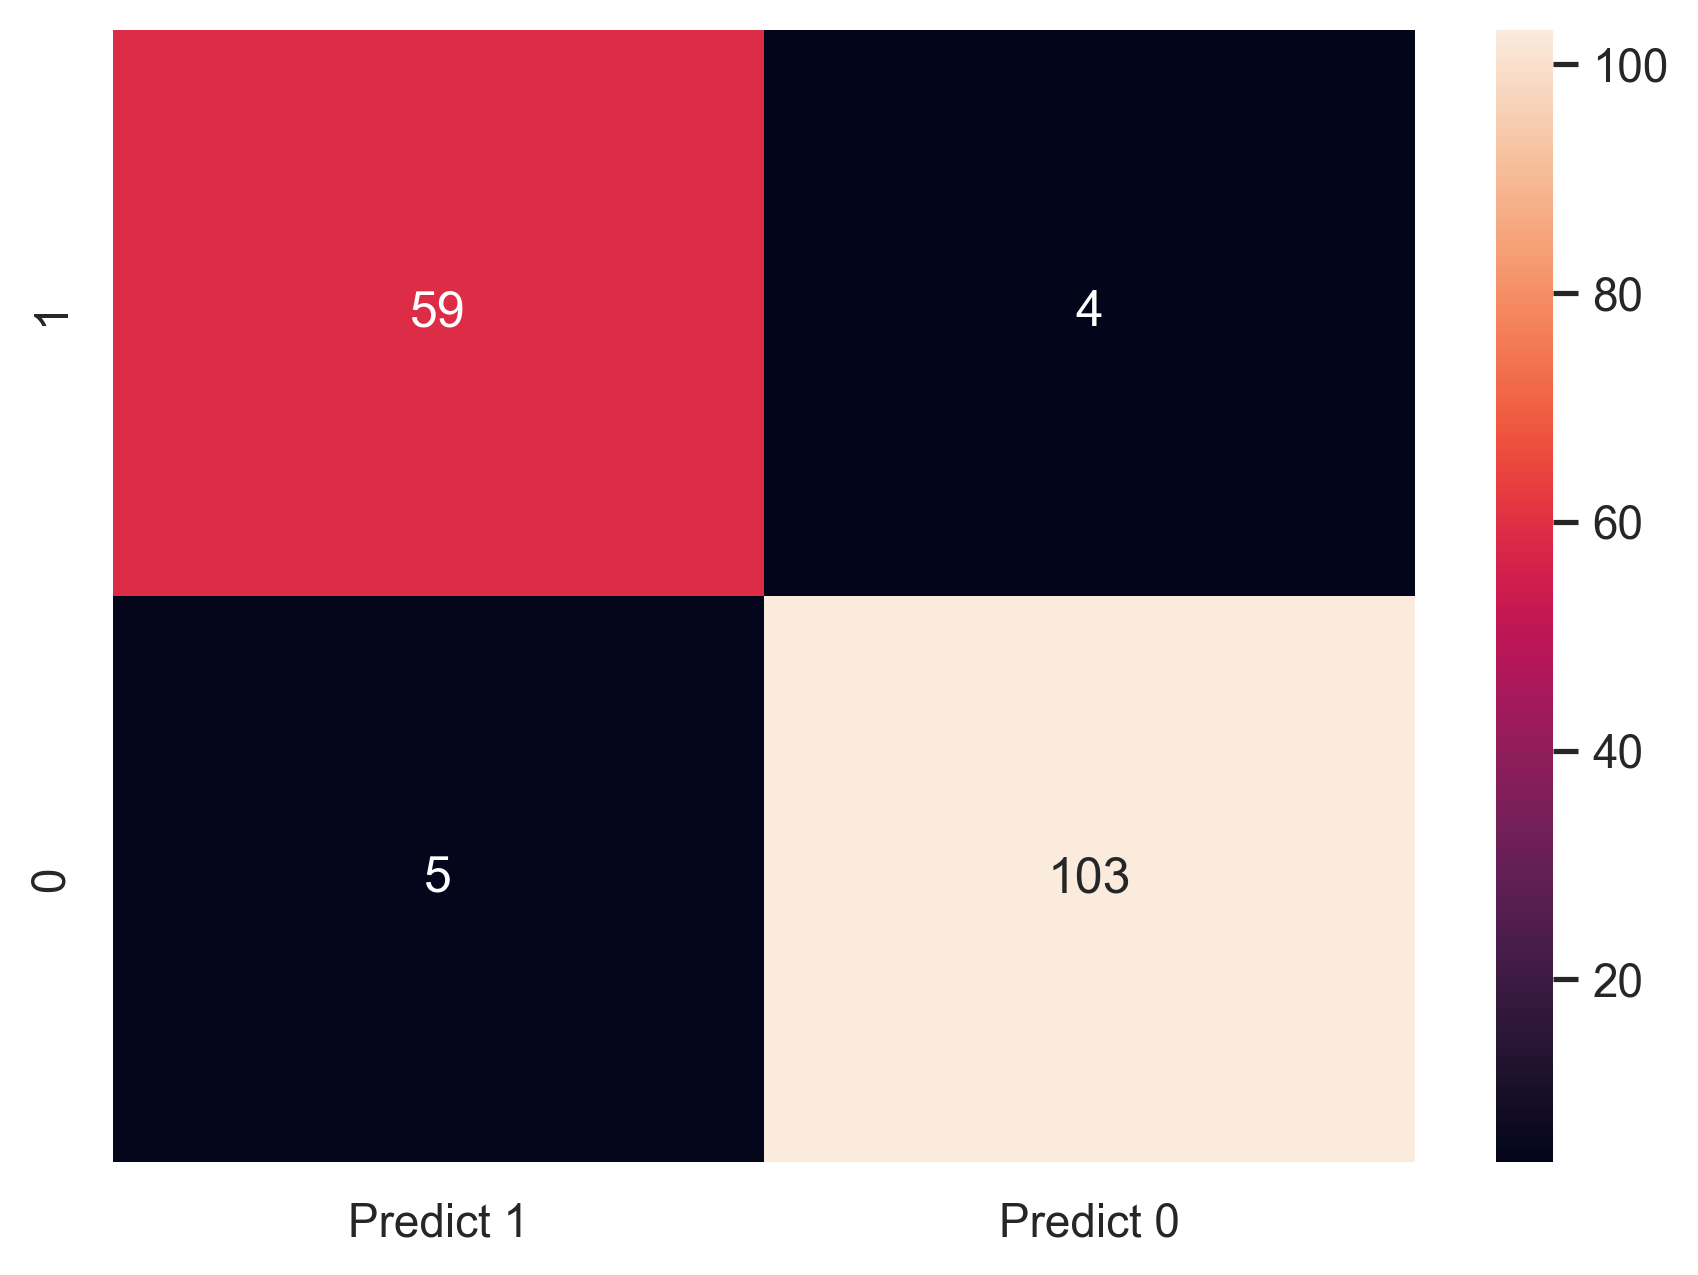

In [90]:
cm = metrics.confusion_matrix(y_test, y_pred2, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Random Forest Classifier

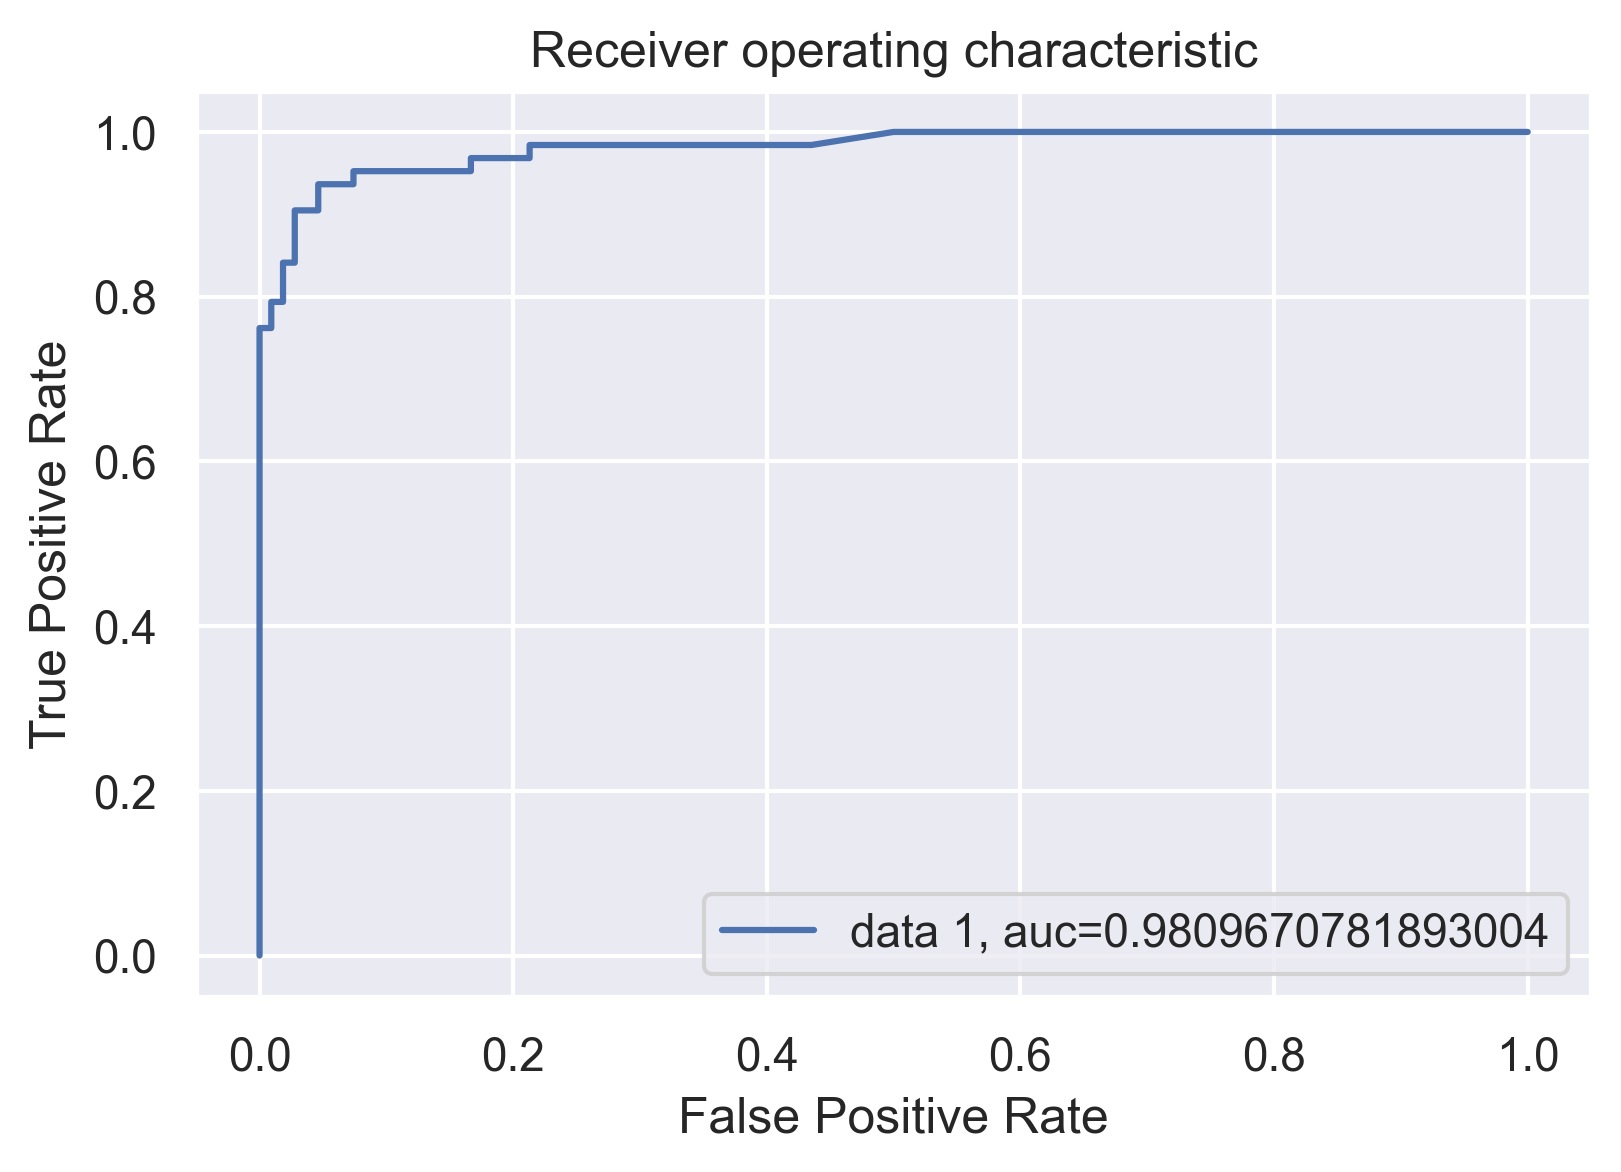

In [91]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [92]:
rf_auc = auc

## kNN

In [86]:
def knn_grid_search(X, y):
    #create a dictionary of all values we want to test
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    knn = KNeighborsClassifier()
    
    #use gridsearch to test all values
    knn_gscv = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    #fit model to data
    knn_gscv.fit(X, y)
    
    return knn_gscv.best_params_

In [87]:
knn_grid_search(x_train, y_train)

{'n_neighbors': 1}

In [93]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.9919678714859438
0.9532163742690059


In [94]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       108
           1       1.00      0.87      0.93        63

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



In [95]:
knn_tacc = knn.score(x_test, y_test)

In [96]:
knn_train_acc = knn.score(x_train, y_train)

### Confusion Matrix of kNN

<AxesSubplot:>

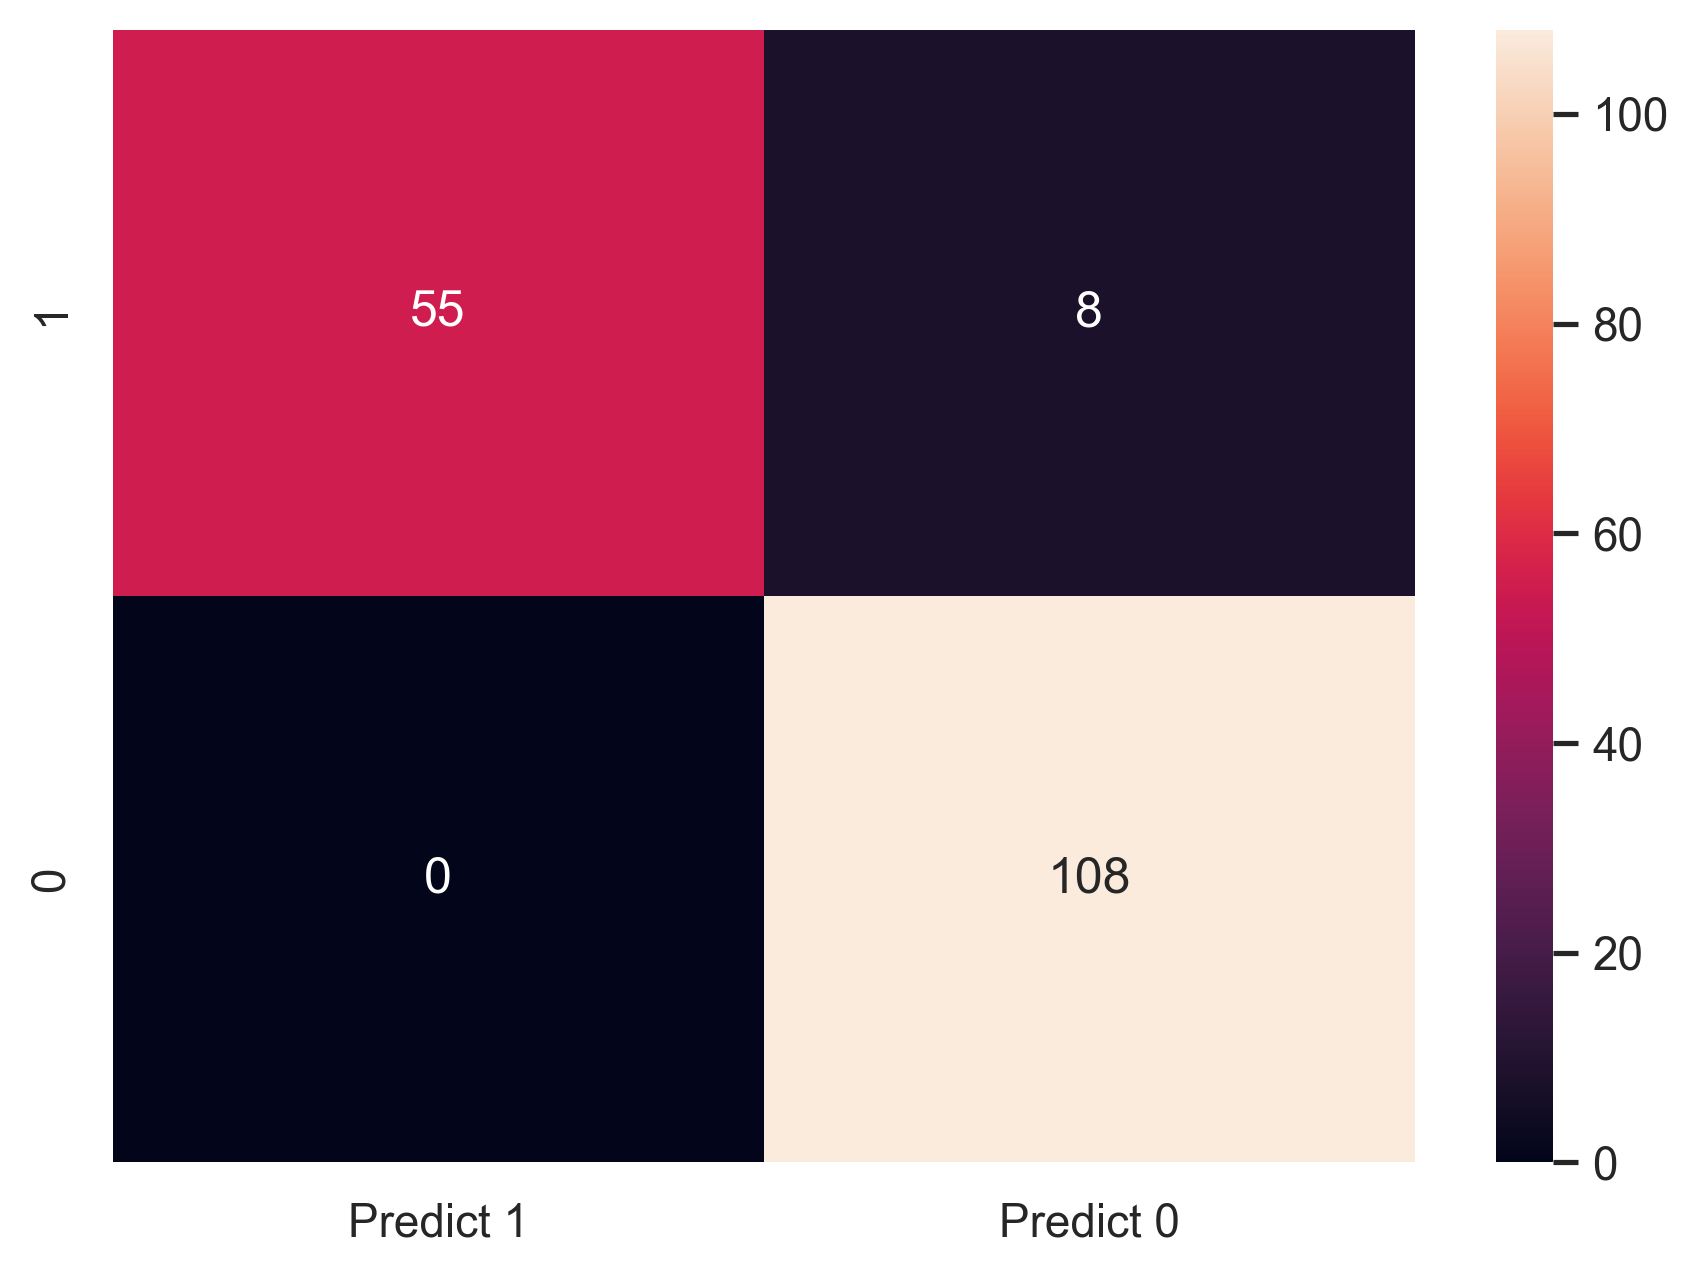

In [97]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of kNN

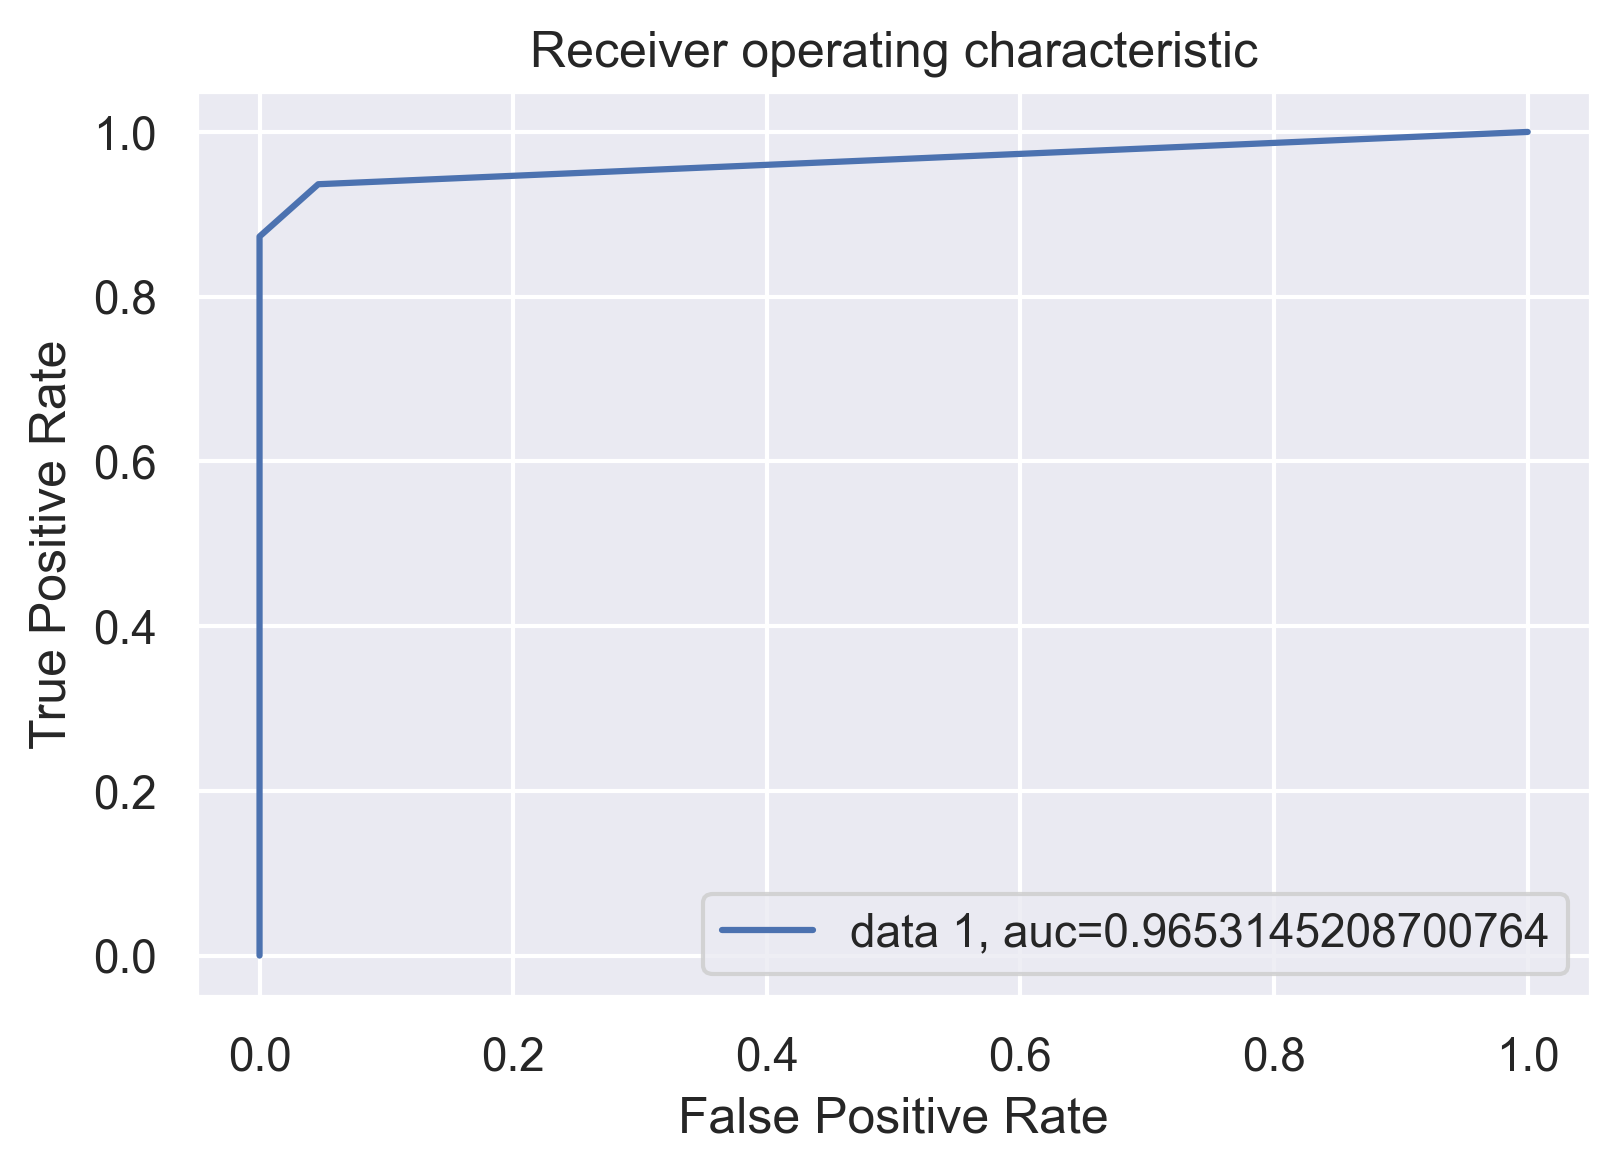

In [98]:
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [99]:
knn_auc = auc

## XGBoost

In [97]:
def xgb_grid_search(X, y):
    # Create a dictionary of all values we want to test
    param_grid = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    xgb = XGBClassifier()
    
    #use gridsearch to test all values
    xgb_gscv =  RandomizedSearchCV(estimator = xgb,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    xgb_gscv.fit(X, y)
    
    return xgb_gscv.best_params_

In [98]:
xgb_grid_search(x_train, y_train)

{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.2,
 'max_depth': 12,
 'min_child_weight': 1}

In [100]:
xgb = XGBClassifier(min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=0.0, colsample_bytree=0.3)
xgb.fit(x_train,y_train)

y_pred_xgb = xgb.predict(x_test)

print(classification_report(y_test, y_pred_xgb))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall:",metrics.recall_score(y_test, y_pred_xgb))

print(xgb.score(x_train,y_train))
print(xgb.score(x_test,y_test))

[18:26:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.90      0.90        63

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

Accuracy: 0.9298245614035088
Precision: 0.9047619047619048
Recall: 0.9047619047619048
1.0
0.9298245614035088


In [101]:
xgb_tacc = xgb.score(x_test,y_test)

In [102]:
xgb_train_acc = xgb.score(x_train, y_train)

### Confusion Matrix of XGBoost Model

<AxesSubplot:>

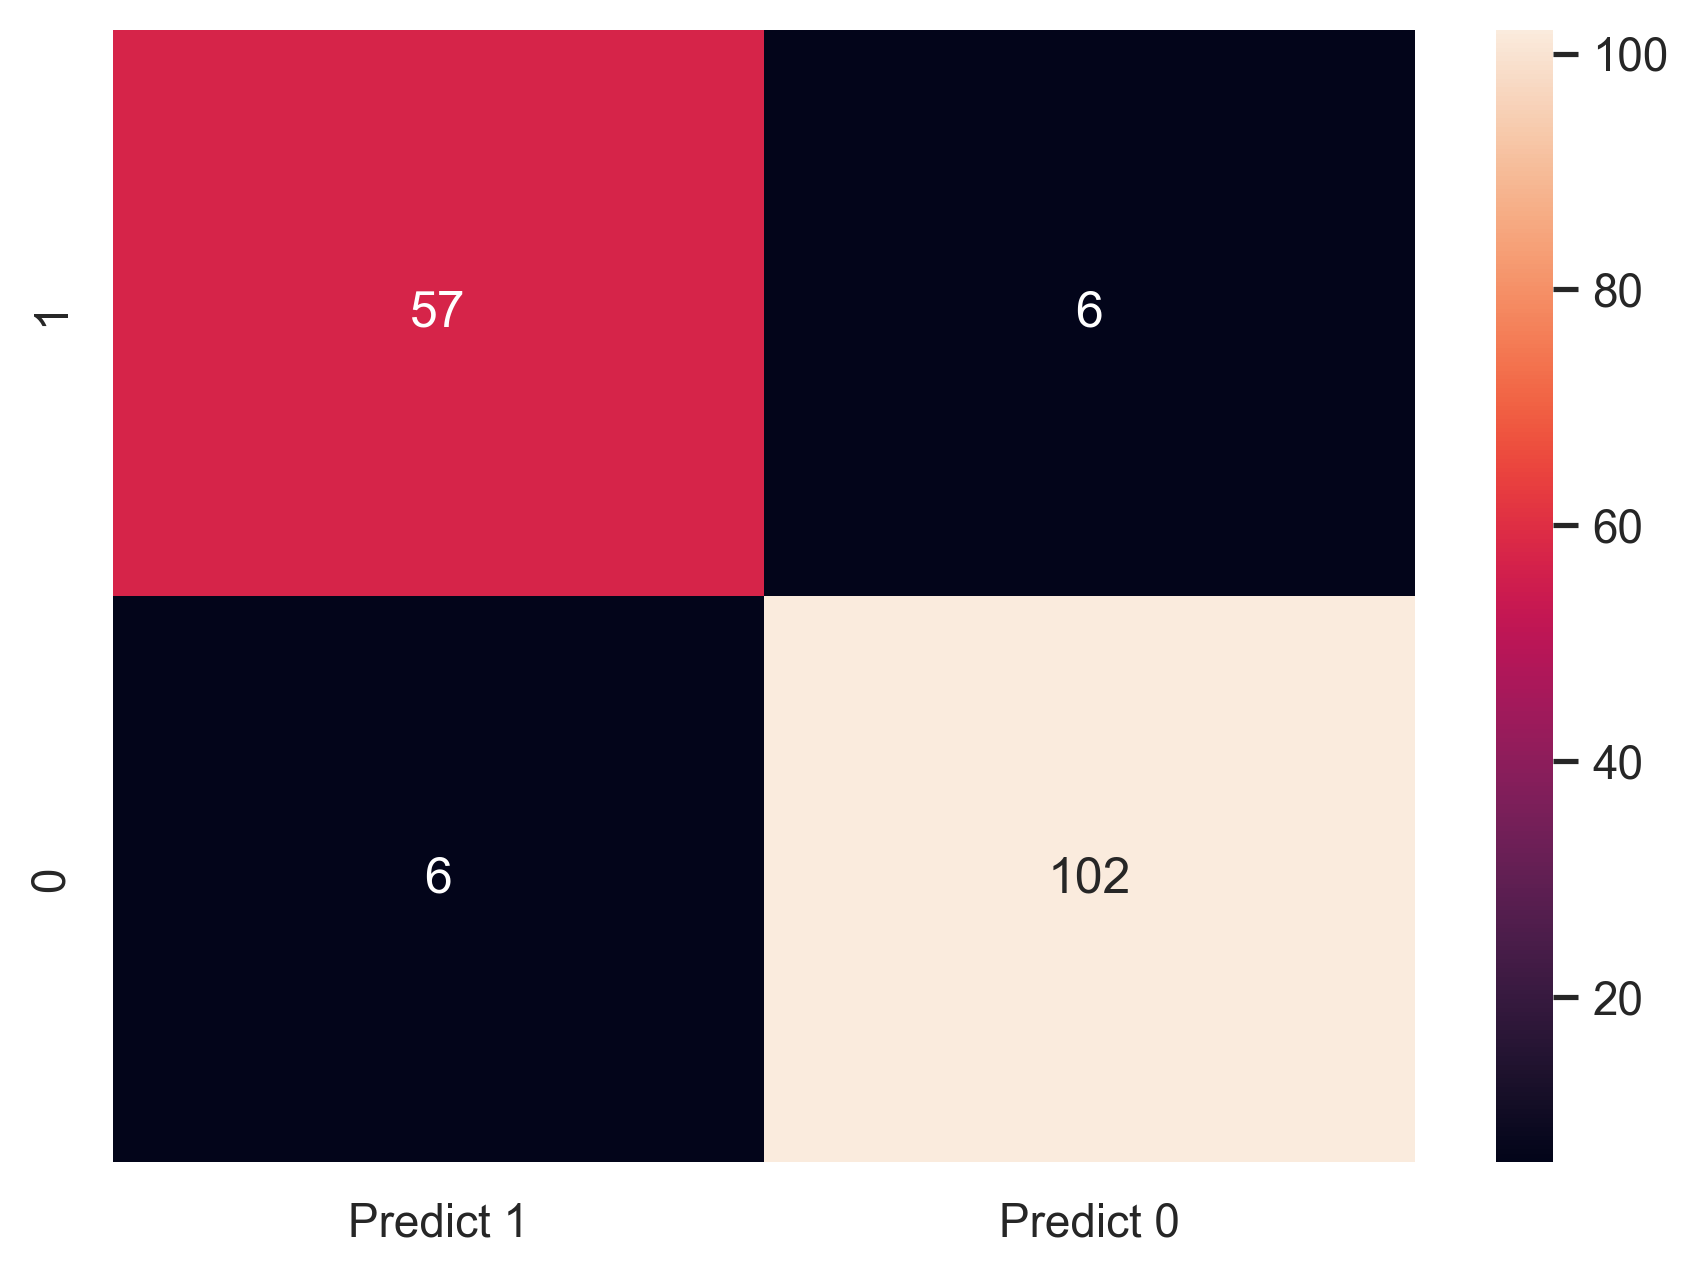

In [103]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of XGBoost Model

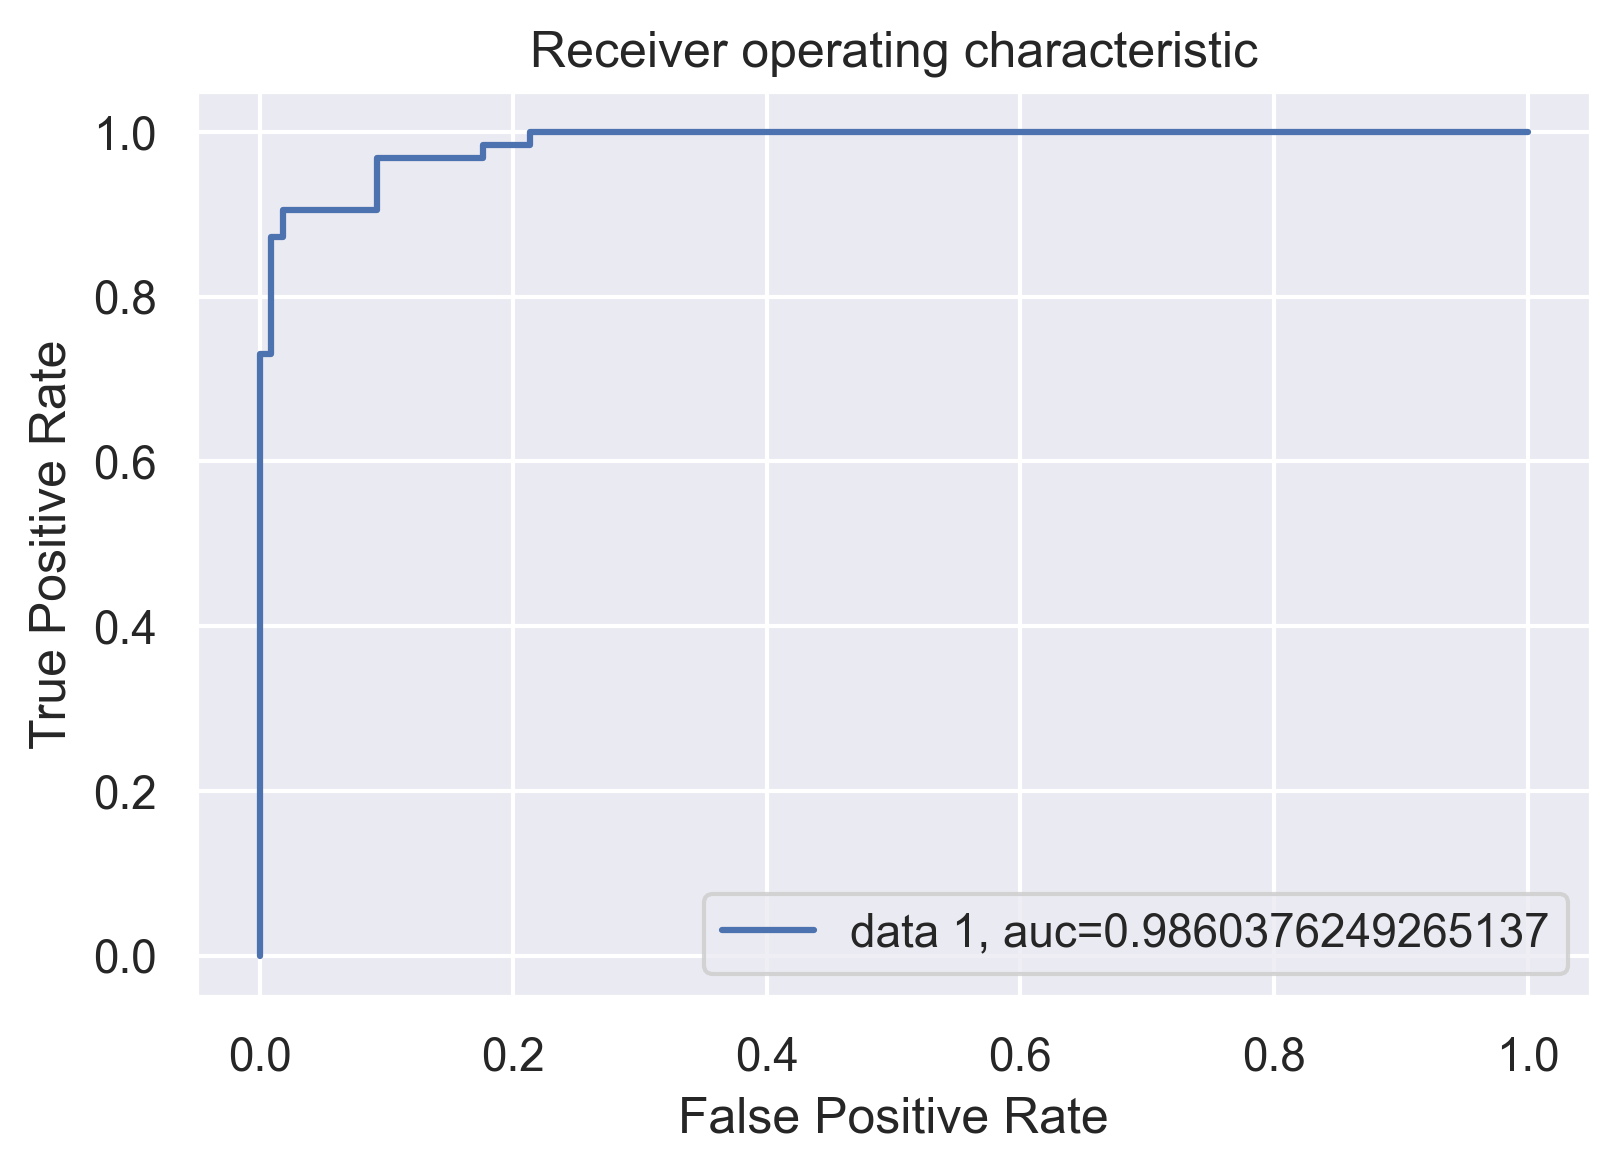

In [104]:
y_pred_proba = xgb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [105]:
xgb_auc = auc

## Support Vector Machine (SVM)

In [104]:
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    svm = SVC()
    
    #use gridsearch to test all values
    svm_gscv = GridSearchCV(estimator = svm,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    svm_gscv.fit(X, y)
    
    return svm_gscv.best_params_

In [105]:
svm_grid_search(x_train, y_train)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [106]:
svm = SVC(gamma=0.01, C=10, kernel='rbf', probability=True)

svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

0.9799196787148594
0.9532163742690059


In [107]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [108]:
svm_tacc = svm.score(x_test, y_test)

In [109]:
svm_train_acc = svm.score(x_train, y_train)

### Confusion Matrix of SVM

<AxesSubplot:>

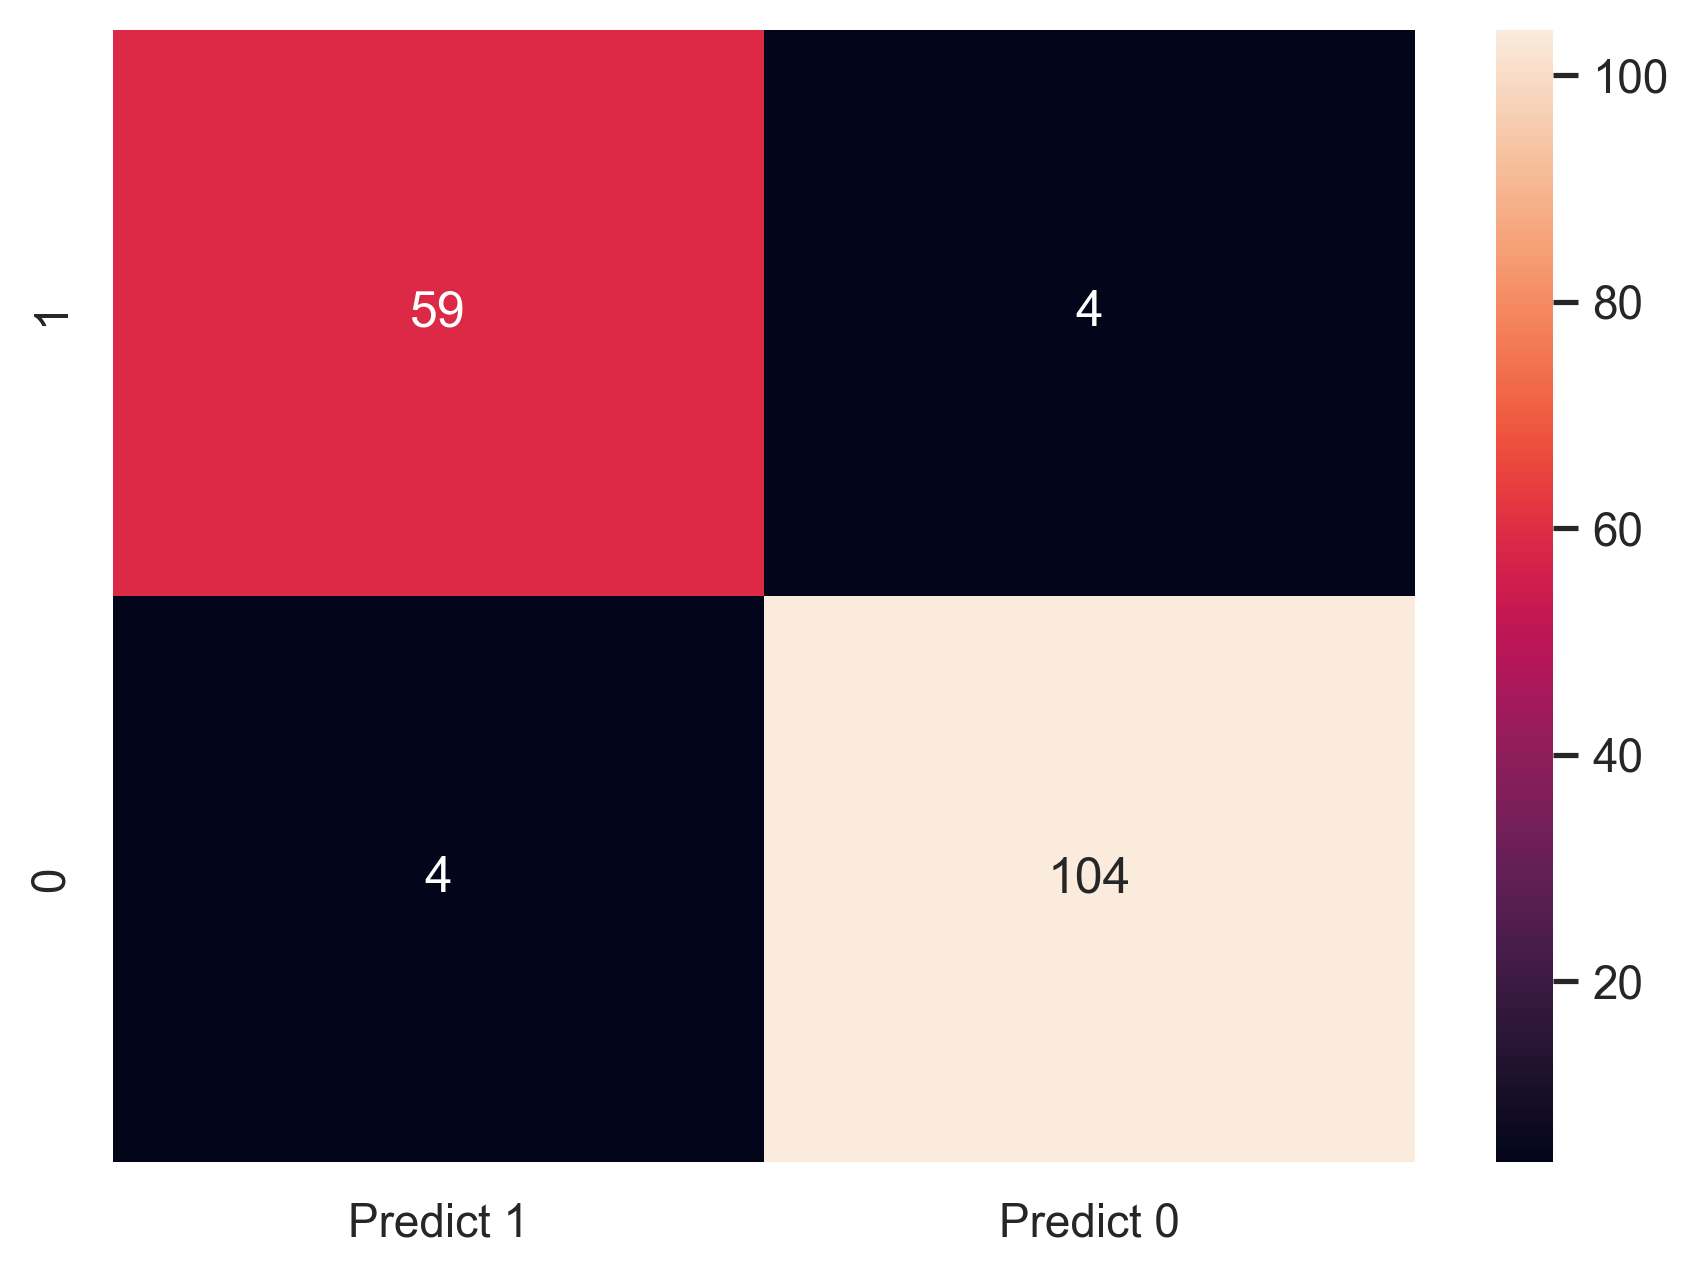

In [110]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of SVM

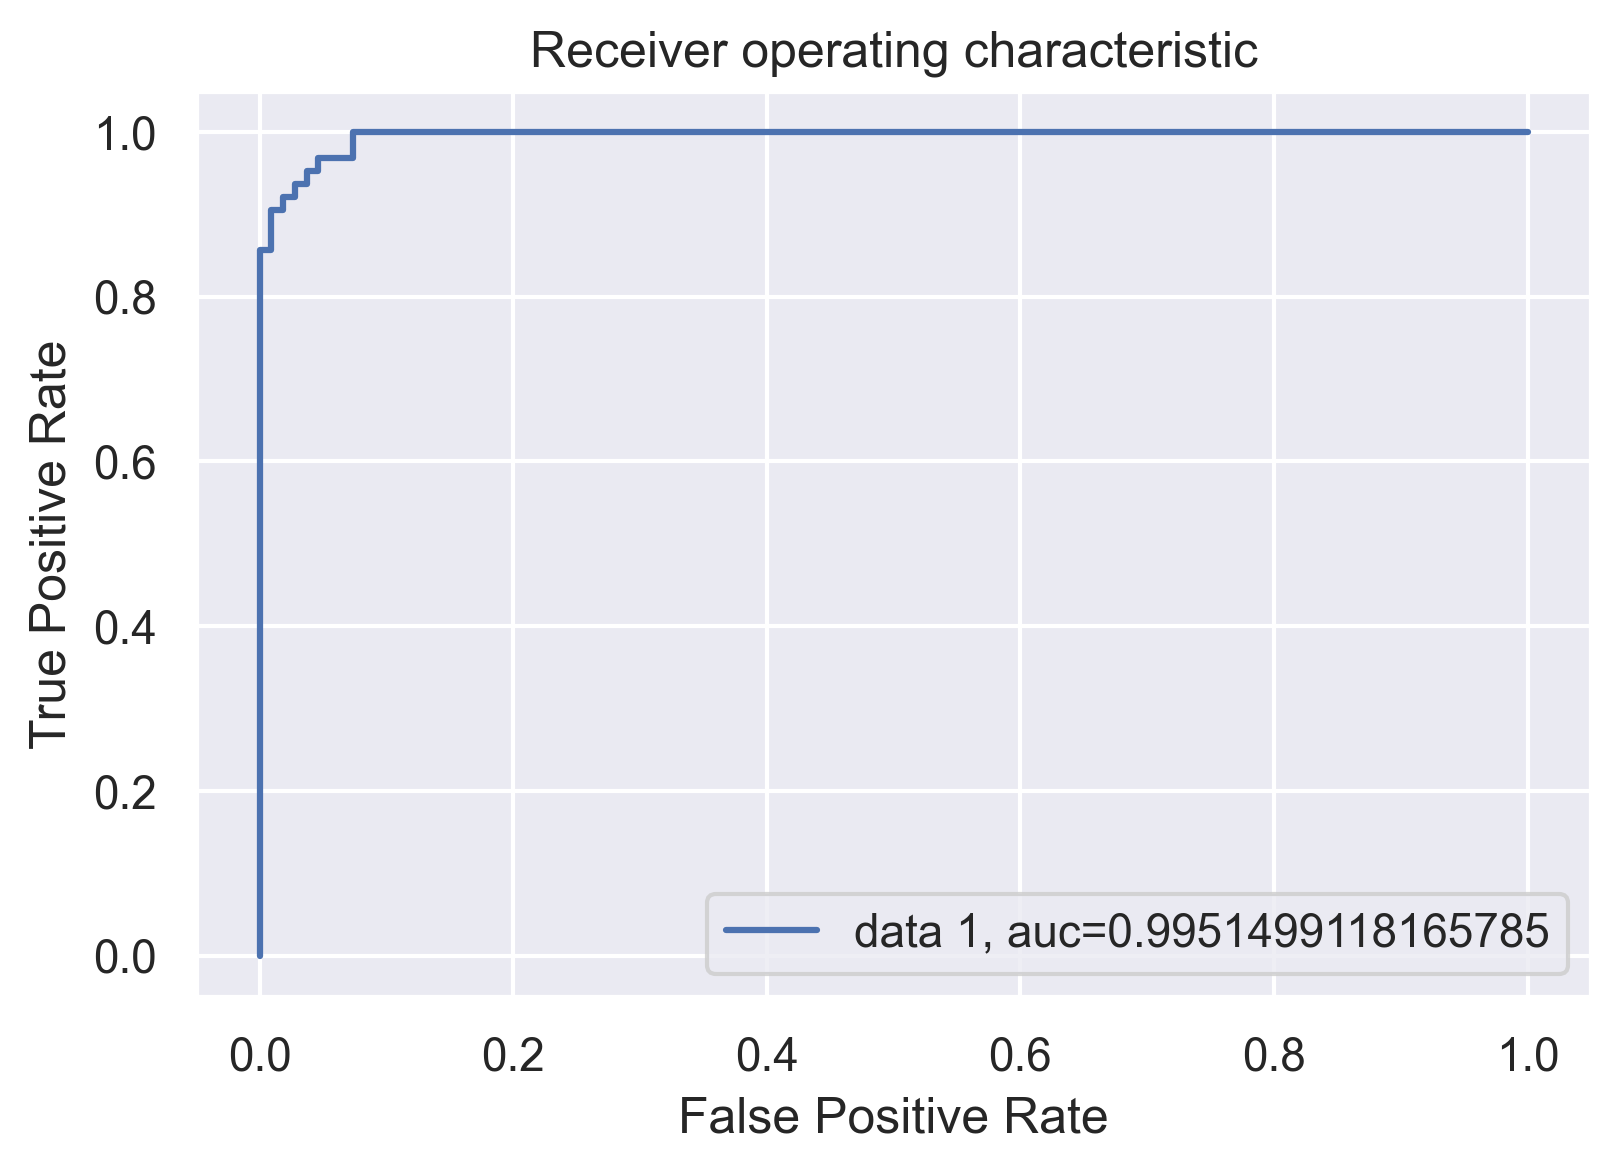

In [111]:
y_pred_proba = svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [112]:
svm_auc = auc

**Observations:**

There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign = 0 (indicates abscence).



**Rates as computed from the confusion matrix**

***Accuracy***: Overall, how often is the classifier correct?

--> (TP+TN)/total = (61+108)/171 = 0.988

***Misclassification Rate***: Overall, how often is it wrong?

-->(FP+FN)/total = (0+2)/171 = 0.012 equivalent to **1 minus Accuracy also known as "Error Rate"**.

***True Positive Rate***: When it's actually yes, how often does it predict 1?

-->TP/actual yes = 61/63 = 0.968 also known as **"Sensitivity" or "Recall"**

***False Positive Rate***: When it's actually 0, how often does it predict 1?

-->FP/actual no = 0/108+0 = 0

***Specificity***: When it's actually 0, how often does it predict 0? also know as **true positive rate**

-->TN/actual no = 108/108+0 = 1.0 equivalent to **1 minus False Positive Rate**

***Precision***: When it predicts 1, how often is it correct?

-->TP/predicted yes = 61/61+0 = 1.0

***Prevalence***: How often does the yes condition actually occur in our sample?

-->actual yes/total = 61+2/171 = 0.368

# Comparision of all Models

In [113]:
def comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list):
    data = {"Model Name": model_list, "Train Accuracy(%)": [i*100 for i in model_train_acc_list], "Test Accuracy(%)": [i*100 for i in model_test_acc_list], "AUC Score": model_auc_list}
    Comparision = pd.DataFrame(data)
    return Comparision

In [114]:
model_list = ["Logistic Regression", "Decision Tree Classifier", "AdaBoost", "Random Forest Classifier", "kNN", "SVM", "XGBoost"]
model_train_acc_list = [lr_train_acc, dt_train_acc, ada_train_acc, rf_train_acc, knn_train_acc, svm_train_acc, xgb_train_acc]
model_test_acc_list = [lr_tacc, dt_tacc, ada_tacc, rf_tacc, knn_tacc, svm_tacc, xgb_tacc]
model_auc_list = [lr_auc, dt_auc, ada_auc, rf_auc, knn_auc, svm_auc, xgb_auc]
comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list)

Model Name  Train Accuracy(%)  Test Accuracy(%)  AUC Score
0       Logistic Regression          97.389558         95.906433   0.993533
1  Decision Tree Classifier          97.188755         92.397661   0.937243
2                  AdaBoost         100.000000         95.906433   0.994415
3  Random Forest Classifier         100.000000         94.736842   0.980967
4                       kNN          99.196787         95.321637   0.965315
5                       SVM          97.991968         95.321637   0.995150
6                   XGBoost         100.000000         92.982456   0.986038

In [115]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
model = SVC(gamma=0.01, C=10, kernel='rbf', probability=True)
scores = cross_val_score(model, features, y, cv=skfold)

print(scores)
print(np.mean(scores))

[0.97368421 0.95614035 0.98245614 0.96491228 0.95575221]
0.9665890389691041


In [116]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
model = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
scores = cross_val_score(model, features, y, cv=skfold)

print(scores)
print(np.mean(scores))

[0.97368421 0.97368421 0.97368421 0.96491228 0.94690265]
0.9665735134295916


# Multilayer Neural Network

In [66]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras.layers import Dense, Activation, LeakyReLU, Dropout
from keras.activations import relu, sigmoid

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve

## Hyperparameter Tuning

### Method 1 - Random Search
**Hyperparameters**

- How many number of hidden layers we should have?
- How many number of neurons we should have in hidden layers?
- Learning Rate

In [67]:
x_train.shape

(498, 14)

In [99]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_inp', min_value=32, max_value=512, step=32),
                               activation=hp.Choice( 'activation', ['tanh', 'relu', 'LeakyReLU', 'elu']),
                               input_dim = 14
                          )
              )
    
    for i in range(hp.Int('num_layers', 2, 20)):                 # Number of layers
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,       # Number of neuron, here it is 32-512
                                            step=32),
                               activation=hp.Choice( 'activation', ['tanh', 'relu', 'LeakyReLU', 'elu'])))
                               
        if hp.Boolean("dropout"):
            model.add(layers.Dropout(rate=0.25))
        
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model

In [100]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='BCancer Detection')

In [101]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
units_inp (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'tanh', 'conditions': [], 'values': ['tanh', 'relu', 'LeakyReLU', 'elu'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dropout (Boolean)
{'default': False, 'conditions': []}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [102]:
tuner.search(x_train, y_train, epochs=5, validation_split=0.2)

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.899999996026357

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 34s
INFO:tensorflow:Oracle triggered exit


In [103]:
tuner.results_summary()

Results summary
Results in project\BCancer Detection
Showing 10 best trials
Trial summary
Hyperparameters:
units_inp: 160
activation: relu
num_layers: 6
units_0: 128
dropout: False
units_1: 224
learning_rate: 0.001
units_2: 384
units_3: 128
units_4: 448
units_5: 512
units_6: 320
units_7: 128
units_8: 288
units_9: 224
units_10: 256
units_11: 448
units_12: 128
units_13: 480
units_14: 288
units_15: 320
units_16: 512
units_17: 480
units_18: 416
Score: 1.0
Trial summary
Hyperparameters:
units_inp: 32
activation: tanh
num_layers: 12
units_0: 224
dropout: True
units_1: 448
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
Score: 0.996666669845581
Trial summary
Hyperparameters:
units_inp: 512
activation: LeakyReLU
num_layers: 18
units_0: 256
dropout: True
units_1: 512
learning_rate: 0.001
units_2: 224
units_3: 224
units_4: 288
units_5: 448
units_6: 96
units_7: 192
units_8: 288
units_9: 288
units_10: 416

In [104]:
best_model = tuner.get_best_models(num_models=1)[0]

In [105]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               2400      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               20608     
_________________________________________________________________
dense_2 (Dense)              (None, 224)               28896     
_________________________________________________________________
dense_3 (Dense)              (None, 384)               86400     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               49280     
_________________________________________________________________
dense_5 (Dense)              (None, 448)               57792     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2

In [106]:
best_model.fit(x_train,y_train,epochs=40)

Epoch 1/40
16/16 [==============================] - 1s 5ms/step - loss: 0.0437 - accuracy: 0.9880
Epoch 2/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.9920
Epoch 3/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0169 - accuracy: 0.9980
Epoch 4/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0664 - accuracy: 0.9839
Epoch 6/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.9880
Epoch 7/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0220 - accuracy: 0.9920
Epoch 8/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 0.9940
Epoch 9/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 0.9960
Epoch 10/40
16/16 [==============================] - 0s 5ms/step - loss: 0.0215 - accuracy: 0.9960
Epoch 11/40
16/16 [

In [107]:
# Train and Test accuracy
scores = best_model.evaluate(x_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = best_model.evaluate(x_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

16/16 [==============================] - 0s 3ms/step - loss: 2.6600e-07 - accuracy: 1.0000
Training Accuracy: 100.00%

6/6 [==============================] - 0s 2ms/step - loss: 0.9929 - accuracy: 0.9474
Testing Accuracy: 94.74%



Text(0, 0.5, 'True Positive Rate')

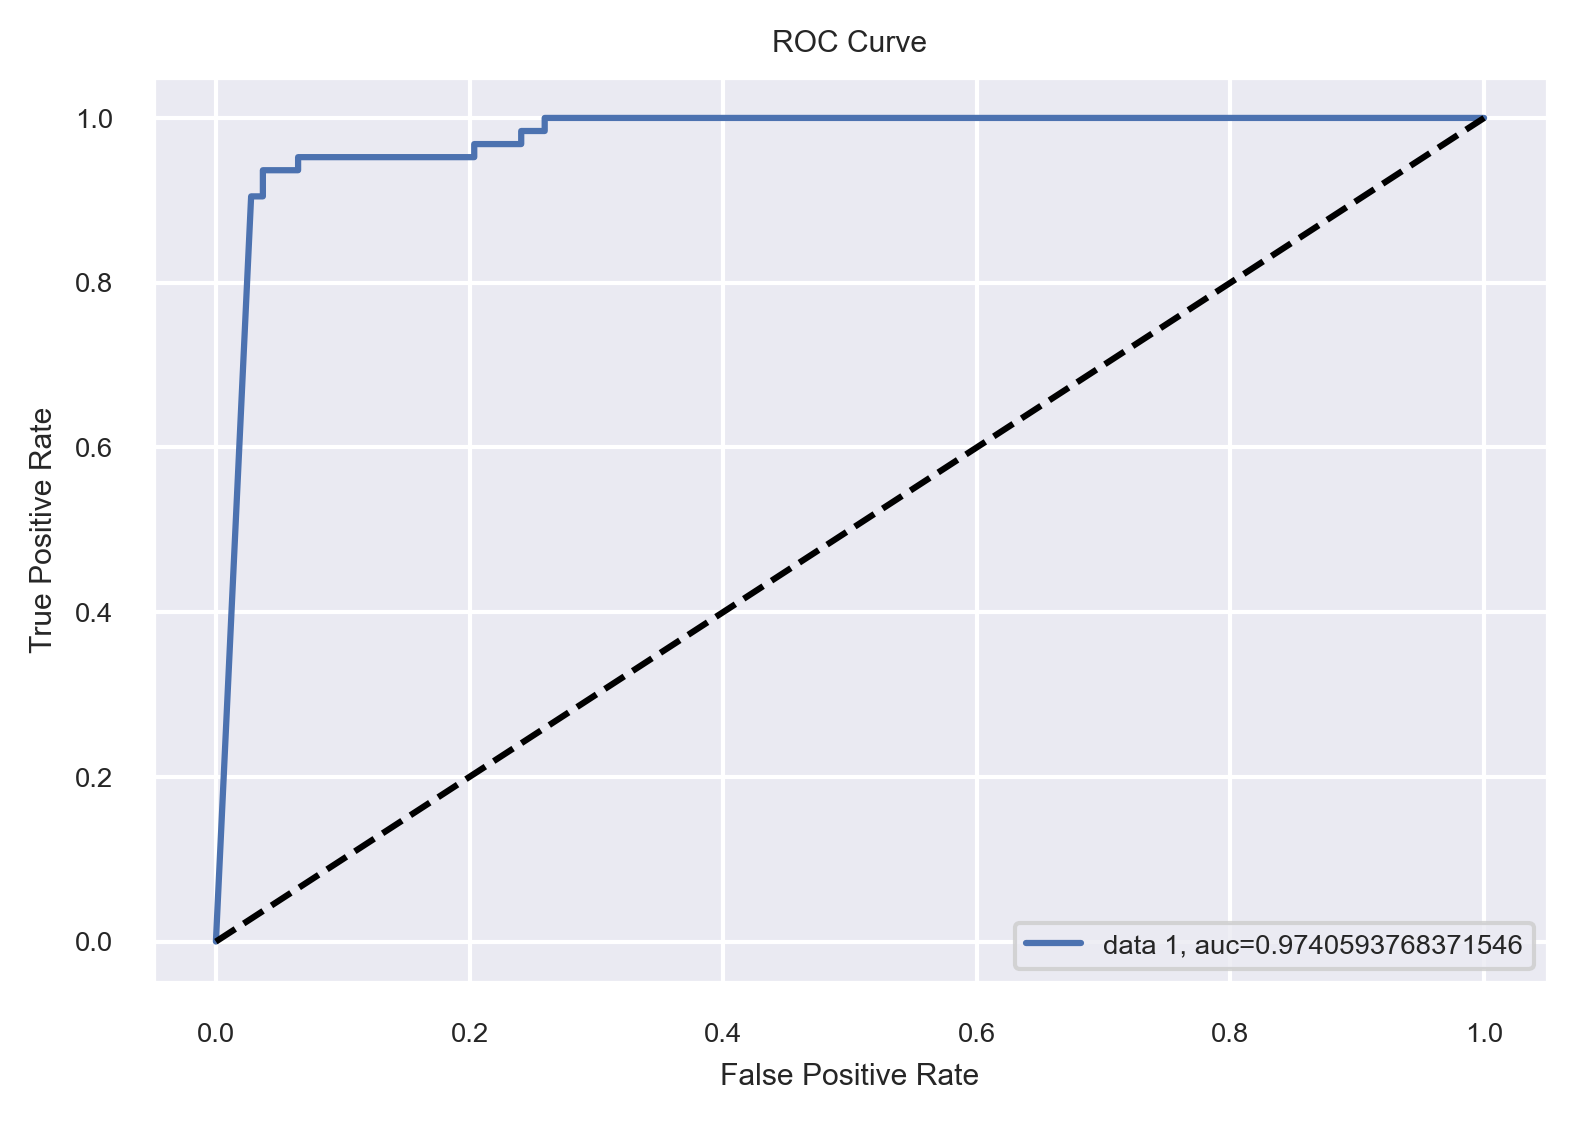

In [108]:
y_test_pred_probs = best_model.predict(x_test)
FPR, TPR, _ = roc_curve(y_test,y_test_pred_probs)

auc = metrics.roc_auc_score(y_test, y_test_pred_probs)
auc

plt.plot(FPR,TPR,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'--',color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Method 2 - GridSearchCV

In [142]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim=x_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

In [144]:
layers = [[20], [40, 20], [45, 30, 15], [384, 64, 160, 480, 32]]
activations = ['LeakyReLU', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[20, 30, 50, 100])

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(x_train, y_train)

print(grid_result.best_params_)

{'activation': 'LeakyReLU', 'batch_size': 256, 'epochs': 100, 'layers': [384, 64, 160, 480, 32]}


In [153]:
model = Sequential()

# add first hidden layer
model.add(Dense(416, input_dim=x_train.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(384,activation='LeakyReLU'))
model.add(Dense(64,activation='LeakyReLU'))
model.add(Dense(160,activation='LeakyReLU'))
model.add(Dense(480,activation='LeakyReLU'))
model.add(Dense(32,activation='LeakyReLU'))

# Output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1668 (Dense)           (None, 416)               6240      
_________________________________________________________________
dense_1669 (Dense)           (None, 384)               160128    
_________________________________________________________________
dense_1670 (Dense)           (None, 64)                24640     
_________________________________________________________________
dense_1671 (Dense)           (None, 160)               10400     
_________________________________________________________________
dense_1672 (Dense)           (None, 480)               77280     
_________________________________________________________________
dense_1673 (Dense)           (None, 32)                15392     
_________________________________________________________________
dense_1674 (Dense)           (None, 1)              

In [154]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [155]:
model.fit(x_train, y_train, epochs=100, batch_size=256)

Epoch 1/100
2/2 [==============================] - 0s 20ms/step - loss: 0.6703 - accuracy: 0.6847
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 0.4638 - accuracy: 0.9257
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2412 - accuracy: 0.9438
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 0.1410 - accuracy: 0.9598
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1177 - accuracy: 0.9659
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 0.1092 - accuracy: 0.9679
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0878 - accuracy: 0.9759
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0772 - accuracy: 0.9819
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0609 - accuracy: 0.9819
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0613 - accuracy: 0.9759
Epoch 11/100
2/2 [=====

In [156]:
# Train and Test accuracy
scores = model.evaluate(x_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 3.5813e-05 - accuracy: 1.0000
Training Accuracy: 100.00%

6/6 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.9240
Testing Accuracy: 92.40%



Text(0, 0.5, 'True Positive Rate')

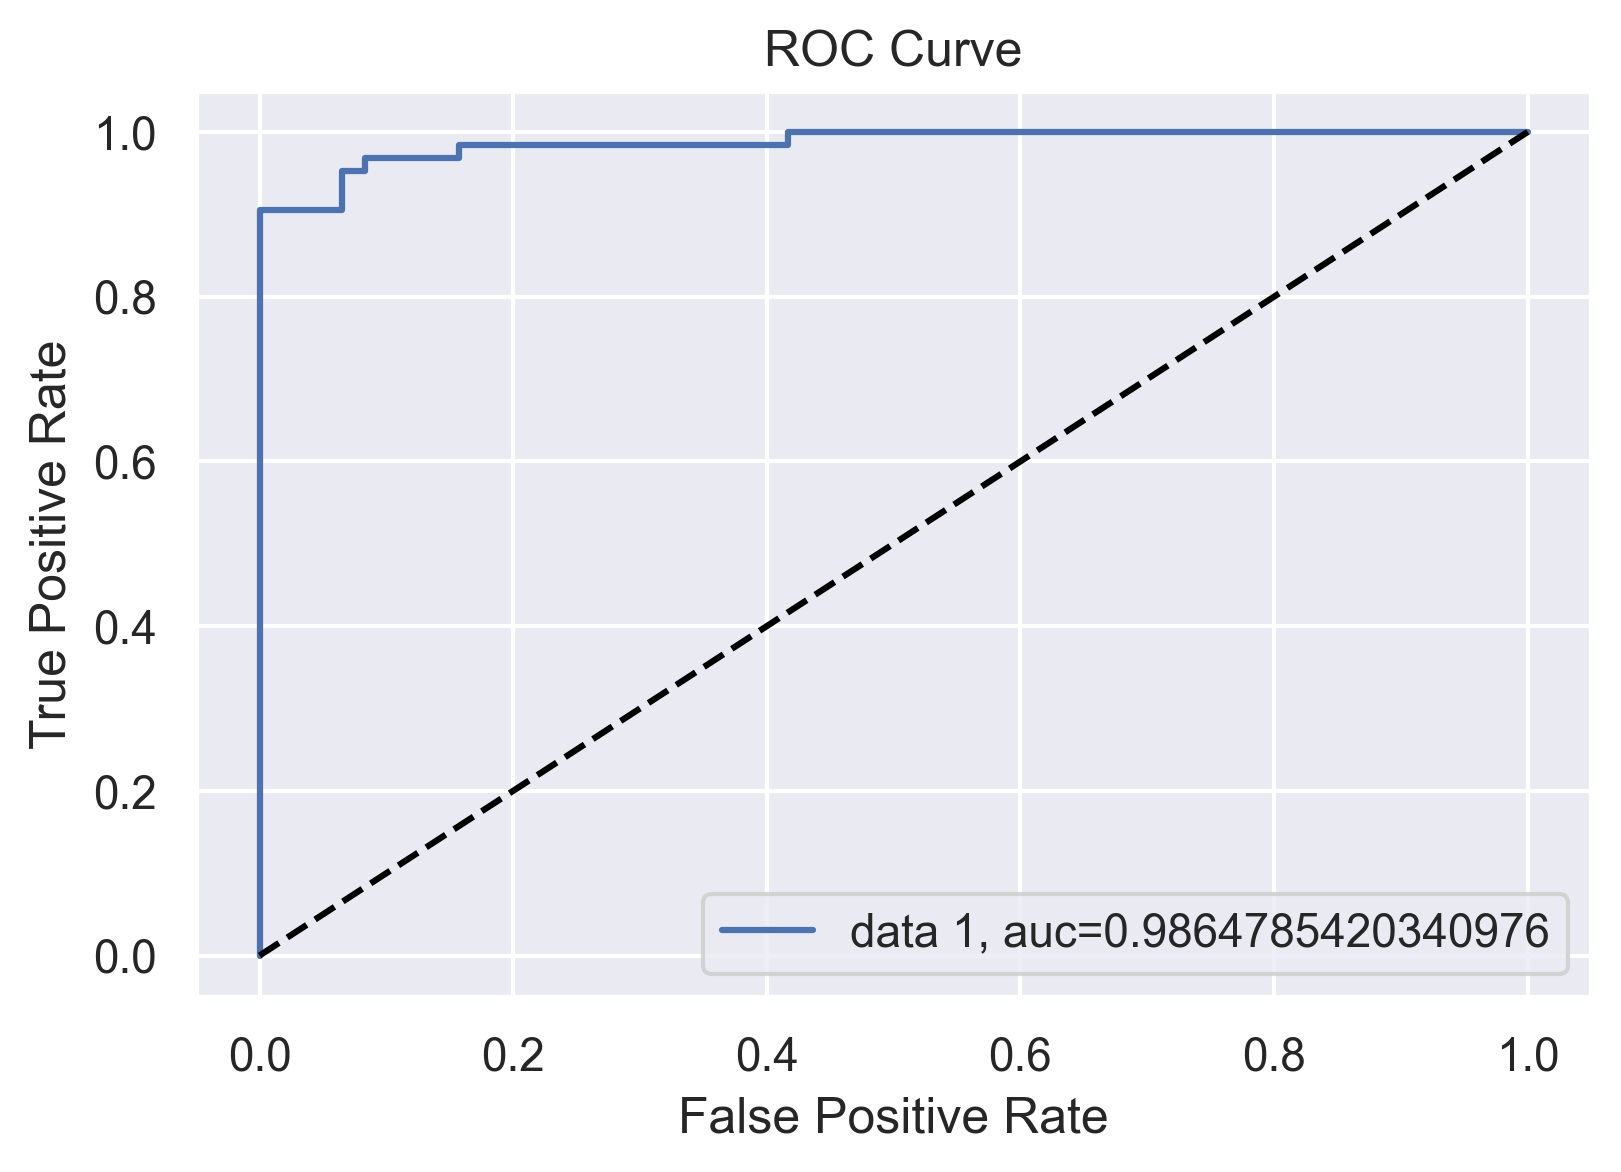

In [158]:
from sklearn.metrics import roc_curve
y_test_pred_probs = model.predict(x_test)
FPR, TPR, _ = roc_curve(y_test,y_test_pred_probs)

auc = metrics.roc_auc_score(y_test, y_test_pred_probs)
auc

plt.plot(FPR,TPR,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'--',color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Prediction System

- Malignant:
  - 17.99, 10.38, 0.1184, 0.2776, 0.2419, 1.095, 0.04904, 0.01587, 25.38, 17.33, 0.1622, 0.6656, 0.4601, 0.1189

## SVM Model

In [159]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Breast Cancer Detected (Malignant)" if svm.predict(in_data_sca) else "No Breast Cancer Detected (Benign)")

17.99, 10.38, 0.1184, 0.2776, 0.2419, 1.095, 0.04904, 0.01587, 25.38, 17.33, 0.1622, 0.6656, 0.4601, 0.1189
Breast Cancer Detected (Malignant)


## Logistic Regression

In [160]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Breast Cancer Detected (Malignant)" if lr.predict(in_data_sca) else "No Breast Cancer Detected (Benign)")

17.99, 10.38, 0.1184, 0.2776, 0.2419, 1.095, 0.04904, 0.01587, 25.38, 17.33, 0.1622, 0.6656, 0.4601, 0.1189
Breast Cancer Detected (Malignant)
